# Projet Velib - Analyse de données - Notebook R

JULIA Manon, MARAIS Mathilde, PIOT Damien 


Ce projet en Analyse de données à pour objectif d'étudier un jeu de données sur les chargements des stations de Velib dans la ville de Paris sur une période d'une semaine entre le 2 et le 7 septembre. 

Un premier jeu de données contient les taux de chargements des stations de distribution des vélos. 
* Un taux de chargement à 0 indique que la station est vide et qu'aucun vélo n'est disponible. 
* Un taux de chargement à 1 indique que la station est pleine et que tous les vélos qu'elle peut contenir sont disponibles. 

Un second jeu de données contient les coordonnées (logitude et latitude) associées à chaque station, ainsi qu'un élément Bonus.
* Un bonus à 1 signifie que la station est au sommet d'une colline ou se trouve sur un relief particulier. 
* Un bonus à 0 signifie que la station se situe au niveau du référentiel sur le plan de l'altitude. 

Du point de vue de l'analyse de données, les individus étudiés sont les stations. Il y a 168 variables qui correspondent aux 168 heures d'une semaine. 




# I- Etude descriptive du jeu de données

## Ouverture et étude des jeux de données

Nous allons importer les packages dont nous allons nous servir dans ce Notebook. Ils sont tous regroupés dans la cellule ci-contre.

In [1]:
#rm(list = ls())   # erase everything, start from scratch!


In [2]:
library(ggplot2)
library(reshape2)
library(gridExtra)
library(readr)
library(viridis)

Le chargement a nécessité le package : viridisLite



Nous allons maintenant charger notre jeu de données.

In [3]:
# direct loading from stored data on PLMlab
load('data/velib.RData')
summary(velib)

# alternative: load the data from package funFEM, where you have more information (help page)
# library(funFEM)
# data(velib)
# help("velib")

         Length Class      Mode     
data      181   data.frame list     
position    2   data.frame list     
dates     181   -none-     character
bonus    1189   -none-     numeric  
names    1189   -none-     character

### Visualisation

Dans un premier temps, nous allons ouvrir et visualiser les premières lignes de nos deux dataset. L'objectif est d'avoir un apperçu de nos jeux de données, avec leurs tailles, variables et individus étudiés.

In [4]:
# data preparation
loading = as.matrix(velib$data)
colnames(loading) = 1:ncol(loading)
rownames(loading) = velib$names

stations = 1:nrow(loading)
coord = velib$position[stations,]
coord$bonus = velib$bonus[stations]
coord$names = velib$names[stations]

# select exactly 7 days of data (we remove the first 13 dates)
dates = 14:181
loading = loading[stations, dates]
colnames(loading) = 1:length(dates)

head(loading)
head(coord)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


,longitude,latitude,bonus,names
,<dbl>,<dbl>,<dbl>,<chr>
19117,2.377389,48.88630,0,EURYALE DEHAYNIN
17111,2.317591,48.89002,0,LEMERCIER
6103,2.330447,48.85030,0,MEZIERES RENNES
15042,2.271396,48.83373,0,FARMAN
12003,2.366897,48.84589,0,QUAI DE LA RAPEE
13038,2.363335,48.82191,0,CHOISY POINT D'IVRY


In [5]:
dimensions <- dim(coord)
print(dimensions)


[1] 1189    4


La table coord contient 1189 lignes et 4 colonnes.

### Vérification que le dataframe ne contient pas de valeur manquantes

Il est maintenant intéressant de se demander si nos jeux de données sont complets, c'est à dire si les colonnes ne contiennent pas d'éléments vides, nuls ou à NaN.

In [6]:
# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'loading'
loading_missing_value <- sort(colSums(is.na(loading)), decreasing = TRUE)

cat('--- Loading ---\n')

print(sum(loading_missing_value))

cat('\n')

# Calcul du nombre de valeurs manquantes dans chaque colonne pour le dataframe 'coord'
coord_missing_value <- sort(colSums(is.na(coord)), decreasing = TRUE)

cat('--- Coord ---\n')

print(coord_missing_value)


--- Loading ---
[1] 0

--- Coord ---
longitude  latitude     bonus     names 
        0         0         0         0 


Interprétation : 

On a réalisé un affichage par ordre décroissant, cela nous permet d'affirmer qu'il n'y a pas de valeurs manquantes dans les jeux de données.

### Etude des valeurs dupliquées dans le dataframe

On va étudier si nos jeux de données contiennent des lignes dupliquées, c'est à dire des lignes ou les valeurs dans chaque colonne sont les mêmes, pour toutes les colonnes observées, et de manière simultanée.

In [7]:
cat('--- Loading ---\n')
cat(sum(duplicated(loading)), '\n\n')
cat('--- Coord ---\n')
cat(sum(duplicated(coord)), '\n')

--- Loading ---
0 

--- Coord ---
0 


Interprétation : 

Sur le même principe que dans la cellule précédente, il n'y a pas de valeurs dupliquées dans nos jeux de données.

### Etude des doublons dans le dataframe 

Nous avons observé ci-dessus qu'il n'y a pas de lignes dupliquées dans nos jeux de données. Cependant, il faudrait étudier si le jeu de données présentant les coordonnées des stations nous donne plusieurs informations différentes pour une même station. 

In [8]:
# Calcul des fréquences des noms des stations
station_names_counts=table(coord$names)

# Filtrage pour ne garder que les noms avec une fréquence de 2 ou plus
duplicates=station_names_counts[station_names_counts > 1]

# Création d'un dataframe avec les noms et leurs fréquences
duplicates_df= data.frame(names = names(duplicates), count = as.numeric(duplicates))

# Affichage du tableau des noms en doublons par ordre décroissant de fréquence
print(duplicates_df[order(duplicates_df$count, decreasing = TRUE), ])


                    names count
12      GARE D'AUSTERLITZ     3
21        PORTE DES LILAS     3
1         ALEXANDRE DUMAS     2
2                 AQUEDUC     2
3                BASTILLE     2
4              BELLEVILLE     2
5       BOURSE DU TRAVAIL     2
6                BROCHANT     2
7            CHERCHE MIDI     2
8                  CLICHY     2
9                    DODU     2
10  FAURE (AUBERVILLIERS)     2
11     FRANCE (LEVALLOIS)     2
13          GARE DE L'EST     2
14               JOURDAIN     2
15               LACEPEDE     2
16               LEGENDRE     2
17     PARC DE BELLEVILLE     2
18             PORT ROYAL     2
19      PORTE DE BAGNOLET     2
20    PORTE DE SAINT OUEN     2
22         RICHARD LENOIR     2
23         SAINT AUGUSTIN     2
24           SAINT HONORE     2
25           SAINT MARCEL     2
26     WILSON (LEVALLOIS)     2


Interprétation : 

Cette commande indique le nombre d'occurences des stations. Ainsi, nous pouvons voir que la station PORTE DES LILAS et la station GARE D'AUSTERLITZ apparaissent 3 fois dans notre jeu de données par exemple. On en déduit que notre dataset contient 26 éléments qui aparaissent deux fois ou plus. 

In [9]:
# Visualisation des doublons pour le premier élément de la liste des doublons
station_names <- table(coord$names)
name <- names(sort(station_names, decreasing = TRUE))[1]
doublons_premier_element <- coord[coord$names == name, ]
print (doublons_premier_element)

      longitude latitude bonus              names
13014  2.364045 48.84252     0  GARE D'AUSTERLITZ
13104  2.365586 48.84379     0  GARE D'AUSTERLITZ
13151  2.366124 48.84058     0  GARE D'AUSTERLITZ


Interprétation : 

Cette commande permet de visualiser un élément de la liste affichée dans la cellule précédente. Ainsi, pour la station PORTE DES LILAS, nous confirmons qu'elle apparaît bien 3 fois dans notre jeu de données. La première colonne indique les numéros de lignes auxquelles les occurences de la station apparaissent.  L'élément bonus indique que la station se situe en hauteur d'une colline lorsque bonus prend la valeur 1. Ces occurences diffèrent au niveau des coordonnées géographiques de la station. Il pourrait y avoir des erreurs de saisie ou de transcription des coordonnées géographiques. Si plusieurs bornes de stationnement sont présentes dans une zone proche et sont enregistrées sous le même nom de station dans la base de données, cela pourrait expliquer les différentes coordonnées. Les coordonnées pourraient avoir été collectées à l'aide de différents instruments ou méthodes, ce qui peut entraîner des variations dans les données enregistrées

## Visualisation des données de chargement

### Comparaison des stations

Nous souhaitons observer l'évolution du taux de chargement d'un pannel de stations au cours de la semaine. Cela va nous permettre, dans un premier temps, de faire des hypothèses sur les tendances d'utilisations des vélos en fonction des jours de la semaine, ou des moments de la journée. Dans un second temps, nous allons pouvoir comparer les différences entre les stations de notre pannel. L'idée est de voir si les taux de chargements sont similaires d'une station à l'autre, ou si on observe des variations radicales en fonction des stations de vélib. 

Pour cela, nous allons représenter les courbes des évolutions des taux de chargement pour un pannel de 16 stations choisies au hasard dans la liste de notre jeu de données. Nous allons, pour chaque graphique, représenter des lignes verticales correspondant aux séparations des jours de la semaine. Et en représentant nos 16 graphiques simultanément, nous allons pouvoir réaliser l'étude présentée ci-dessus.

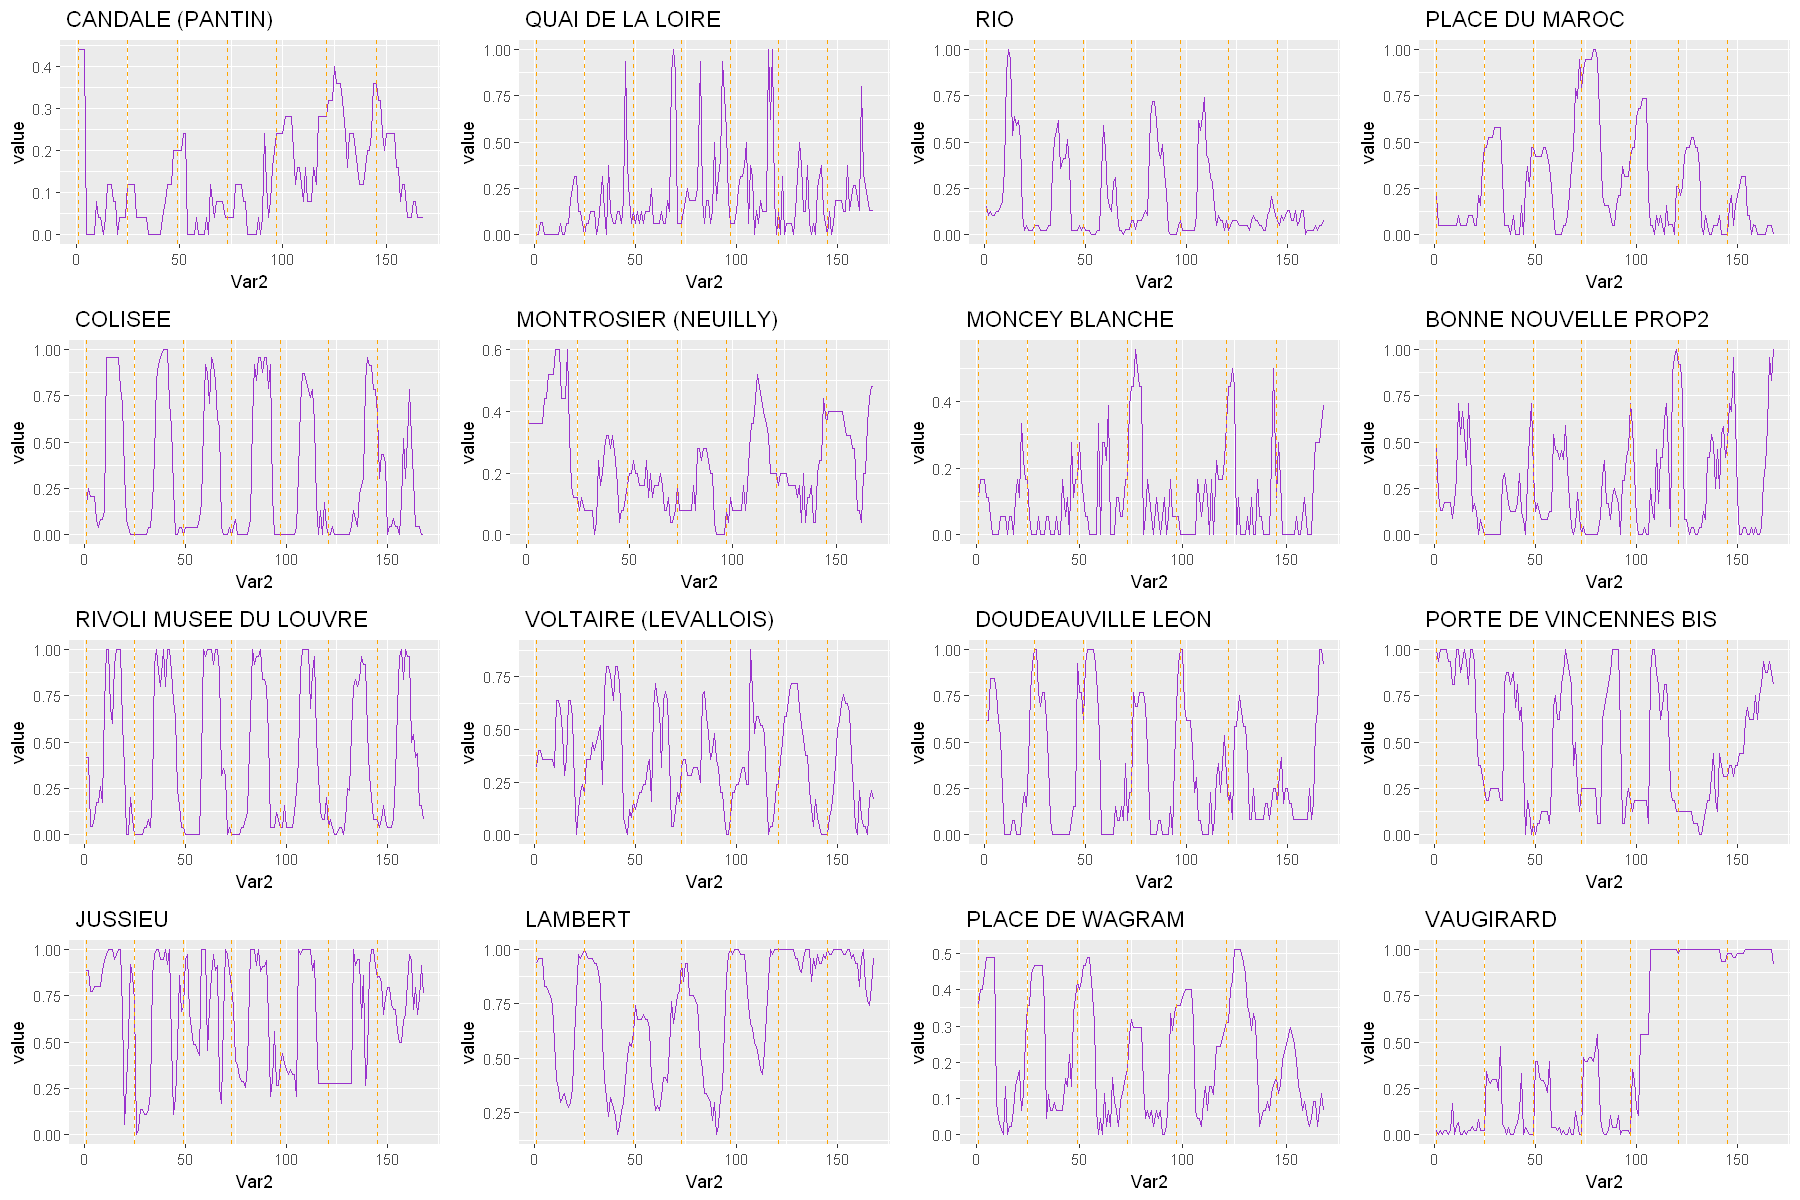

In [10]:

options(repr.plot.width = 15, repr.plot.height = 10)

timeTick = 1 + 24*(0:6)  # vector corresponding to the beginning of days

# select 16 stations
stations = sample.int(nrow(loading), 16)

df = melt(loading[stations,])  #the function melt reshapes it from wide to long

p = list()
for (i in 1:16){
    dfi = df[df$Var1 == velib$names[stations[i]],]
    p[[i]] = ggplot(dfi, aes(x=Var2, y=value)) + 
        geom_line(col="darkorchid") + 
        geom_vline(xintercept=timeTick, col="orange", linetype="dashed") +
        labs(title=velib$names[stations[i]])
}
do.call(grid.arrange,p)

Interprétation : 

On observe une série de graphiques qui représentent le niveau de chargement des stations de Vélib à Paris sur une période de temps d'une semaine, avec des intervalles de temps horaires sur l'axe des abscisses (Time) et le niveau de chargement sur l'axe des ordonnées (Loading).

* Variations temporelles : Chaque graphique montre les variations dans la semaine du nombre de vélos disponibles dans chaque station, parmis 16 prises au hasard. Les pics à 1 indiquent que tous les vélos sont disponibles à ce moment-là. On observe les périodes de la journée où les vélos sont les plus utilisés (les creux dans les graphiques), cela poueeait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. On remarque une temporalité dans certaines stations, avec des taux de chargements similaires sur les 5 premiers jours de la semaine, et des différences au niveau des chargements les week-ends. Les pics correspondes aux périodes où les vélos sont les moins disponibles, c'est à dire les moments où les taux de chargements des stations Vélib sont les plus grands.

* Comparaison entre les stations : En comparant les graphiques entre eux, on peut identifier les stations qui ont un taux de rotation élevé des vélos (grand nombre de variations entre des valeurs élevées et basses) et celles qui sont moins utilisées (moins de variation ou des niveaux plus constants).

### Etude du chargement médian des stations

Avec les courbes précédentes, nous avons pu constater des variations importantes entre les stations. Malgré cela, on retrouve une similarité commune sur la temporalité et les similarités observées sur certains jours. Nous allons étudier le chargement médian des stations pour étudier cette temporalité. Le plus pertinent est ici d'afficher une superposition de boxplots, afin d'étudier la valeur médiane, ainsi que les valeurs des quantiles, en fonction des heures tout au long de la semaine. 

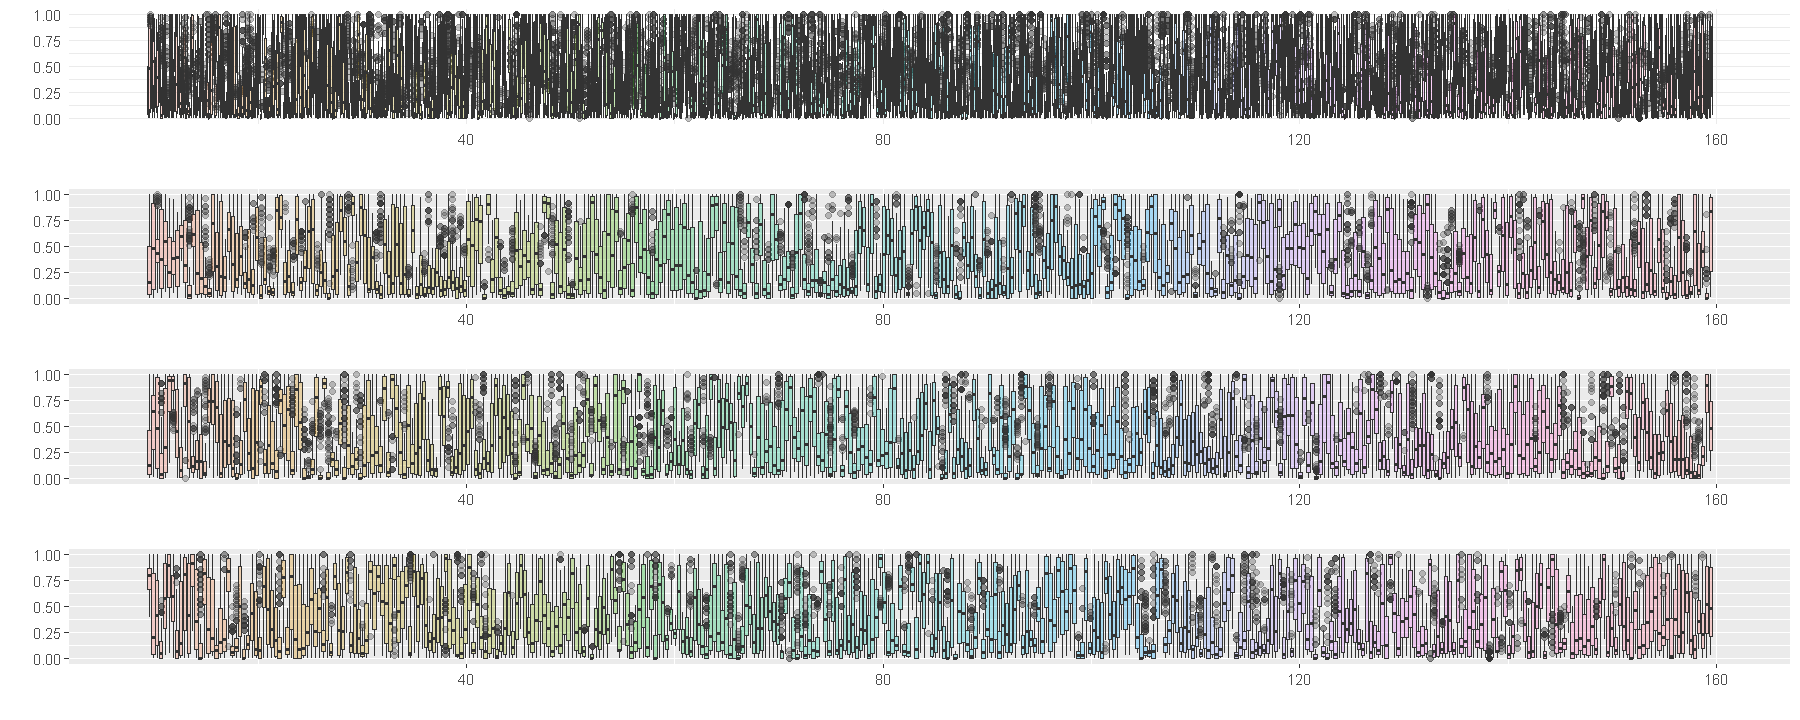

In [11]:

options(repr.plot.width = 15, repr.plot.height = 6)

df = melt(loading)
p1 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('') + theme_minimal()

# --- #

# Only a third of the data
df = melt(loading[ seq(from=1, to=+floor(nrow(loading)/3)) ,])
p2 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The next third
df = melt(loading[ seq(from=1+floor(nrow(loading)/3), to=2*floor(nrow(loading)/3)) ,])
p3 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# The remaining third
df = melt(loading[ seq(from=1+2*floor(nrow(loading)/3), to=nrow(loading)) ,])
p4 = ggplot(df, aes(x=Var2, y=value, fill=Var1)) + 
    geom_boxplot(alpha=.3, show.legend = FALSE) +
    xlab('') + ylab('')

# --- #

grid.arrange(p1, p2, p3, p4, nrow=4)
# changer l'affihage en utilisant éventuelelment des représentations avec des lignes, 
# ou un affichage des médianes uniuement (mais on ne voit pas l'amplitude), ou en
# changeant de librairies

Interprétation : 

Ce graphique présente une superposition de boxplots montrant l'évolution du chargement des stations vélib au cours du temps horaire sur une semaine. 

* Série temporelle : La ligne rouge représente la médiane du chargement des stations au fil du temps. Elle montre comment le niveau de chargement change. Ainsi, on peut identifier un modèle cyclique sur les 5 premiers jours de la semaine, qui pourrait correspondre aux déplacements pendulaires pour se rendre sur les lieux de travail. Ainsi, on voit une forte diminution du taux de chargement tous les matins du lundi au vendredi à la même heure et de la même amplitude sur le boxplot. Puis, le taux de chargement remonte progressivement dans la journée, de manière similaire sur les jours ouvrés. Pour le week-end, on remarque une différence avec une forte atténuation de cet effet pendulaire. Le taux de chargement est plus constant au cours de la journée, avec une forte diminution correspondant à une plus forte utilisation des vélos en fin de journée sur le samedi et dimanche. 

* Amplitude des valeurs : On observe un écart très important entre le premier et le troisième quartile, ce qui traduit une grande variation du taux de chargement entre les stations. De plus, la valeur du premier quartile augmente fortement au cours de la matinée. Cela traduit le fait que beaucoup de stations se déchargent sur cette période. Cela se remarque aussi avec les pics bi-pendulaires observés sur le troisème quartile. En effet, on remarque deux pics bien plus bas que sur les box-plots des autres horaires. Ces pics correspondents aux moments de la journée où les vélos sont les plus utilisés : la valeur du troisième quartile diminue nettement. 

### Etude de la temporalité du chargement moyen au cours de la semaine

Nous avons émis des conjectures sur la similarité de l'évolution des taux de chargement sur less jours de travail, ainsi qu'une différence observée au niveau des week-ends. Nous souhaitons vérifier cette hypothèse. Pour ce faire, nous allons calculer le chargement moyen des sttions sur chaque heure d'une journée, puis comparer l'évolution de cette moyenne en fonction des jours de la semaine. Il est pertinent d'afficher l'évolution de la moyenne sur l'ensemble des jours de la semaine pour étudier la tendance suivie.

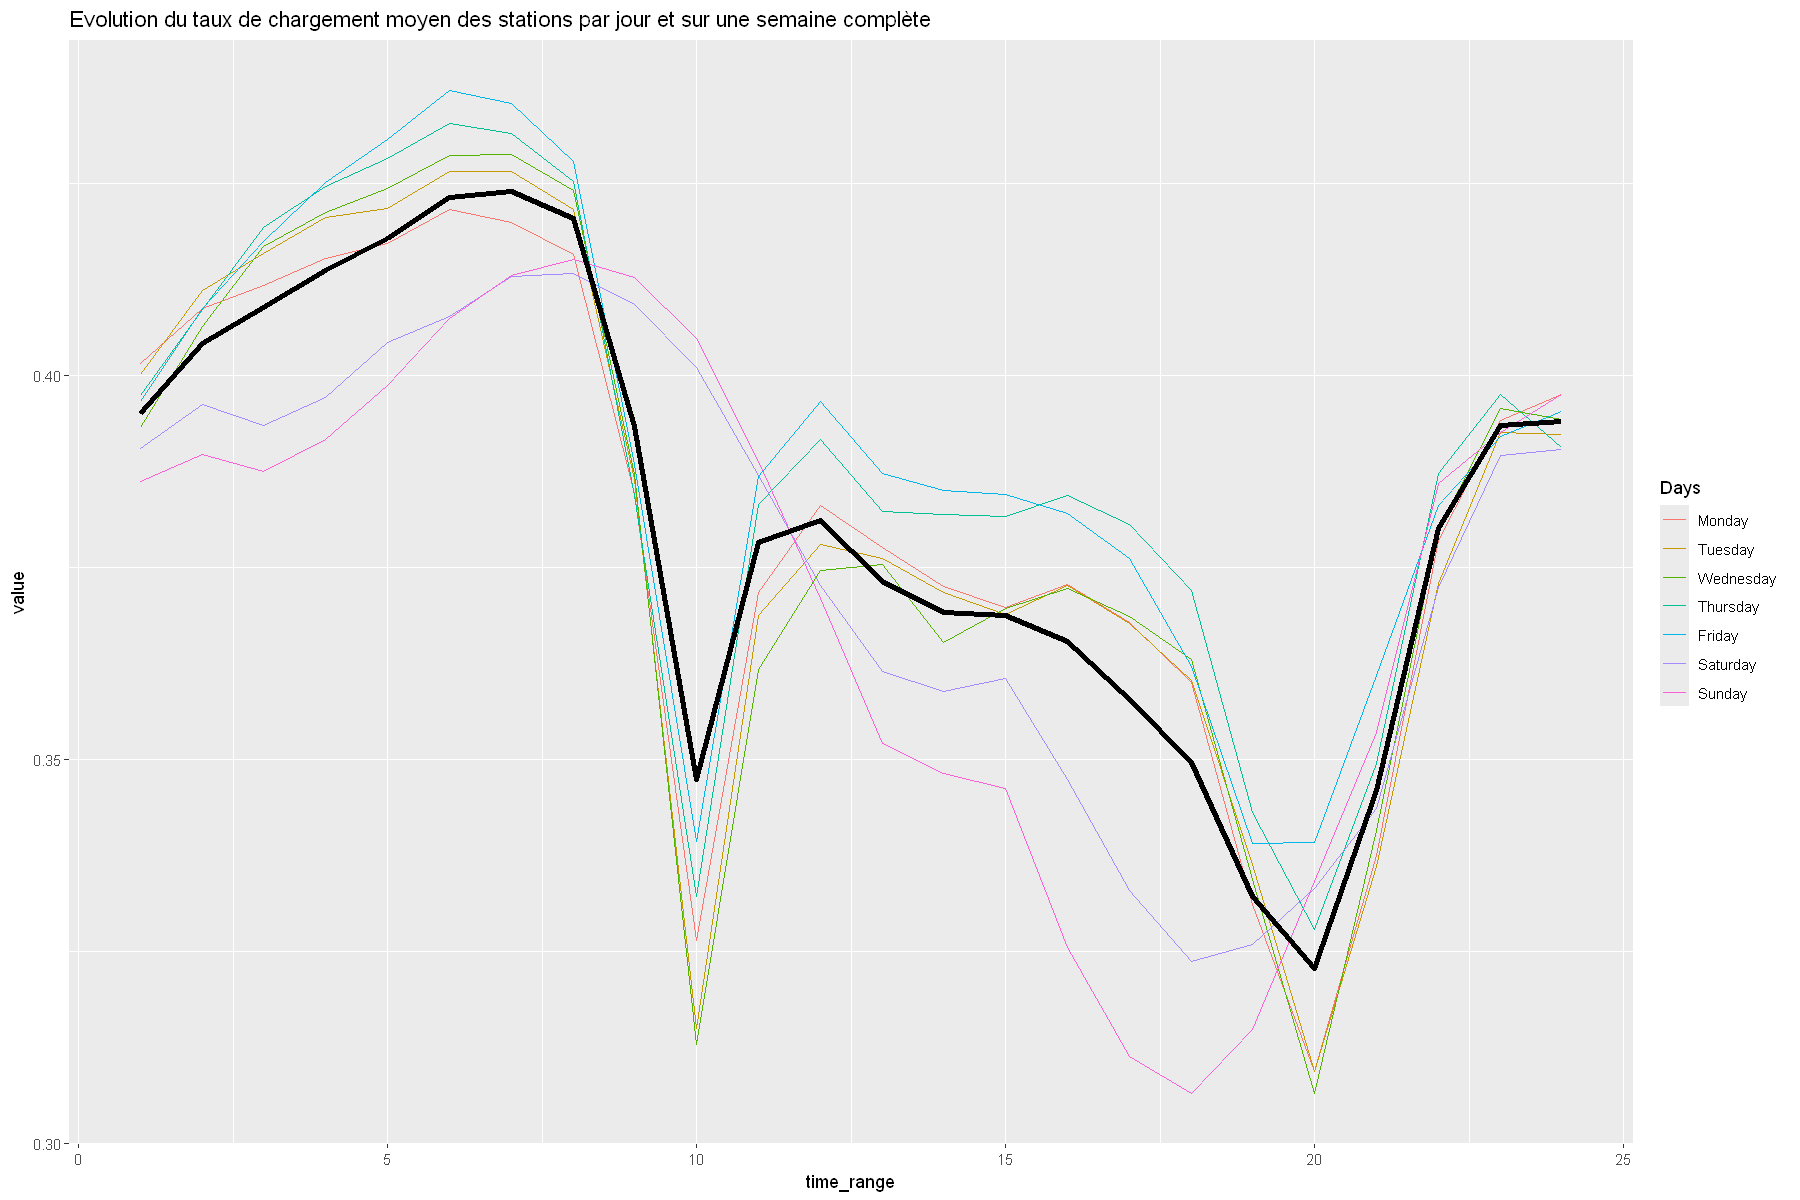

In [12]:
mean_per_hour_per_day = colMeans(loading)
mean_per_hour_per_day = matrix(mean_per_hour_per_day, nrow = 24)
mean_per_hour         = rowMeans(mean_per_hour_per_day)



mean_per_hour_per_day            = as.data.frame(mean_per_hour_per_day)
colnames(mean_per_hour_per_day)  = list("Monday", "Tuesday", "Wednesday","Thursday", "Friday", "Saturday", "Sunday")
mean_per_hour_per_day$time_range = c(1:24)
mean_per_hour_per_day            = melt(mean_per_hour_per_day, id='time_range', variable.name='Days')

mean_per_hour            = as.data.frame(mean_per_hour)
colnames(mean_per_hour)  = list("Weekly")
mean_per_hour$time_range = c(1:24)



options(repr.plot.width = 15, repr.plot.height = 10)

ggplot() + 
    ggtitle("Evolution du taux de chargement moyen des stations par jour et sur une semaine complète")+
    geom_line(data=mean_per_hour_per_day, aes(x=time_range, y=value, color=Days)) + 
    geom_line(data=mean_per_hour, aes(x=time_range, y=Weekly), linewidth = 1.5)

#rajouter un titre 

Interprétation : 

Tout d'abord, on peut visualiser des variations quotidiennes. Chaque ligne colorée représente un jour différent de la semaine, et la ligne noire représente la moyenne sur toute la semaine. On peut observer les tendances de chargement des stations pour chaque jour travaillé. On confirme également que le taux de chargement est différent pendant les week-ends, avec néanmoins une similarité observée entre le samedi et le dimanche. De plus, la moyenne hebdomadaire suit la tendance des jours travaillés. 

On remarque aussi des pics et des creux. Les pics représentent les heures où les stations sont les plus chargées en moyenne, ce qui pourrait correspondre aux heures avant que les gens ne se rendent au travail ou à l'école. Les creux représentent les heures où les stations sont les moins chargées, ce qui pourrait correspondre aux heures de pointe où les vélos sont utilisés pour les trajets. Cela va dans le même sens que nos hypothèses sur les boxplots superposés.

On peut en déduire des habitudes dans les comportements des utilisateurs. Par exemple, si les stations sont moins chargées vers 8h et 18h, cela pourrait indiquer les heures de début et de fin de journée de travail typiques.

En examinant les différences entre les jours de la semaine, on peut identifier des tendances spécifiques, comme des jours avec une plus grande utilisation des vélos. Par exemple, si les lignes pour le samedi et le dimanche montrent un chargement plus élevé pendant la journée, cela pourrait indiquer une utilisation récréative plus importante pendant les week-ends.


### Etude des stations vélib sur une carte 

Nous avons constaté des fortes disparités du taux de chargement en fonction des stations en affichant le pannel aléatoir de 16 sations de notre jeu de données. Nous nous demandons si cette disparité est due à l'emplacement géographique des stations. Par exemple, nous pouvons nous demander si le fait que certaines stations commencent la journée avec un taux de chargement faible pourraient être des stations se situant dans des quartiers de bureaux (généralement au centre, vers La Défense...), et se remplissent fortement dans la matinée. A contrario, certaines stations situées en périphérie pourraient commencer la journée avec un taux de remplissage élevé, puis se vider sur la période de départ au travail/école, et se remplir à nouveau en fin de journée. 

Pour étudier cela, nous allons étudier le taux de remplissage des staions sur une carte sur une même journée, à différents moments.

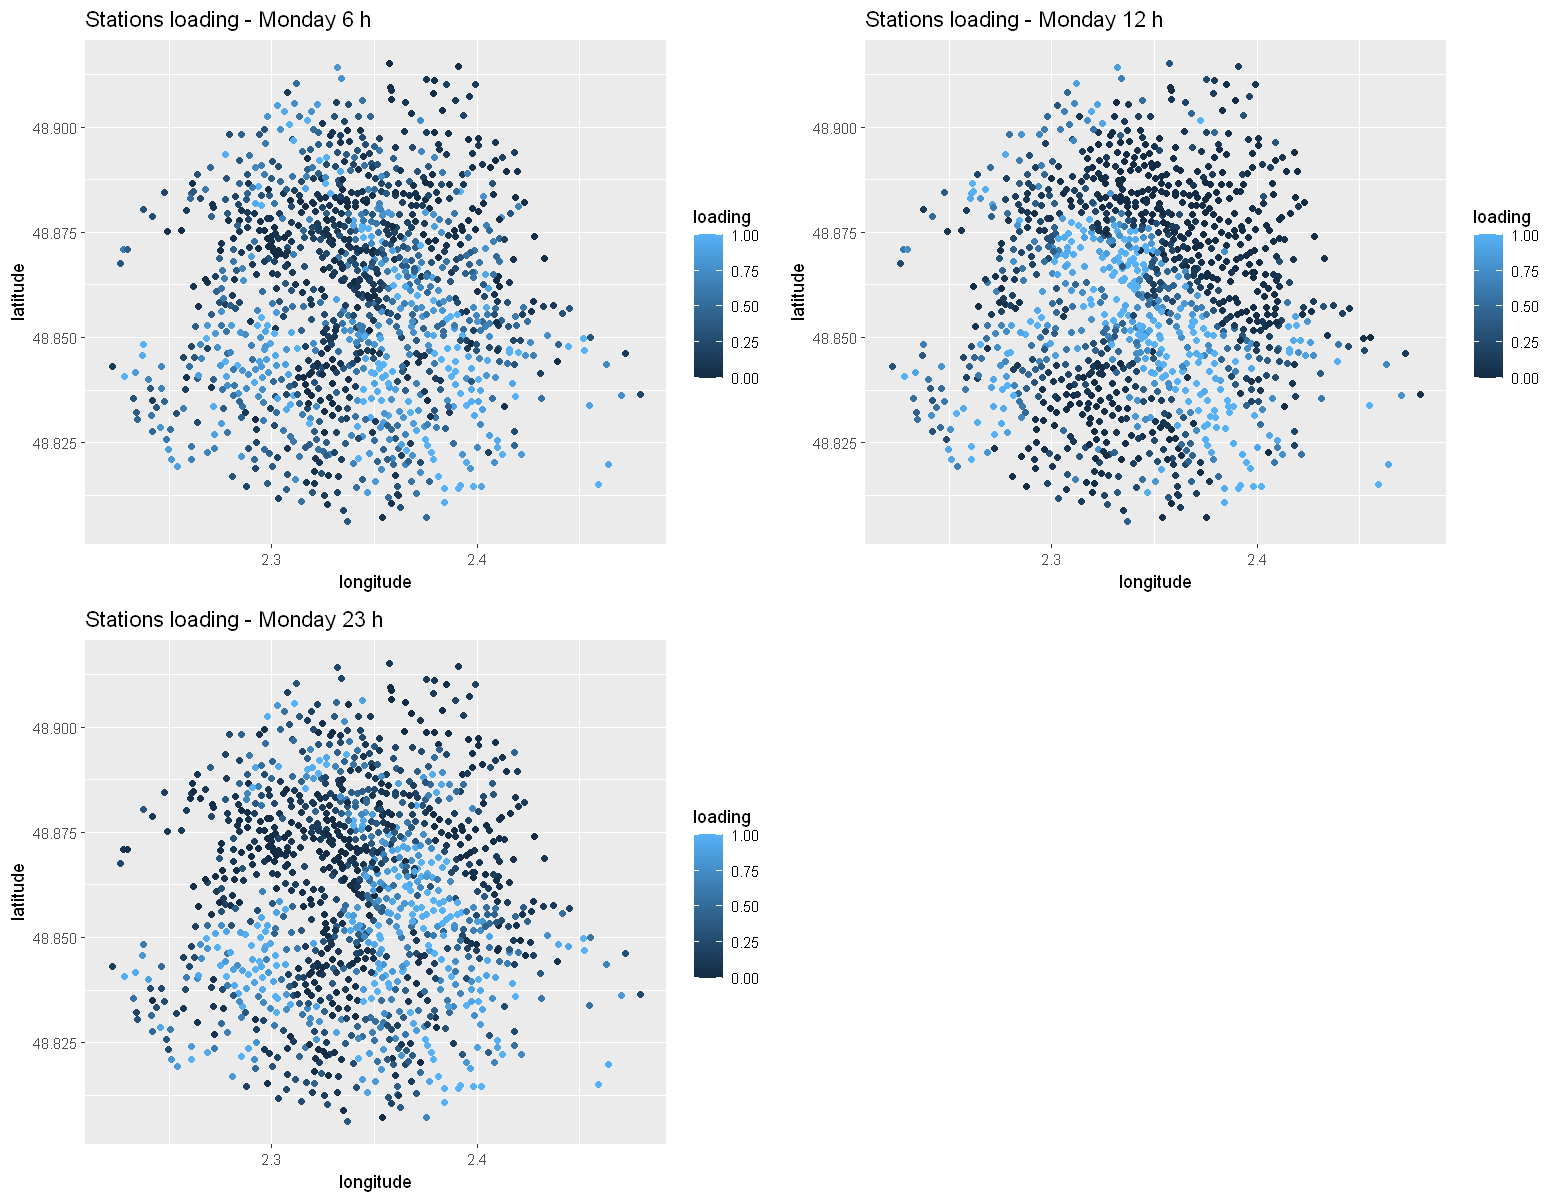

In [13]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 12, 23) # Monday at hour 6h, 12h, 23h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Les axes représentent la latitude et la longitude, positionnant ainsi les stations de Vélib sur une carte de Paris.
La couleur de chaque point représente le niveau de chargement de la station à l'heure indiquée, avec un code couleur allant du violet (peu ou pas de vélos disponibles) au jaune (station complètement chargée).

* Analyse à 6 heures (premier graphique à gauche) :

À 6 heures du matin, on observe une majorité de stations avec un chargement moyen à élevé (beaucoup de points jaunes et oranges). Cela suggère que les vélos ne sont pas encore largement utilisés à cette heure, ce qui est attendu tôt le matin. Et confirme l'hypothèse sur les stations en banlieu ou périphérie.

* Analyse à 12 heures (graphique du milieu) :

À midi, les couleurs sont peu variées. En effet, les stations sont soit assez pleines, soit assez vides. Il n'y a pas vraiment de station avec un taux de chargement moyen. De plus, on observe un regroupement central des stations présentant de la disponibilité. Ce regroupement peut correspondre aux quartiers de bureaux. 

* Analyse à 23 heures (dernier graphique à droite) :

À 23 heures, on observe une situation qui se rapproche de celle du même jour à 6h du matin. La répartition est plus homogène et les stations sont globalement chargées, les vélos sont disponibles, il y compris en périphérie.Cela pourrait indiquer que les gens ont tendance à moins utiliser les vélos en fin de soirée, qu'ils sont rentrés dans des quartiers résidentiels, ou que les vélos ont été retournés aux stations après les déplacements de la journée.


Ces cartes de chaleur peuvent également aider les gestionnaires de Vélib à identifier les zones où il y a une demande élevée de vélos à certaines heures, et où un rééquilibrage pourrait être nécessaire pour s'assurer que les utilisateurs trouvent des vélos disponibles en fonction de l'heure.

Finalement, cette analyse concorde avec nos hypothèses sur les taux de remplissages en fonction des types de quartiers (résidentiels ou de bureaux). ).

### Etude des déplacements pendulaires sur une carte

Pour mettre en lumière les déplacements pendulaires, et ainsi confirmer ou invalider nos hypothèses, nous allons représenter ce même style de graphique avant les déplacements pendulaires (par exmple le matin assez tôt), et après (par exemple en milieu de matinée).

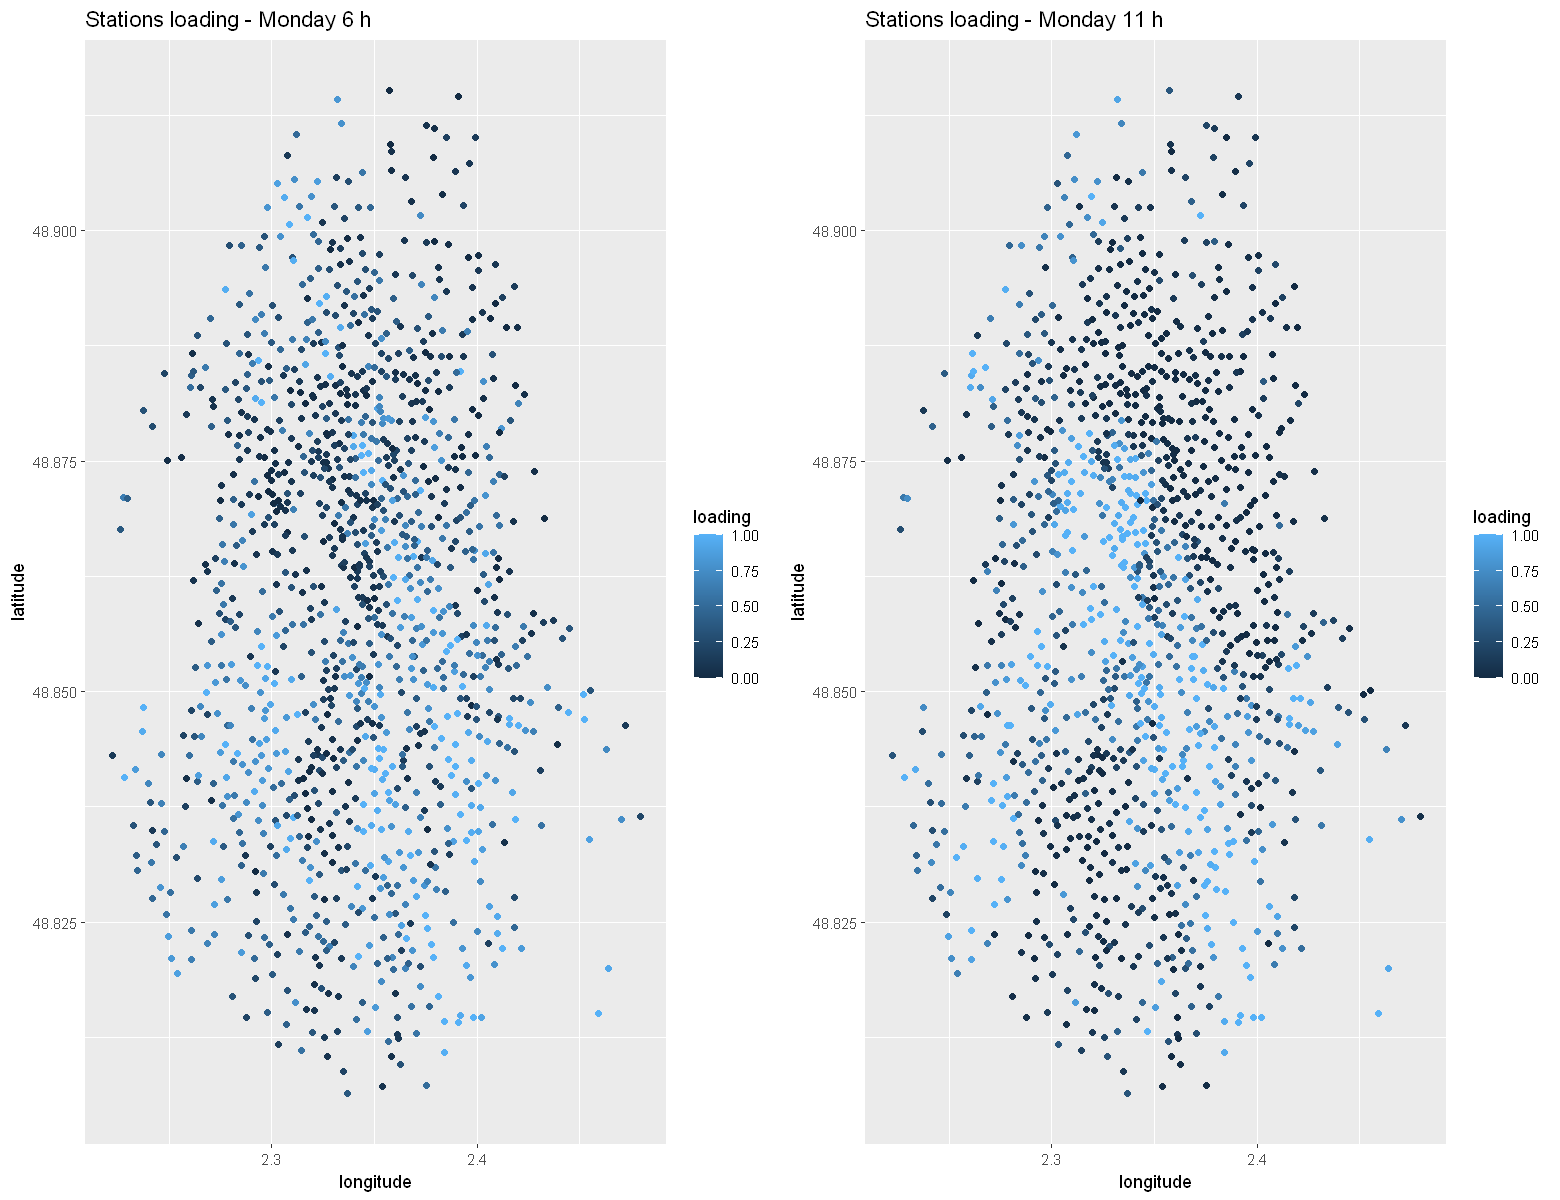

In [14]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6, 11) # Monday at hour 6h, 11h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))

Interprétation : 

Sur cette carte, nous observons clairement que les stations en périphérie se vident au profit des stations au centre. De plus, puisque les tendances observées sur tous les jours travaillés sont les mêmes (cf : Etude de la temporalité du chargement moyen au cours de la semaine), on peut alors valider notre hypothèse selon laquelle les déplacements pendulaires font que les vélos sont utilisés de l'extérieur de la ville vers le centre, où sont regroupés les quartiers de bureaux. 

### Influence de l'altitude des stations sur les taux de chargement

Nous avons présenté la colonne bonus dans l'introduction de ce projet. Nous allons regarder si cet élément à une influence sur le taux de chargement des stations. Pour ce faire, nous allons commencer par étudier la répartition des stations en altitude.

$title
[1] "Titre du graphique"

attr(,"class")
[1] "labels"

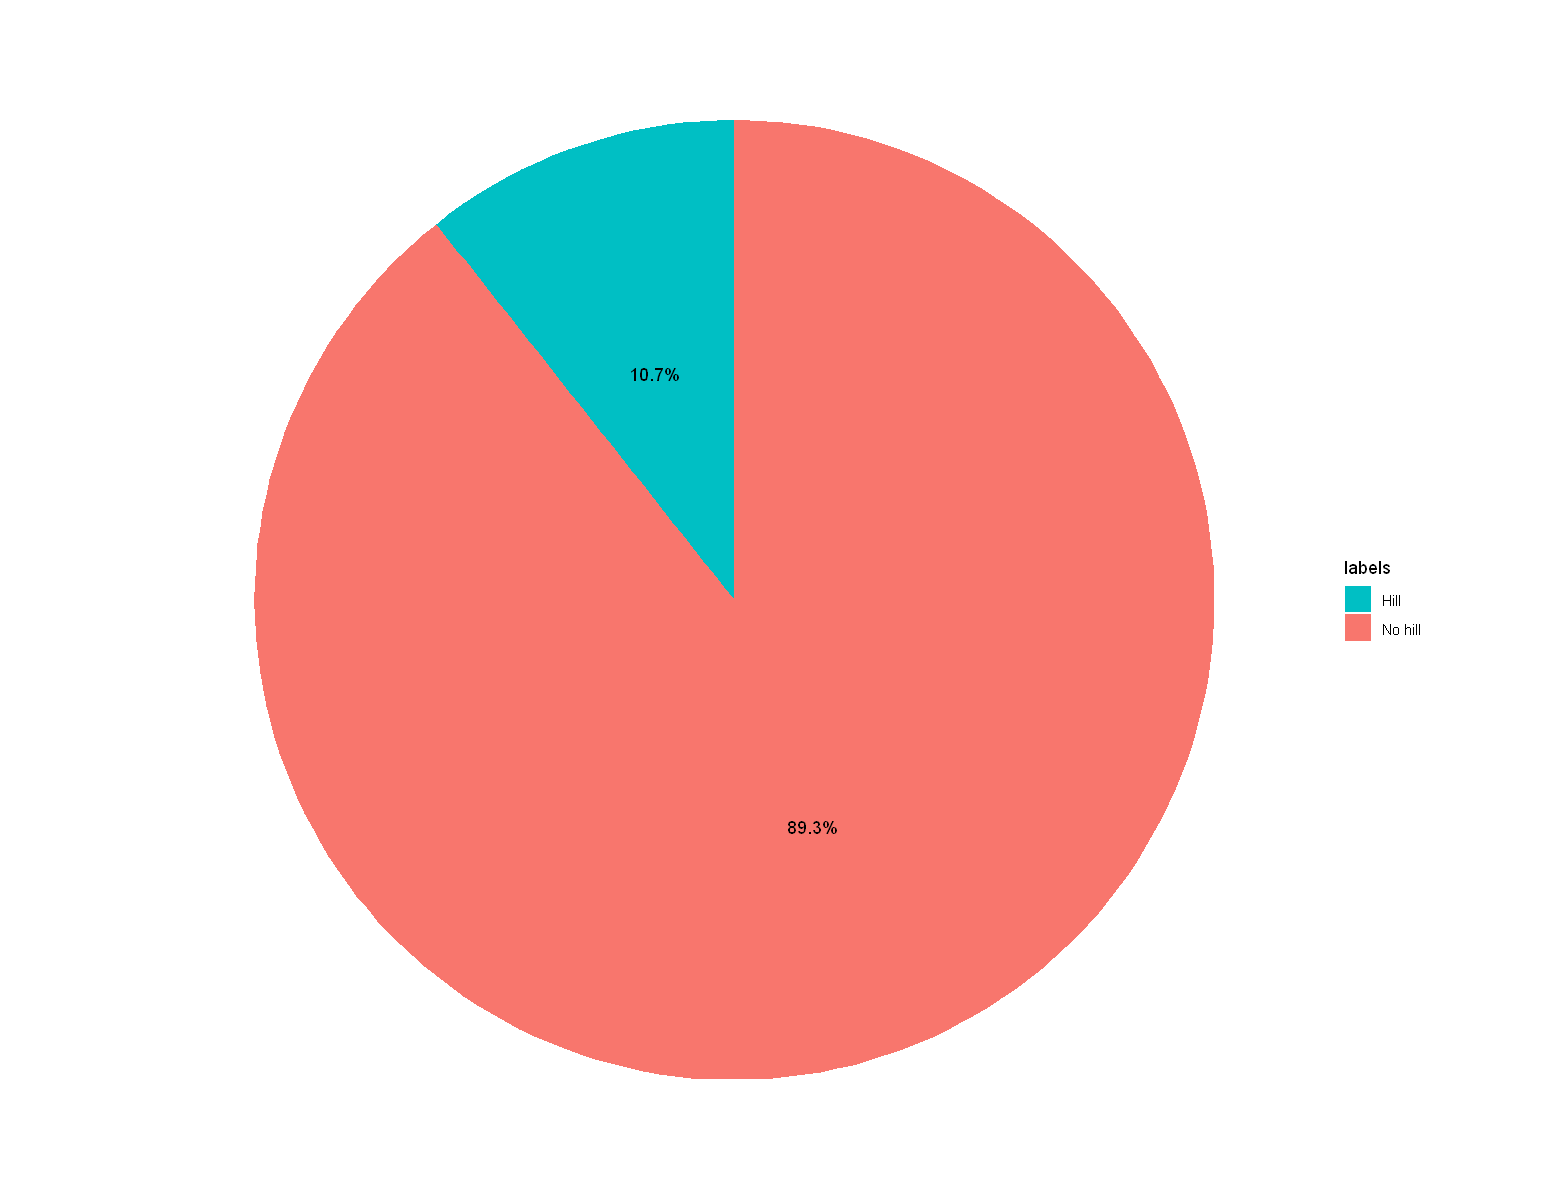

In [15]:
ggtitle("Titre du graphique")
df <- data.frame(size = c(sum(coord$bonus == 0), sum(coord$bonus == 1)),
                 labels = c('No hill', 'Hill'))

# Calculer les pourcentages
df$percentage <- df$size / sum(df$size) * 100

# Créer le graphique en coordonnées polaires avec ggplot2
ggplot(df, aes(x = "", y = percentage, fill = labels)) +
  geom_bar(stat = "identity", width = 1, position = "fill") +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), position = position_fill(vjust = 0.5)) +
  coord_polar(theta = "y") +
  scale_fill_hue(direction = -1) +  # pour inverser l'ordre du colormap par défaut
  theme_void()


Interprétation : 

La grande majorité des stations Vélib, soit 89.3%, sont situées en plaine. Cela suggère que la plupart des stations sont dans des zones relativement plates de la ville. Seulement 10.7% des stations sont situées en altitude. Ces stations peuvent se trouver sur des collines ou dans des zones élevées de la ville.

Cette répartition peut avoir des implications sur l'usage des vélos. Les stations en plaine sont probablement plus fréquentées en raison de la facilité de pédalage sur terrain plat. Les stations en altitude pourraient avoir moins de fréquentation en raison de l'effort supplémentaire requis pour y accéder ou en partir, bien qu'elles puissent servir des zones résidentielles situées en hauteur.

Cela peut avoir un impact sur des opérations logistiques. Il peut y avoir des opérations de rééquilibrage des vélos (s'assurer que les stations ne soient ni vides ni pleines). Il peut être plus difficile de maintenir un bon équilibre pour les stations en altitude, en particulier si les utilisateurs ont tendance à prendre les vélos en descente et non en montée.

### Représentation des stations en altitude sur une carte

Nous allons étudier la répartition géographique des stations en altitude. De manière analogue aux première visualisations sur cartes, nous allons représenter la répartition des stations en altitude sous forme de nuage de points. En s'appuyant sur nos observations précédentes, nous allons voir si cet élément peut avoir une influence sur les chargements des stations.

Nous allons également juxtaposer la carte montrant le taux de chargement à 6h du matin pour comparer avec le taux de chargement des stations.

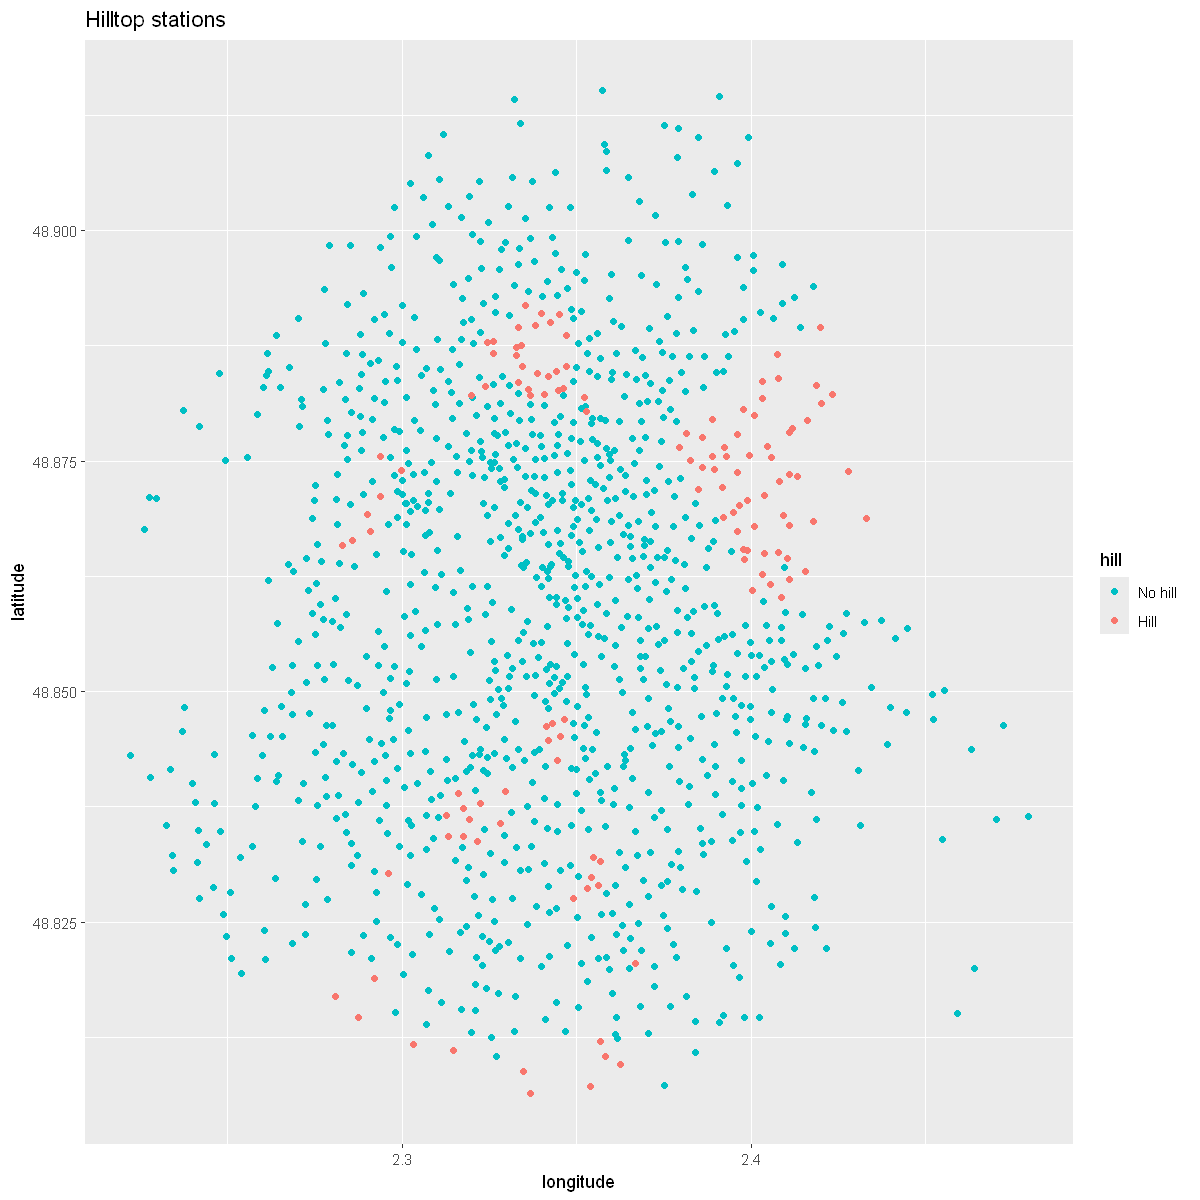

In [16]:
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


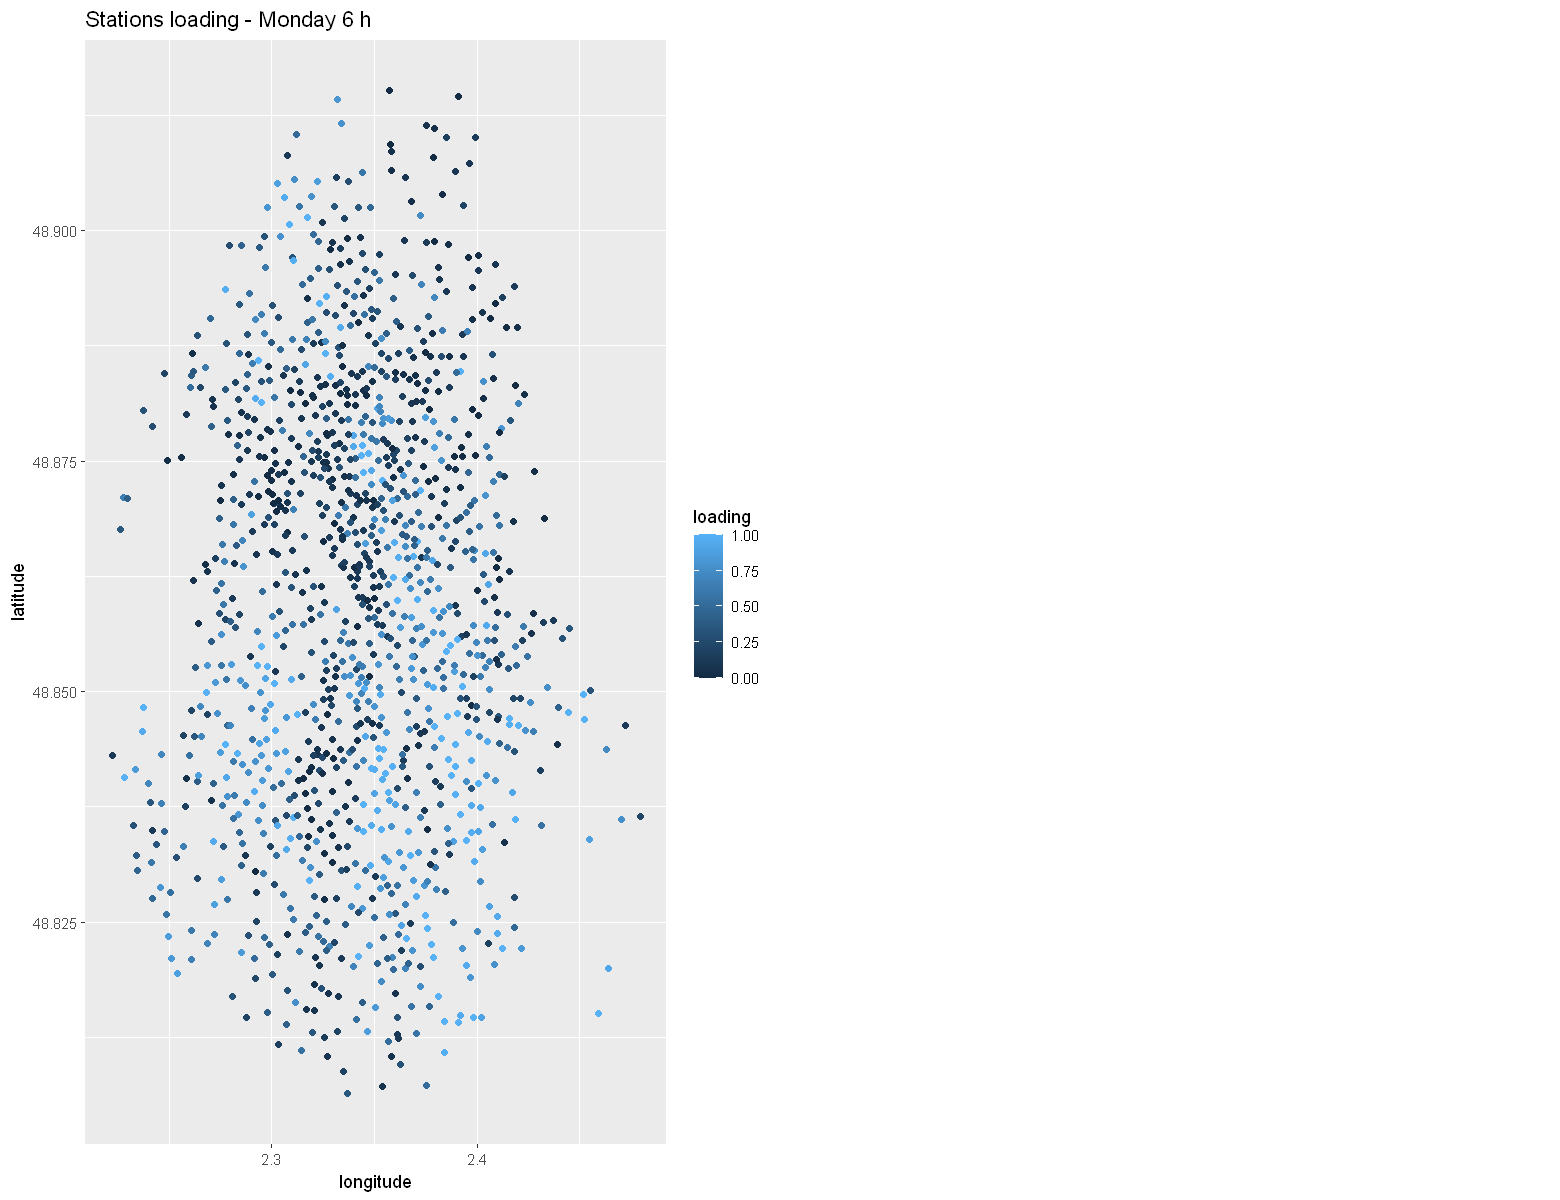

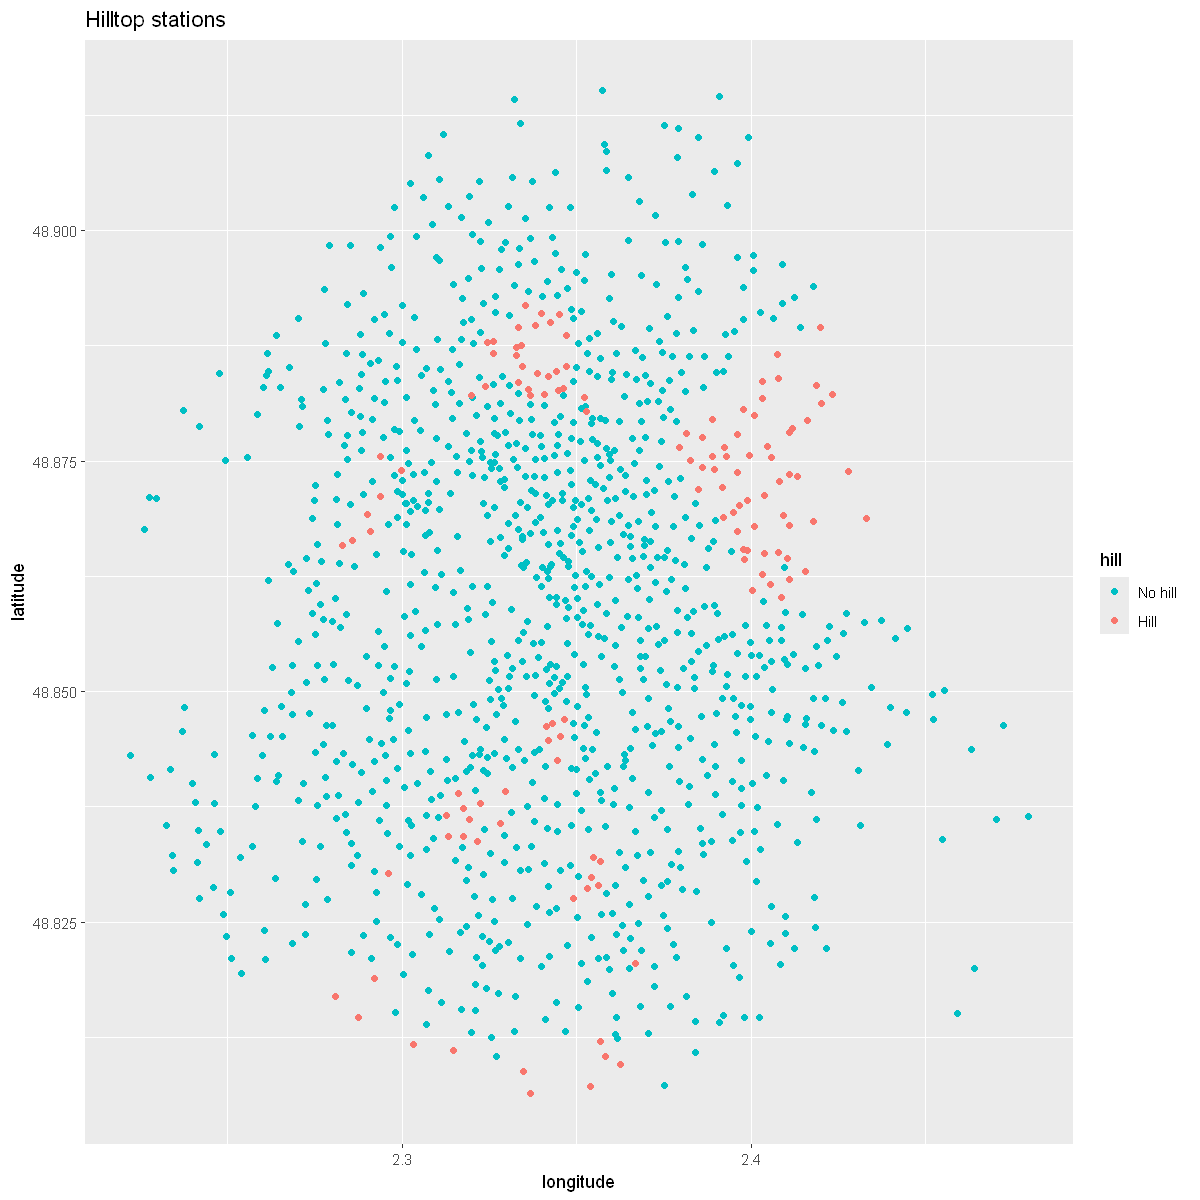

In [17]:
# Hours to be displayed
options(repr.plot.width = 13, repr.plot.height = 10)
hours = c(6) # Monday at hour 6h

dfi = coord
p = list()
for (i in 1:length(hours)){
    dfi$loading = loading[,hours[i]]
    p[[i]] = ggplot(dfi, aes(x=longitude, y=latitude, color=loading)) + 
        geom_point() +
        labs(title = paste("Stations loading - Monday",hours[i],"h"))
}

do.call(grid.arrange,c(p, ncol=2))
coord$hill = as.factor(coord$bonus)
levels(coord$hill) = c('No hill','Hill')

# --- #

options(repr.plot.width = 10, repr.plot.height = 10)

ggplot(coord, aes(x=longitude, y=latitude, color=hill)) + 
    geom_point() +
    scale_color_hue(direction = -1) +
    labs(title = 'Hilltop stations')


Interprétation :

    Distribution géographique :

Les stations situées en plaine sont largement réparties sur toute la carte, indiquant une bonne couverture de ces zones par le réseau Vélib. Les stations en altitude sont moins nombreuses et semblent être groupées dans certaines zones, ce qui est cohérent avec le diagramme en camembert précédent indiquant que seulement 10,7 % des stations sont en altitude.

    Accessibilité et préférences d'utilisation :

Comme les stations en plaine sont plus nombreuses et probablement plus accessibles, elles sont susceptibles d'être plus utilisées, comme nous l'avons discuté précédemment. Cela pourrait être dû à la facilité de pédaler sur un terrain plat. Les stations en altitude peuvent avoir des taux d'utilisation plus faibles, notamment parce que les efforts nécessaires pour atteindre ces stations sont plus importants, ce qui peut dissuader leur utilisation, surtout lorsqu'il s'agit de remonter.

    Implications pour la planification urbaine :

L'emplacement des stations en altitude peut nécessiter une attention particulière de la part des planificateurs urbains et des gestionnaires de Vélib pour garantir une distribution équilibrée des vélos et pour encourager leur utilisation, peut-être en offrant des incitations. Cependant, en juxtaposnt les deux cartes comme dans la deuxième partie du graphique, on remarque que les stations en altitudes ont un faible taux de remplissage le matin à 6h. On en déduit que les vélos ne sont pas nécéssairement remontés dans ces stations, peut être parce qu'ils ne sont pas beaucoup demandé. Cela va dans le sens du caractère plus sportif de leur accessibilité.

    Corrélation avec la topographie :

La concentration des stations en altitude dans des zones spécifiques peut correspondre à la topographie de Paris, avec des collines comme Montmartre ou Belleville. Cela montre que le réseau Vélib tient compte du relief de la ville dans la planification de l'emplacement des stations.


## Conclusion sur l'étude descriptive

L'étude statistique a fourni des perspectives significatives sur la dynamique d'utilisation des stations Vélib à Paris. Nous avons examiné plusieurs aspects, notamment la disponibilité des vélos à différentes heures de la journée et des jours de la semaine, la distribution géographique des stations par rapport à la topographie de la ville et la répartition des stations entre les zones de plaine et les zones en altitude.

Les graphiques temporels ont montré des modèles d'utilisation distincts au cours de la journée, avec des pics de disponibilité des vélos tôt le matin et tard le soir, et une diminution pendant les heures de pointe. Ces tendances sont probablement liées aux habitudes de déplacement des parisiens, avec un usage plus intense lors des trajets pendulaires et une utilisation moindre durant les heures creuses.

La répartition spatiale des stations de Vélib a révélé que la majorité des stations sont situées en plaine, facilitant l'accès et l'utilisation. En revanche, une minorité de stations situées en altitude pourrait indiquer des défis spécifiques, tels que des efforts supplémentaires pour atteindre ces stations, pouvant expliquer une utilisation moins fréquente.

Nous allons maintenant étudier les possibilités de réduction de dimension de nos jeux de données.

# II - Réduction de dimension par ACP (Analyse en Composantes Principales)

Dans cette partie, nous allons procéder à une Analyse en Composantes Principales (ACP). L'objectif de cette méthode est de synthétiser les variables du jeu de donbnées initial en un nombre limité de composantes principales, tout en conservant un maximun d'informations. Initialement, nous avons 168 variables, qui correspondent aux 168 heures d'une semaine. Nous allons étudier s'il est possible de réduire cette dimension, tout en conservant un maximum d'information. 

## Vérification du format des données

In [18]:
library(FactoMineR)
library(corrplot)
library(factoextra)
library(gplots)

corrplot 0.92 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attachement du package : 'gplots'


L'objet suivant est masqué depuis 'package:stats':

    lowess




In [19]:
head(loading)

,1,2,3,4,5,6,7,8,9,10,⋯,159,160,161,162,163,164,165,166,167,168
EURYALE DEHAYNIN,0.03846154,0.03846154,0.07692308,0.03846154,0.03846154,0.03846154,0.03846154,0.03846154,0.10714286,0.00000000,⋯,0.29629630,0.11111111,0.1111111,0.14814815,0.30769231,0.07692308,0.11538462,0.07692308,0.1538462,0.1538462
LEMERCIER,0.47826087,0.47826087,0.47826087,0.43478261,0.43478261,0.43478261,0.43478261,0.43478261,0.26086957,0.04347826,⋯,0.04347826,0.00000000,0.2173913,0.13043478,0.04545455,0.17391304,0.17391304,0.17391304,0.2608696,0.3913043
MEZIERES RENNES,0.21818182,0.14545455,0.12727273,0.10909091,0.10909091,0.10909091,0.09090909,0.09090909,0.05454545,0.10909091,⋯,0.25925926,0.25925926,0.2037037,0.12962963,0.14814815,0.29629630,0.31481481,0.37037037,0.3703704,0.4074074
FARMAN,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,0.95238095,1.00000000,1.00000000,1.00000000,⋯,1.00000000,1.00000000,0.9047619,0.85714286,0.85714286,0.85714286,0.76190476,0.76190476,0.7619048,0.7619048
QUAI DE LA RAPEE,0.92753623,0.81159420,0.73913043,0.72463768,0.72463768,0.72463768,0.72463768,0.72463768,0.75362319,0.97101449,⋯,0.22727273,0.45454545,0.5909091,0.83333333,1.00000000,0.81818182,0.63636364,0.71212121,0.6212121,0.5757576
CHOISY POINT D'IVRY,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.16666667,0.08333333,0.00000000,⋯,0.34782609,0.08695652,0.1153846,0.08695652,0.13043478,0.08695652,0.08695652,0.43478261,0.3913043,0.5217391


In [20]:
str(loading)

 num [1:1189, 1:168] 0.0385 0.4783 0.2182 0.9524 0.9275 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1189] " EURYALE DEHAYNIN" " LEMERCIER" " MEZIERES RENNES" " FARMAN" ...
  ..$ : chr [1:168] "1" "2" "3" "4" ...


In [21]:
data_pca = scale(loading, center = FALSE, scale = FALSE)

Interprétation :

Notre dataframe sur le chargement contient uniquement des valeurs quantitatives (il est donc compatible pour une ACP). Ce sont seulement les colonnes et les lignes qui définissent notre tableau qui sont des variables qualitatives. 


## Mise en place de l'ACP

In [22]:
resultat_pca = PCA(data_pca)

In [23]:
# Afficher les 20 premières lignes des valeurs propres
head(resultat_pca$eig, 20)


,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,66.8889628,39.8148588,39.81486
comp 2,39.4864464,23.5038371,63.31870
comp 3,8.8676493,5.2783627,68.59706
comp 4,7.3053255,4.3484080,72.94547
comp 5,5.5031128,3.2756624,76.22113
comp 6,3.2457422,1.9319894,78.15312
comp 7,2.8290954,1.6839854,79.83710
comp 8,2.6843088,1.5978028,81.43491
comp 9,2.1574158,1.2841760,82.71908
comp 10,2.0572602,1.2245596,83.94364


In [24]:
# Extraire les valeurs propres (variance expliquée) TRUC DE CHAT MAIS JE PENSE QU'ON PEUT VIRER
#var_exp <- resultat_pca$sdev^2

# Calculer la variance cumulée
#var_cumulative <- cumsum(var_exp)

# Créer un data frame pour stocker les résultats
#tableau_acp <- data.frame(
 # Dimension = 1:length(var_exp),
  #Variance_Expliquee = var_exp,
  #Variance_Cumulee = var_cumulative
#")

# Tronquer le tableau aux 20 premières dimensions
#tableau_acp <- tableau_acp[1:20, ]

# Afficher le tableau
#print(tableau_acp)

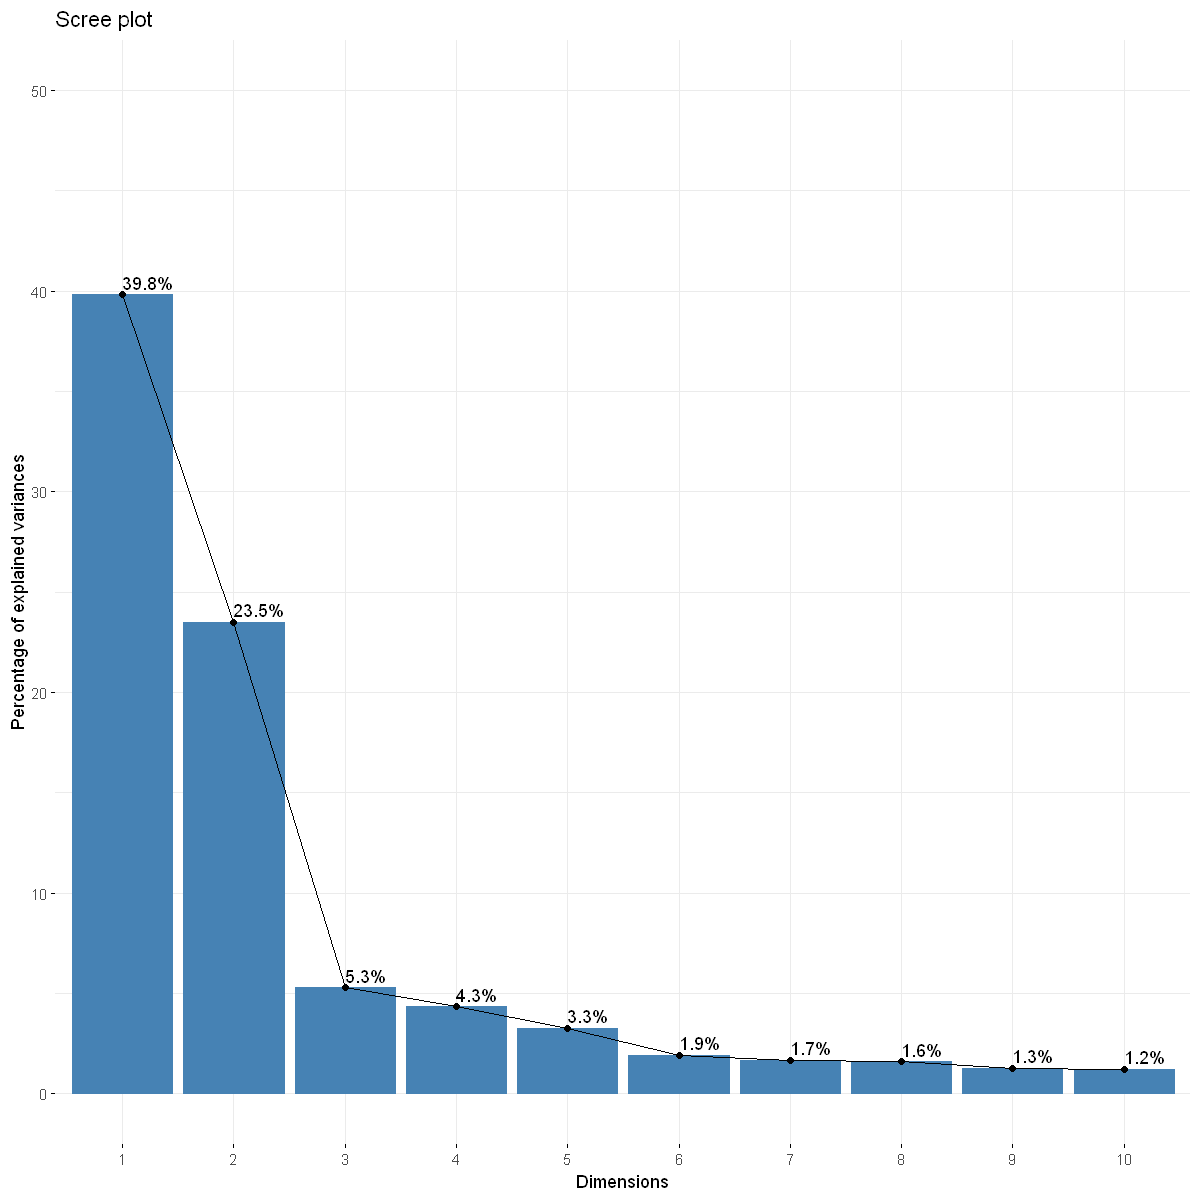

In [25]:
fviz_screeplot(resultat_pca, addlabels=TRUE, ylim=c(0,50))

In [26]:
#fviz_screeplot(resultat_pca, addlines = TRUE, ylim = c(0, 1))  IDEM
# Ajouter une ligne horizontale à 0.8
#abline(h = 0.8, col = "red", lty = 2)

# Ajouter une ligne horizontale à 0.9
#abline(h = 0.9, col = "blue", lty = 2)

Interprétation : 
* Dans un premier temps, le tableau nous présente la varianxce expliquée pour chaque dimension, ainsi que le pourcentage que cela représente. La dernière colonne nous donne les pourcentages de variances cumulées. En général, on peut se satisfaire de dimension représentant 80% de la variance cumulée. Ici, cela reviendrait à garder 7 composantes principales. Si on souhaite plus de précision, avec 90% de la variance cumulée, on peut alors garder 17 composantes principales. Cependant, on observe que les 2 premières composantes portent beaucoup d'information (65% de la variance cumulée), cela montre que ces 2 composantes portent à elles-seules beaucoup d'information. 

* Le graphique nous permet de vérifier ces observations. On remarque qu'à partir d'un certain seuil (environ 90%), il faut rajouter beaucoup de composantes dans l'ACP pour gagner de l'information sur la variance cumulée.

## Etude des composantes principales

Nous allons construire un nouveau dataframe avec les 7 premiers composantes de l'ACP. Comme présenté ci-dessus, cela nous permeter d'expliquer 80% de la variance. 

In [27]:
# Supposons que votre objet de résultat de l'ACP s'appelle resultat_pca
resultat_pca = prcomp(data_pca)

# Supposons que vous voulez créer un dataframe avec les 7 premières dimensions
loading_pca = data.frame(
  Dim1 = resultat_pca$x[, 1],
  Dim2 = resultat_pca$x[, 2],
  Dim3 = resultat_pca$x[, 3],
  Dim4 = resultat_pca$x[, 4],
  Dim5 = resultat_pca$x[, 5],
  Dim6 = resultat_pca$x[, 6],
  Dim7 = resultat_pca$x[, 7]
)

# Afficher les premières lignes du résultat
head(loading_pca)



,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.898351093,-2.323003,-0.4586635,-1.4785445,0.8986745,0.0643830,-0.1960324
2,2.549737302,-3.931784,-0.2423450,-1.0733374,0.4617664,0.4575796,0.7773415
3,1.051733801,1.056763,-0.8571908,-0.9392326,0.9818443,-0.1434297,0.6107157
4,-0.083202891,3.523981,0.5852023,2.0534663,-1.5829101,-0.2481645,-0.9804303
5,1.381803464,2.717041,0.6396883,-0.9403843,-0.5997428,1.0770013,0.1948156
6,-0.005452857,-1.795863,-0.7691141,-0.8822126,0.8534171,-0.2516383,0.4586171


Remarque: on peut noter que les valeurs de notre dataframe ne sont pas exactement les mêmes que sur le notebook Python. L'ACP sous R ne prend pas forcément la même base que sur Python, ce qui explique les valeurs parfois négatives ou positives. 

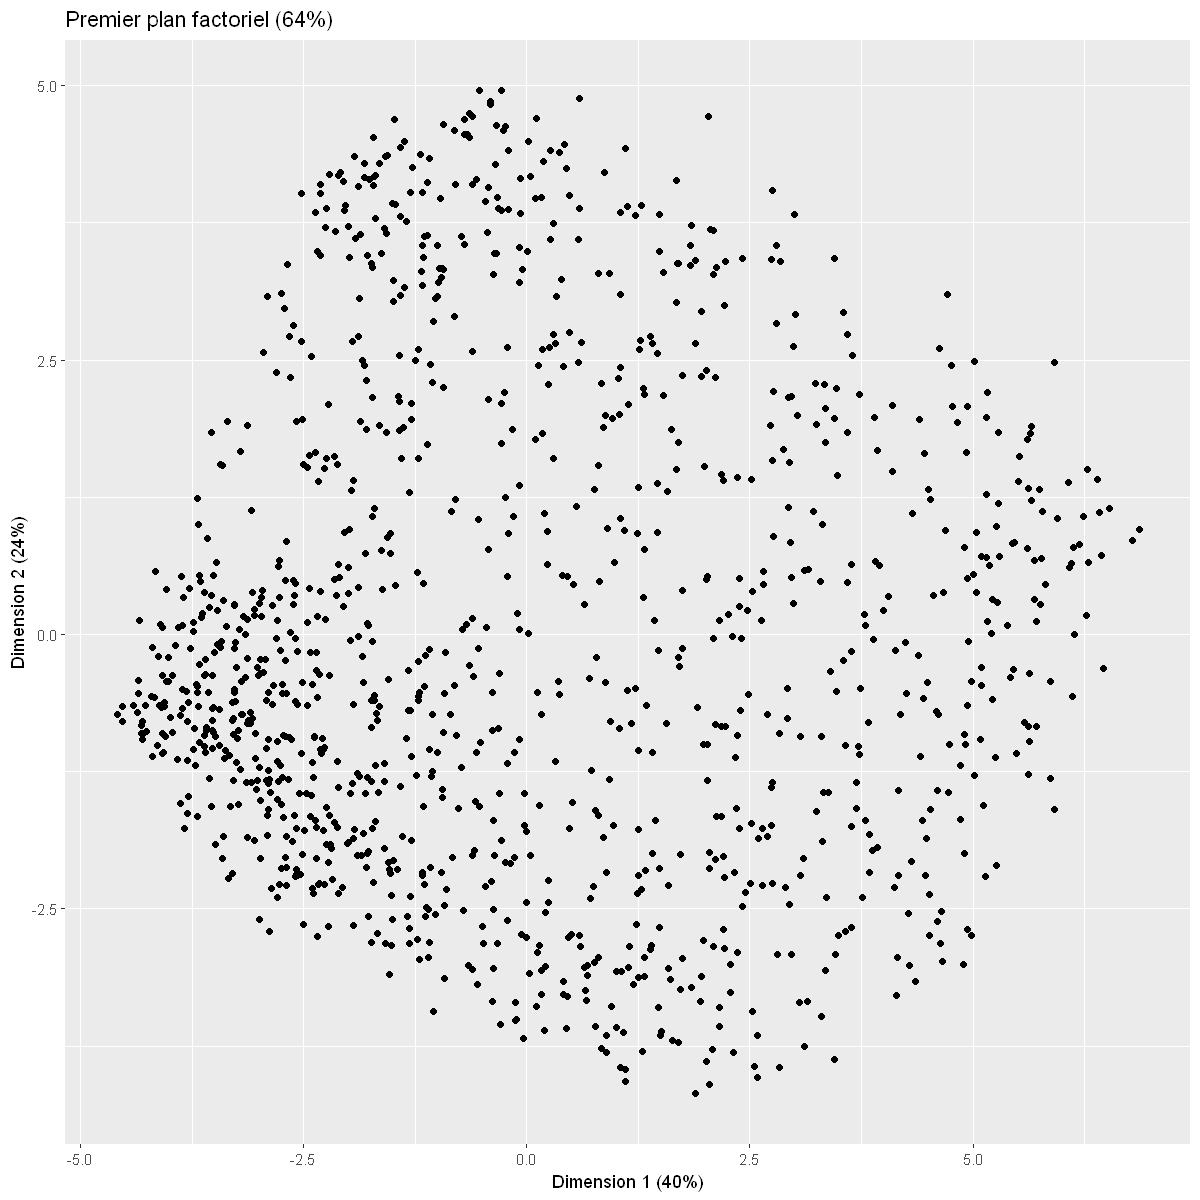

In [28]:
# Supposons que votre dataframe s'appelle loading_pca
# Utilisez la fonction ggplot() pour créer un nuage de points
ggplot(loading_pca, aes(x = Dim1, y = Dim2)) +
  geom_point() +
  labs(x = "Dimension 1 (40%)", y = "Dimension 2 (24%)", title = "Premier plan factoriel (64%)")


Interprétation : 

Il est maintenant possible de représenter les données sur le premier plan factoriel. Nous avons projeté le nuage des individus sur le premier plan factoriel, c’est-à-dire sur un plan composé des 2 premières composantes principales. Ici, on observe que : 

* Le premier axe (Dimension 1) explique 40% de la variance des données, et le deuxième axe (Dimension 2) en explique 24%. Ensemble, ils représentent 64% de la variance totale des données. Ceci indique que le premier plan factoriel donne une représentation assez informative des données, même si une part non négligeable de la variance reste non expliquée.
* Les points sont dispersés sur le graphe, ce qui suggère qu'il y a de la variabilité dans les données. Idéalement, pour une interprétation plus aisée, on aurait aimé voir des groupes de points distincts, ce qui indiquerait des clusters ou des regroupements naturels au sein des données.

Cependant, ce graphique n'est pas très pertienent et contient beaucoup d'informations supplémentaires qui ne peuvent pas êtres analysées correctement dans notre cas.  

* Bien que 64% ne soit pas un mauvais résultat, on pourrait espérer un pourcentage plus élevé pour une représentation fidèle des données.
* On remarque que les données sont uniformément dispersées et il n'y a pas de pattern visible de groupes ou de tendances. Cela peut indiquer que les deux principales composantes ne capturent pas bien les structures sous-jacentes.
    

## Mise en place d'hypothèses sur la signification des composantes principales

### Composante principale 1

On a choisi de conserver les 7 premières composantes principales de l'ACP afin de pouvoir expliquer 80% de la variance. Il est intéressant d'étudier la siagnification, ou ce que chacune des composantes principales pourrait représenter. 

Notre stratégie pour cette partie est la suivante : pour chaque composante principale conservée, nous récupérons les 5 indices des valeurs maximales pour cette composante, idemn pour les valeurs minimales. Suite à cela, nous utilisons ces indices pour récupérer et représenter l'évolution du taux de chargement moyen des stations correspondantes. A partir de nos observations dans cette étape nous émettons des conjectures sur la signification de chaque composante principale. Nous vérifierons nos hypothèses dans une partie ultérieure.

In [29]:
# On récupère les 5 valeurs min et max pour la première composante
max1 = order(-loading_pca$Dim1)[1:5] # on trie les indices dans l'ordre décroissant
min1= order(loading_pca$Dim1)[1:5]

cat("Indices des valeurs max:\n", max1, "\n---------\n")
cat("Indices des valeurs min:\n", min1, "\n")

a=c(max1,min1)

Indices des valeurs max:
 1107 978 441 363 403 
---------
Indices des valeurs min:
 997 85 905 1088 1133 


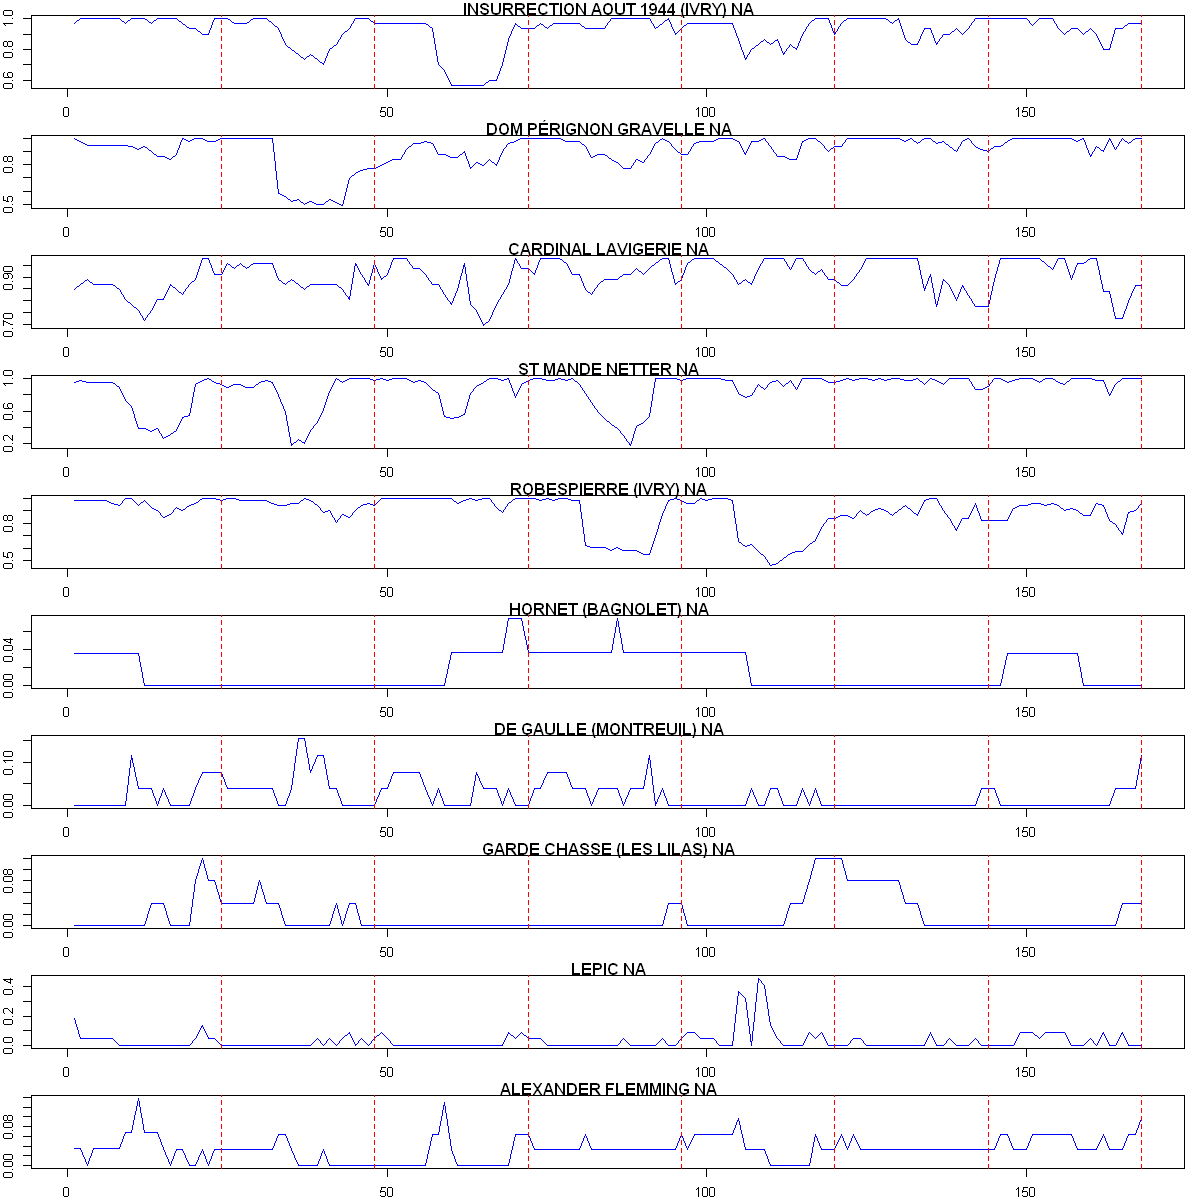

In [30]:
# Visualisation
par(mfrow = c(length(a), 1), mar = c(2, 2, 1, 1))

for (i in a) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)


Interprétation : 
   * Les 4 graphes situés sur la première rangée représentent les 4 stations avec les taux de chargement les plus élevés. ces graphes ont été construits en récupérant les 4 plus grandes valeurs de la dimension 1 de notre ACP. 
   * De même, les 4 graphes de la seconde ligne sont ceux où les stations sont les plus déchargées, c'est à dire lorsque les vélos d'une station sont très utilisés. On a obtenu ces graphes en récupérant les valeurs les plus petite de la dimension 1. 

On pourrait émettre l'hypothèse que la première dimension porte l'information sur le taux de chargement des stations. Plus la dimension 1 est élevée, plus le chargement est important. A l'inverse, plus la dimension 1 est faible et plus la station est vide. On pourrait vérifier cette hypothèse en calculant le chargement moyen et en étudiant la corrélation avec la dimension 1.

### Composante principale 2

Nous allons maintenant procéder à la même analyse pour la deuxième composante.

In [31]:
# On récupère les 5 valeurs min et max pour la composante composante
max2 = order(-loading_pca$Dim2)[1:5] # on trie les indices dans l'ordre décroissant
min2= order(loading_pca$Dim2)[1:5]

cat("Indices des valeurs max:\n", max2, "\n---------\n")
cat("Indices des valeurs min:\n", min2, "\n")

Indices des valeurs max:
 1176 475 220 629 267 
---------
Indices des valeurs min:
 1095 571 1181 399 354 


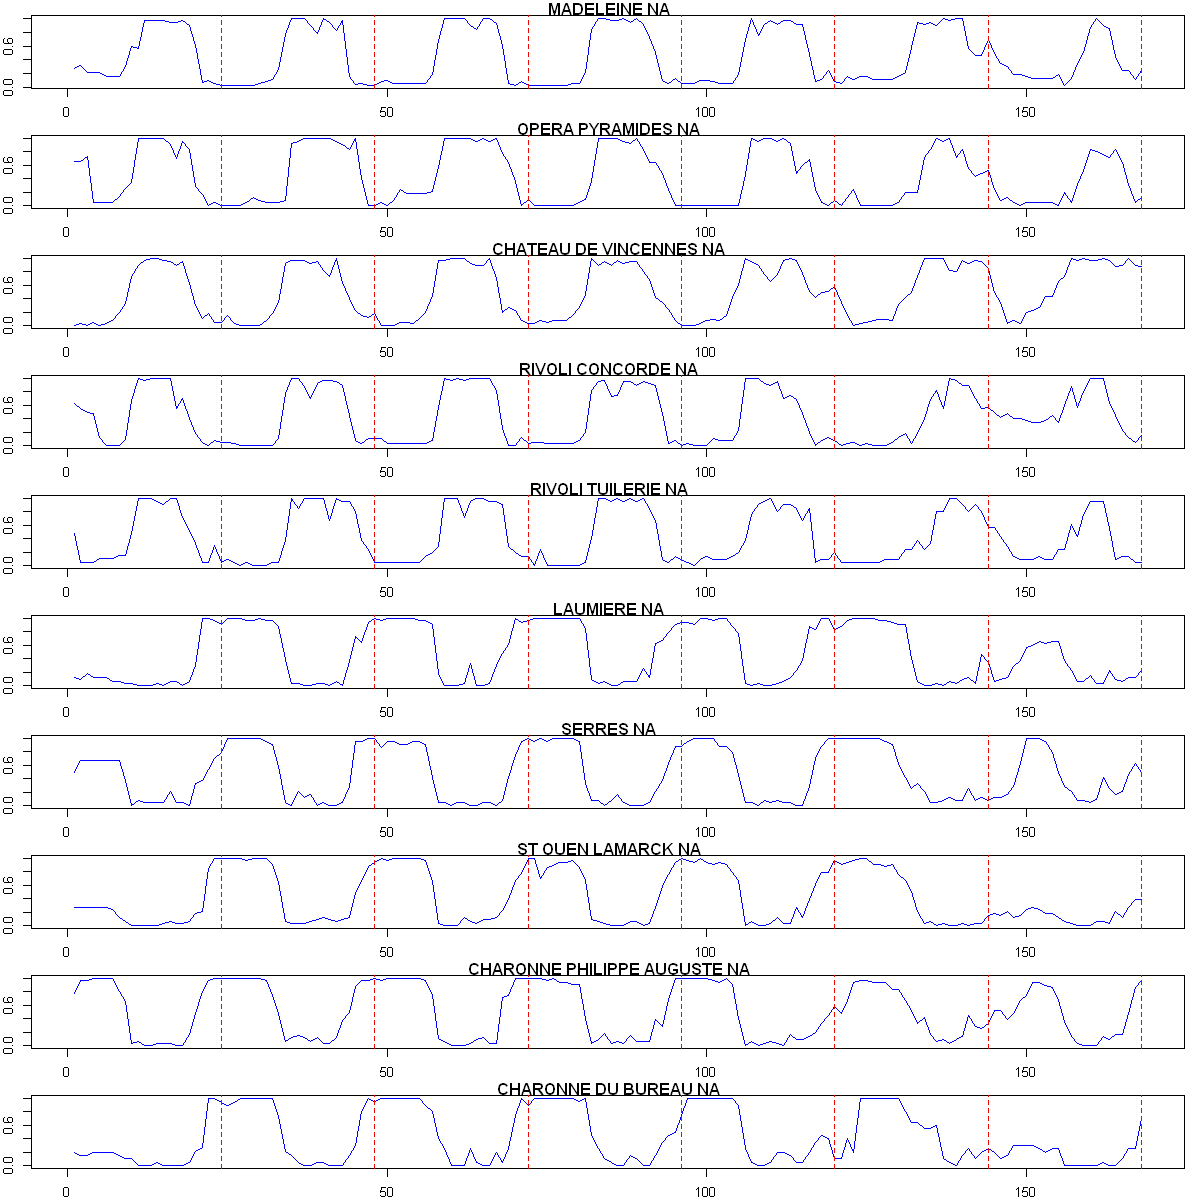

In [32]:
b=c(max2,min2)
# Visualisation
par(mfrow = c(length(b), 1), mar = c(2, 2, 1, 1))

for (i in b) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

De manière analogue à l'analyse de la première composante, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la deuxième composante. 

* On remarque sur la première ligne de graphiques que les pics correspondant aux valeurs maximales des taux de chargements pour chaque station se trouvent aux milieux des journées, alors que les pics les plus bas se trouvent lors des changements de jours (changements de dates). 
* Sur la deuxième ligne de graphiques, les observations sont inversées : les pics maxima se trouvent aux changements des jours et les pics correspondant aux minima sont au milieu de chaque journée. 

On peut supposer ici que la deuxième composante porte de l'information sur les stations qui sont plus remplies le jour que la nuit, et inversement. Une valeur élevée pour la deuxième composante indique que les stations ont un taux de remplissage faible la nuit et élevé la journée. Inversement, une faible valeur pour la deuxième composante pourrait indiquer que les taux de remplissage des stations sont faibles la journée et élevés la nuit. Cette hypoyhèse pourrait être vérifier à l'aide d'une variable présentant la différence de chargement entre le jour et la nuit. Il faudrait alors étudier l'évolution et les corrélations de cette variable. 

### Composante principale 3

Nous réitérons l'analyse avec la troisème composante.

In [33]:
# On récupère les 5 valeurs min et max pour la troisième composante
max3 = order(-loading_pca$Dim3)[1:5] # on trie les indices dans l'ordre décroissant
min3= order(loading_pca$Dim3)[1:5]

cat("Indices des valeurs max:\n", max3, "\n---------\n")
cat("Indices des valeurs min:\n", min3, "\n")

Indices des valeurs max:
 751 1036 424 14 250 
---------
Indices des valeurs min:
 1128 660 134 702 776 


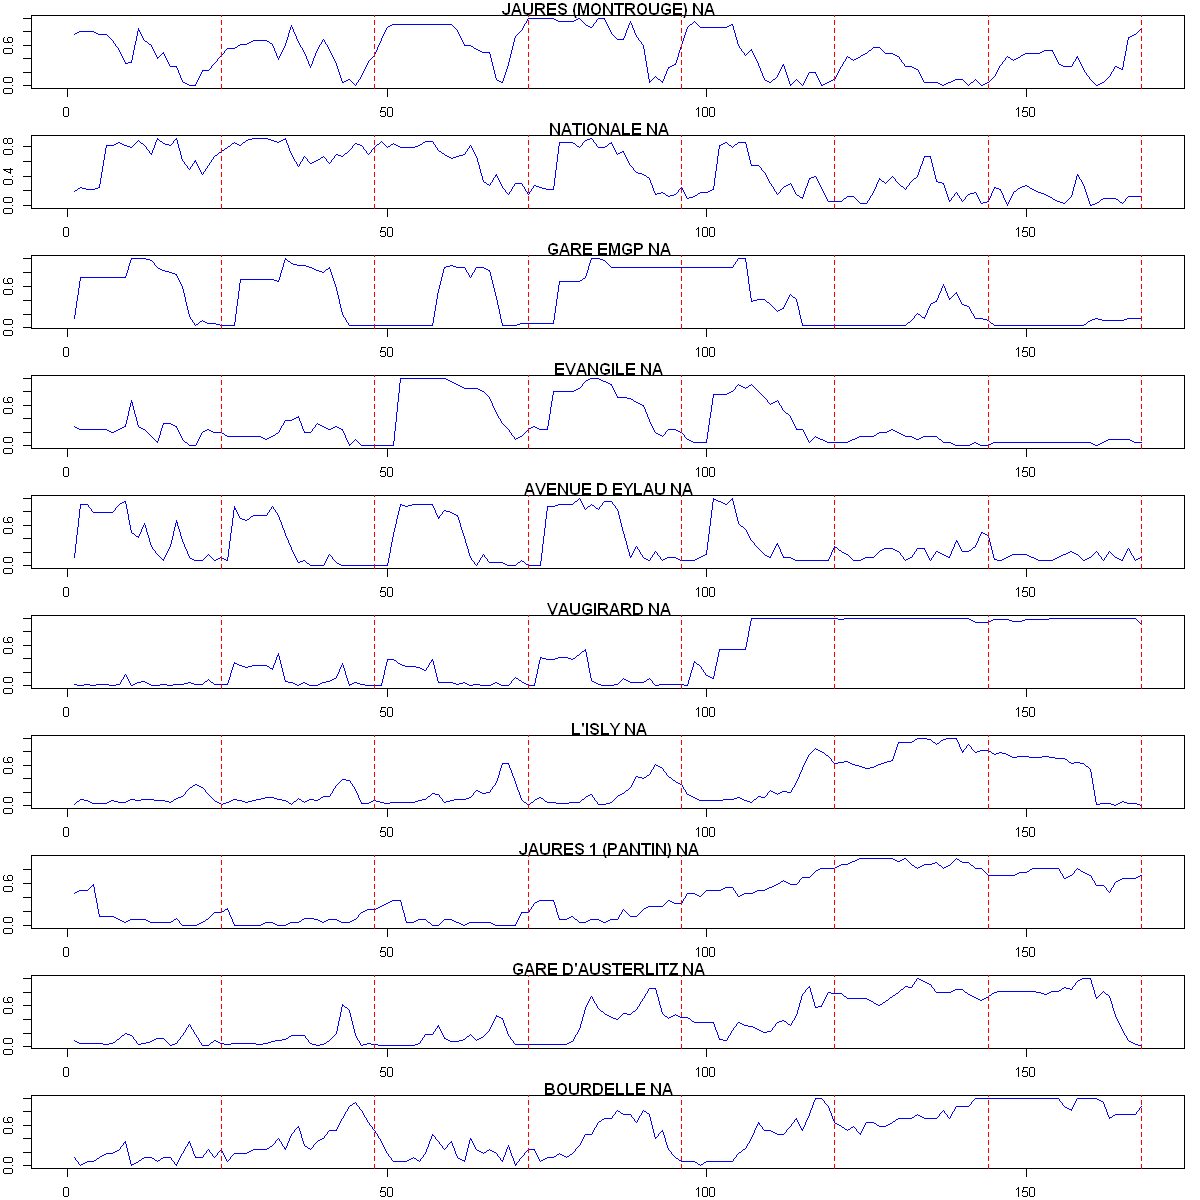

In [34]:
c=c(max3,min3)
# Visualisation
par(mfrow = c(length(c), 1), mar = c(2, 2, 1, 1))

for (i in c) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

Toujours dans la même démarche de celle de l'analyse des deux premières composantes, nous représentons ici l'évolution des taux de chargements des stations correspondants aux 5 indices max et 5 indices min que nous avons récupéré pour la troisième composante. 
* Sur les 5 dernières lignes, on a représenté les stations correspondant aux indices des 5 valeurs les plus élevées pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible en semaine et élevé lors des week-ends. 
* Sur les 5 premières lignes, on a représenté les stations correspondant aux indices des 5 valeurs les plus faibles pour la dimension 3. On observe que le taux de chargement des stations sur cette ligne est globalement moyen à faible durant les week-ends et élevé en semaines. 

On peut faire la supposition que la troisème composante représente l'alternance entre jours travaillés et week-ends. Une valeur élevée pour la troisème dimension pourrait indiquer que les stations sont assez peu chargées en semaine et pleines durant les week-ends. Inversement, une faible valeur pour la dimension 3 pourrait signifier que les stations présentent de la disponibilité en semaine et sont plus sollicitées lors des week-ends. On pourrait étudier la véracité de cette hypothèse en créant une nouvelle variable et en procédant à une étude, comme présenté pour l'hypothèse sur la deuxième composante. function

### Composante principale 4

Nous réitérons l'analyse avec la quatrième composante.

In [35]:
# On récupère les 5 valeurs min et max pour la quatrième composante
max4 = order(-loading_pca$Dim4)[1:5] # on trie les indices dans l'ordre décroissant
min4= order(loading_pca$Dim4)[1:5]

cat("Indices des valeurs max:\n", max4, "\n---------\n")
cat("Indices des valeurs min:\n", min4, "\n")

Indices des valeurs max:
 435 1128 417 1098 845 
---------
Indices des valeurs min:
 670 207 223 185 211 


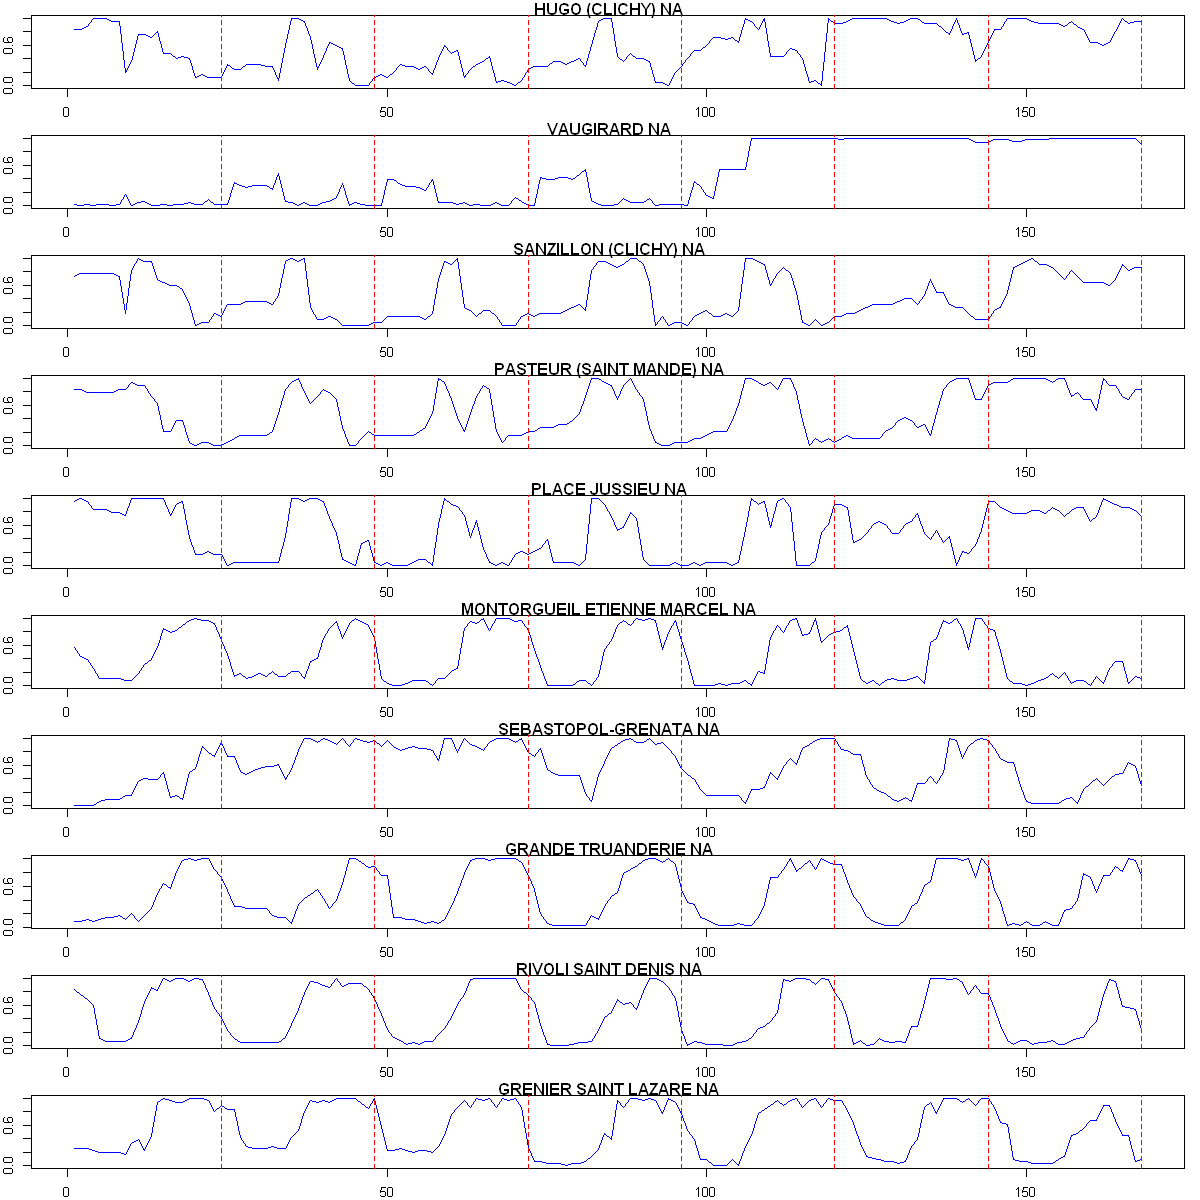

In [36]:
d=c(max4,min4)
# Visualisation
par(mfrow = c(length(b), 1), mar = c(2, 2, 1, 1))

for (i in d) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

In [37]:
# On va étudier les noms des stations en altitude, c'est-à-dire où la valeur dans la colonne 'bonus' vaut 1

bonus_stations = coord[coord$bonus == 1, ]
nom_station_recherche = 'VAUGIRARD'

# Remplacez 'nom_colonne' par le nom réel de la colonne qui contient les noms des stations dans votre dataframe
est_present = nom_station_recherche %in% bonus_stations$bonus

head(bonus_stations)


,longitude,latitude,bonus,names,hill
,<dbl>,<dbl>,<dbl>,<chr>,<fct>
20026,2.400977,48.86793,1,PELLEPORT,Hill
15044,2.296008,48.83027,1,J DUPRE,Hill
19121,2.392961,48.87552,1,BELLEVILLE PRE SAINT GERVAIS,Hill
19101,2.382592,48.87507,1,SIMON BOLIVAR,Hill
31009,2.432975,48.86881,1,DE GAULLE (MONTREUIL),Hill
14034,2.319392,48.83617,1,RUE DE L OUEST CHATEAU,Hill


Interprétation : 

Nous avons cherché si toutes les stations présentes dans une même ligne du graphique étaient des stations en altitude. Cependant, les stations de la première colonne du graphique se situent en plaine. Cette hypothèse n'est pas possible. De plus, nous avons déjà émis des hypothèses sur le taux de chargement moyen, l'alternance entre le jour et la nuit et l'alternance entre jours travaillés et week-ends. Puisque la quatrième composante principale ne correspond pas forcément au fait qu'une station se trouve ou non en altitude, nous avons étudiés les significations principales possibles des composantes principales. Pour les dimensions supérieures ou égales à 4, il n'est pas forcément possible de trouver une signification correspondant à une caractéristique explicite sur nos données. 

Autre hypothèse possible pour la composante 4 (mais assez peu visible) : la présence de beaucoup de vélos en fin de journée ou pas ? A tester avec des corrélations.En effet, sur la première ligne du graphique, on remarque des pics de taux de chargement important en fin de journée, c'est à dire, proche du trait de séparation entre les jours de la semaine. Sur la deuxième ligne du graphique, ces mêmes pics sont visibles en milieu de journée, c'est à dire, entre deux traits de séparations entre les jours, même si leur intensité peut être plus faible. Pour vérifier cette hypothèse, nous pouvons créer une variable représentant le taux de chargement moyen en fin de journée et une autre en milieu de journée, puis étudier la corrélation avec la dimension 4.peu

### Composante principale 5

In [38]:
# On récupère les 5 valeurs min et max pour la cinquième composante
max5 = order(-loading_pca$Dim5)[1:5] # on trie les indices dans l'ordre décroissant
min5= order(loading_pca$Dim5)[1:5]

cat("Indices des valeurs max:\n", max5, "\n---------\n")
cat("Indices des valeurs min:\n", min5, "\n")

Indices des valeurs max:
 350 431 496 781 566 
---------
Indices des valeurs min:
 1056 296 10 426 822 


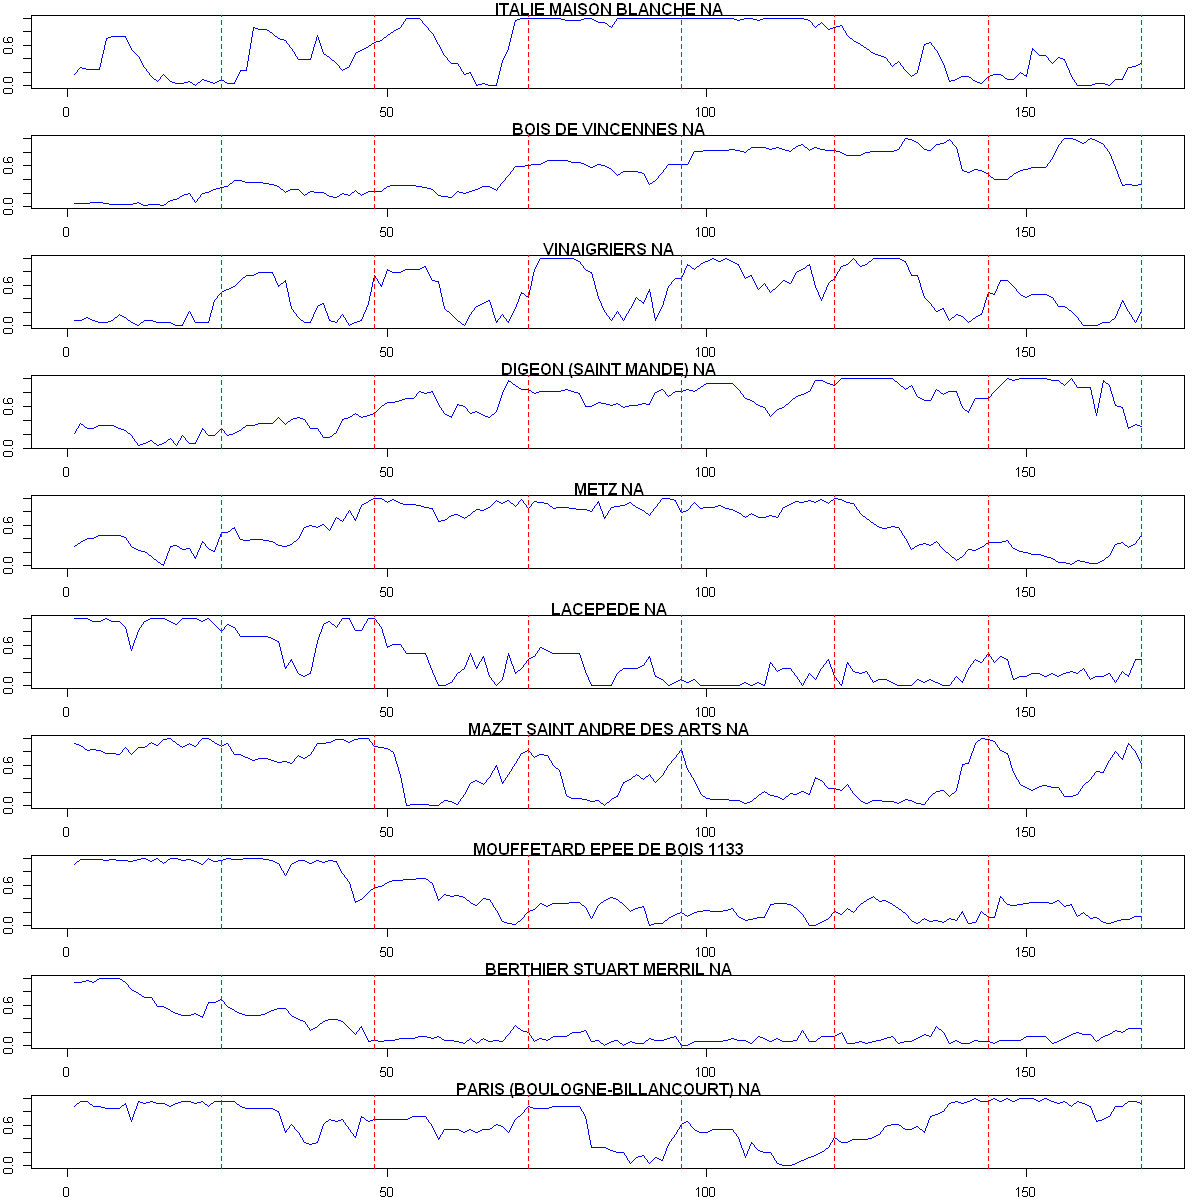

In [39]:
e=c(max5,min5)
# Visualisation
par(mfrow = c(length(e), 1), mar = c(2, 2, 1, 1))

for (i in e) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation : 

Sur les 5 derniers graphiques, on remarque que le taux de chargement moyen des stations est plus important en début de semain qu'en fin de semaine,particulièrement les lundis et mardis. A l'inverse, sur les 5 premiers graphiques, les stations sont beaucoup moins chargées, voir vides sur ces mêmes jours. En fin de semaine, on remarque que les 5 dernières stations sont beaucoup moins remplies (particulièrement du mercredi au vendredi). A l'inverse, les 5 premières stations présente un taux de chargement moyen plus élevé sur ces mêmes jours. On peut donc émettre l'hypothèse que la 5ème composante représente l'alternance entre lundi/mardi et mercredi/jeudi/vendredi. 

Il se pourrait que du personnel de gestion des Velib vide certaines stations en cours de semaine et transporte les vélos vers des stations où l'affluence est plus importante enfin de semaine. 

Pour confirmer cette hypothèse, nous allons créer une variable représentant le taux de chargement moyen sur lundi/mardi et une autre sur mercredi/jeudi/vendredi et étudier la corrélation avec la 5ème composante. 

### Composante principale 6

In [40]:
# On récupère les 5 valeurs min et max pour la sixième composante

max6 = order(-loading_pca$Dim6)[1:5] # on trie les indices dans l'ordre décroissant
min6= order(loading_pca$Dim6)[1:5]

cat("Indices des valeurs max:\n", max6, "\n---------\n")
cat("Indices des valeurs min:\n", min6, "\n")

Indices des valeurs max:
 41 1041 728 873 904 
---------
Indices des valeurs min:
 338 1134 1158 1188 567 


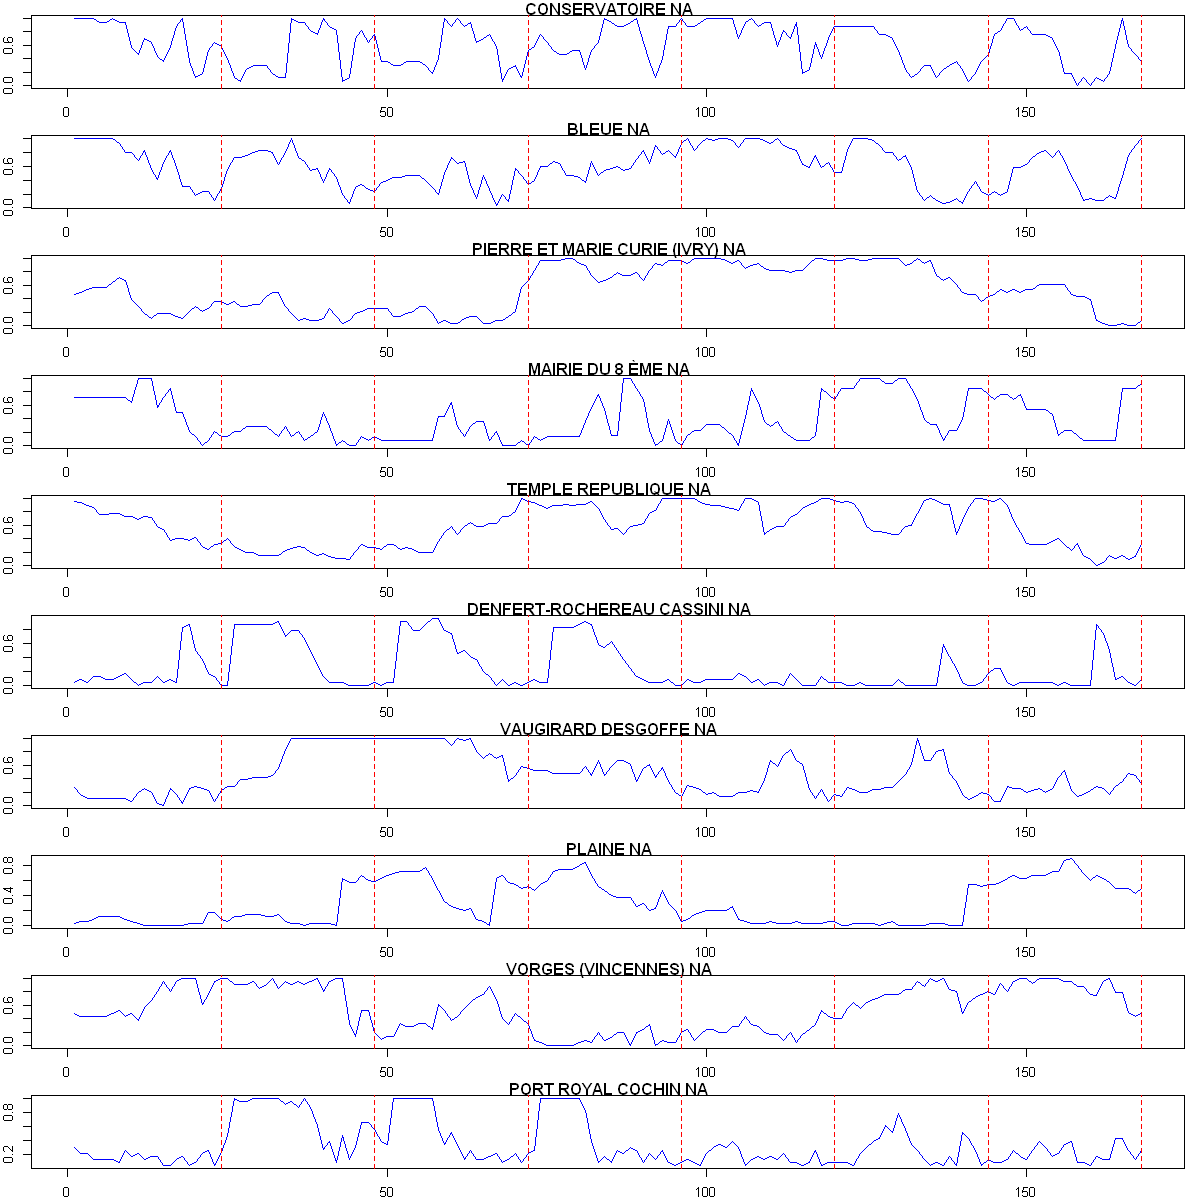

In [41]:
f=c(max6,min6)
# Visualisation
par(mfrow = c(length(f), 1), mar = c(2, 2, 1, 1))

for (i in f) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation :

Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.


### Composante principale 7

In [42]:
# On récupère les 5 valeurs min et max pour la septième composante

max7 = order(-loading_pca$Dim7)[1:5] # on trie les indices dans l'ordre décroissant
min7= order(loading_pca$Dim7)[1:5]

cat("Indices des valeurs max:\n", max7, "\n---------\n")
cat("Indices des valeurs min:\n", min7, "\n")

Indices des valeurs max:
 834 214 18 439 807 
---------
Indices des valeurs min:
 477 552 904 416 886 


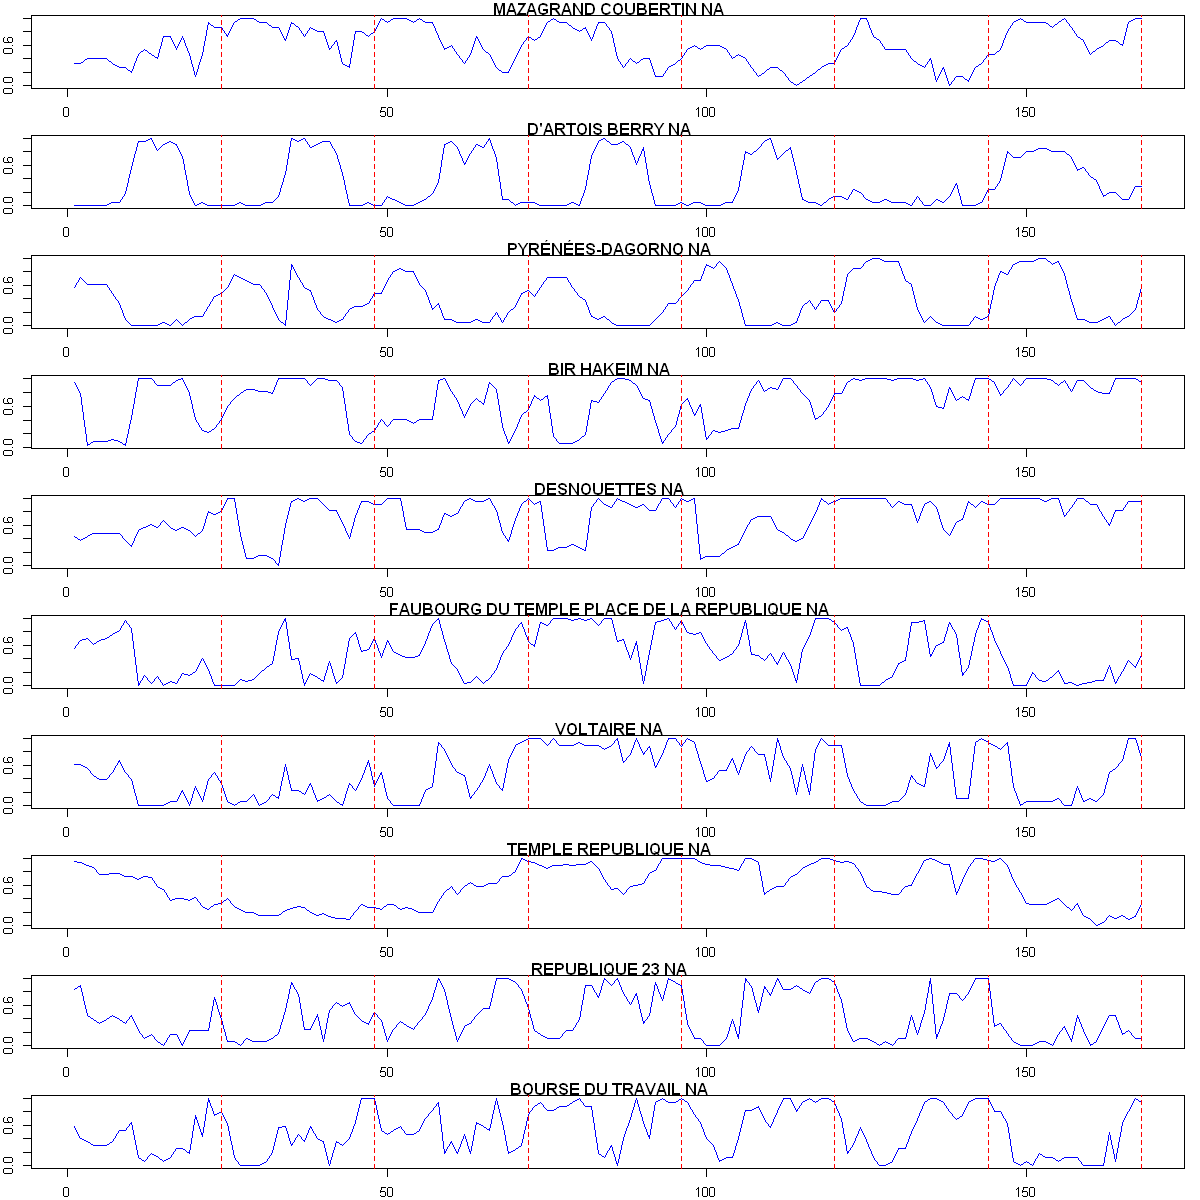

In [43]:
g=c(max7,min7)
# Visualisation
par(mfrow = c(length(g), 1), mar = c(2, 2, 1, 1))

for (i in g) {
  dfi <- df[i, ]
  plot(loading[i, ], type = "l", col= "blue", main = paste(coord$names[i], a[i]))

# Ajout lignes verticales toutes les 24 heures
  abline(v = seq(24, length(loading[i, ]), by = 24), col = "red", lty = 2)
}
# Réinitialiser la disposition des graphiques à une seule colonne avec des marges normales
par(mfrow = c(1, 1), mar = c(5, 4, 4, 2) + 0.1)

Interprétation :

On peut faire la même analyse que pour la sixième composante principale. Il n'y a pas de tendance remarquable qui se dégage clairement comme c'était le cas pour les composantes principales. Il pourrait être judicieux de tester si cette composante pourrait représenter l'altitude. Une valeur élevée pourrait signifier une caractéristique vis-à-vis de l'altitude (station en altitude, ou l'inverse). Nous vérifierons cette hypothèse ultérieurement.


### Test d'un éventuel lien avec l'altitude

Dans cette sous-partie nous allons tester un éventuel lien avec les dimensions de notre ACP et le caractère 'Bonus' lié à l'altitude.

In [44]:
# Sélection des lignes correspondant aux stations en altitude
bonus_stations_indices = which(coord$bonus == 1) #on récupère les indices des stations en altitude
bonus_stations_PCA = loading_pca[bonus_stations_indices, ]

# Affichage des valeurs moyennes des stations en altitude sur chaque composante
print("Valeur moyenne des stations en altitude sur chaque composante :")
print(colMeans(bonus_stations_PCA))


[1] "Valeur moyenne des stations en altitude sur chaque composante :"
       Dim1        Dim2        Dim3        Dim4        Dim5        Dim6 
-2.77300585 -1.17121982  0.15532718 -0.02558979 -0.10274866 -0.17200718 
       Dim7 
-0.25288795 


In [45]:
# On va étudier les noms des stations en altitude, c'est à dire où la valeur dans la colonne 'Bonus' vaut 1
bonus_stations <- coord[coord$bonus == 1, ]
indice_bonus <- which(coord$bonus == 1)

# Initialisation de la variable bonus_stations_PCA
bonus_stations_PCA <- NULL

# On récupère ensuite les valeurs de l'ACP pour les différentes composantes, et calculer les valeurs moyennes pour essayer de voir le lien avec l'altitude
for (i in indice_bonus) {
  bonus_stations_PCA <- rbind(bonus_stations_PCA, loading_pca[i, ])
}

# Affichage des valeurs moyennes des stations en altitude sur chaque composante
print("Valeur moyenne des stations en altitude sur chaque composante :")
print(colMeans(bonus_stations_PCA))


[1] "Valeur moyenne des stations en altitude sur chaque composante :"
       Dim1        Dim2        Dim3        Dim4        Dim5        Dim6 
-2.77300585 -1.17121982  0.15532718 -0.02558979 -0.10274866 -0.17200718 
       Dim7 
-0.25288795 




Interprétation :

Nous n'observons pas vraiment de lien avec les stations en altitude. Nous n'avons pas de résultat suffisant pour que ce soit une hypothèse importante. Il est possible que les zones en hauteurs soient moins peuplées et regroupent plus des quartiers de bureau/travail.


## 2.5 - Vérification des hypothèses

### 2.5.1 - Introduction de la méthode

Dans cette partie, nous allons introduire de nouvelles variables découlant des hypothèses sur la signification de nos composantes principales. L'objectif est de tester les corrélations entre les composantes retenues et les nouvelles variables introduites. Ainsi, nous pourrons valider, ou non, nos hypothèses. Pour ce faire, nous allons définir : 
* load_mean : Variable représentant le taux de chargement moyen pour l'hypothèse 1
* diff_jn : Variable représentant la différence de chargement moyen entre le jour et la nuit pour l'hypoyhèse 2
* diff_tw : Variable représentant la différence de chargement moyen entre les jours travaillés et les week-ends pour l'hypoyhèse 3
* diff_ms : Variable représentant la différence de chargement moyen entre le matin et l'après-midi et fin de journée pour l'hypothèse 4 
* diff_df : Variable représentant la différence de chargement moyen entre le début et la fin de la semaine pour l'hypothèse 5

Pour la variable jour/nuit, nous avons utilisé le graphique représentant la superposition de boxplots montrant l'évolution du chargement médian au cours de la semaine. On a étudié les temps marquant une rupture entre les moments du jour et de la nuit. Cette rupture est visible avec des pics plus bas observés sur les troisièmes quantiles des boxplots, et confirmée par les valeurs des médianes. Ainsi, on peut attribuer plage de jour entre 10h et 17h (ce qui cohérent avec les heures de bureau) et une plage de nuit entre 22h à 7h. Entre 18h et 22h, le chargement des stations est plus bas car la mobilité est importante sur ce créneau. Pour la variable matin/soir, nous avons observé de manière similaire un intervalle 6h-11h pour le matin, et 14h-24h pour le soir. Enfin pour la dernière hypothèse sur variable 5 : lundi-mardi contre mercredi-jeudi-vendredi.

In [46]:
# Définition des nouvelles variables
# ---------------------------------

# Chargement moyen 
# ---------------------------------
load_mean <- rowMeans(loading)

# Différence de chargement moyen entre le jour et la nuit
# ---------------------------------
# nuit : 22h-7h  (ou 21h-7h)  jour : 10h-17h

data_jour <- c()
for (i in 0:6) {
  data_jour <- c(data_jour, (10:17) + 24 * i)
}

data_nuit <- c()
for (i in 0:6) {
  data_nuit <- c(data_nuit, c(0:7, 22, 23) + 24 * i)
}

# Affichage pour vérification
#print(data_jour) OK!
#print(data_nuit) OK! 

In [47]:
#autre version 
# Calcul de la différence de chargement moyen entre le jour et la nuit
diff_jn <- rowMeans(loading[, data_jour]) - rowMeans(loading[, data_nuit])
head(diff_jn)

EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
         -0.33782443          -0.67843640           0.03537069 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
          0.52641600           0.19469870          -0.24785329

In [48]:
# Différence de chargement moyen entre les jours travaillés et les week-ends
# ---------------------------------
# weekend : vendredi 20h -> dimanche 20h  semaine : lundi 10h -> vendredi 17h
data_weekend= c((4*24+20):(6*24+21))
data_week =c(10:(4*24+18))

# Supprimer le dernier élément de data_weekend
data_weekend <- head(data_weekend, -1)

# Supprimer le dernier élément de data_week
data_week <- head(data_week, -1)

#print(data_weekend)
#print(data_week)

diff_tw <- rowMeans(loading[, data_week]) - rowMeans(loading[, data_weekend])
head(diff_tw) # je n'ai pas la même chose que vous


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
          0.05806167          -0.06786847          -0.05643193 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
         -0.02381017           0.18961745          -0.10899178

In [49]:
# Définition des plages horaires pour le matin et la fin de journée
# ---------------------------------
# matin : 6h-11h   fin journée : 14h-00h

# Matin : 6h-11h
data_matin <- c(sapply(0:6, function(i) (6 + 24*i):(11 + 24*i)))

data_soir <- c()  # initialisation du vecteur vide

for (i in 0:6) {
  data_soir = append(data_soir, (14 + 24*i):(23 + 24*i))
  data_soir = append(data_soir, 24*(i+1))
}
# Supprimer le dernier élément de data_weekend
data_matin <- head(data_matin, -1)

# Supprimer le dernier élément de data_week
data_soir <- head(data_soir, -1)   
                      
#print(data_matin) OK!
print(data_soir) #problème

 [1]  14  15  16  17  18  19  20  21  22  23  24  38  39  40  41  42  43  44  45
[20]  46  47  48  62  63  64  65  66  67  68  69  70  71  72  86  87  88  89  90
[39]  91  92  93  94  95  96 110 111 112 113 114 115 116 117 118 119 120 134 135
[58] 136 137 138 139 140 141 142 143 144 158 159 160 161 162 163 164 165 166 167


In [50]:
# Calcul de la différence de chargement moyen entre le matin et la fin de journée
diff_ms <- rowMeans(loading[, data_matin]) - rowMeans(loading[, data_soir])
head(diff_ms)


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
          0.03654785           0.23657890          -0.20877305 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
          0.03660739          -0.19103375           0.02687718

In [51]:
# Différence de chargement moyen entre début et fin de semaine
# ---------------------------------
# début : lundi et mardi    fin : mercredi-vendredi

data_debut <- c(0:47)
data_fin <- c(48:119)
#print(data_debut) OK! 
#print(data_fin) OK!
diff_df <- rowMeans(loading[, data_debut]) - rowMeans(loading[, data_fin])

# Affichage pour vérification
head(diff_df)


EURYALE DEHAYNIN            LEMERCIER      MEZIERES RENNES 
        -0.179768375         -0.086930825         -0.035684249 
              FARMAN     QUAI DE LA RAPEE  CHOISY POINT D'IVRY 
         0.256467934          0.142351678          0.004973319

Une fois nos variables définies, nous allons afficher, pour chaque variable introduite, la correspondance avec la composante principale associée. Nous espérons pouvoir observer des corrélations. Cela permettrait la validation, ou dans le cas contraire le rejet, de nos hypothèses établies dans la partie précédente.

Avant de calculer les corrélations (plus intéressantes pour prouver les résultats), nous allons afficher nos 3 premières composantes en fonction de la variable créée correspondante, pour observer une éventuelle corrélation à travers des grapiques.

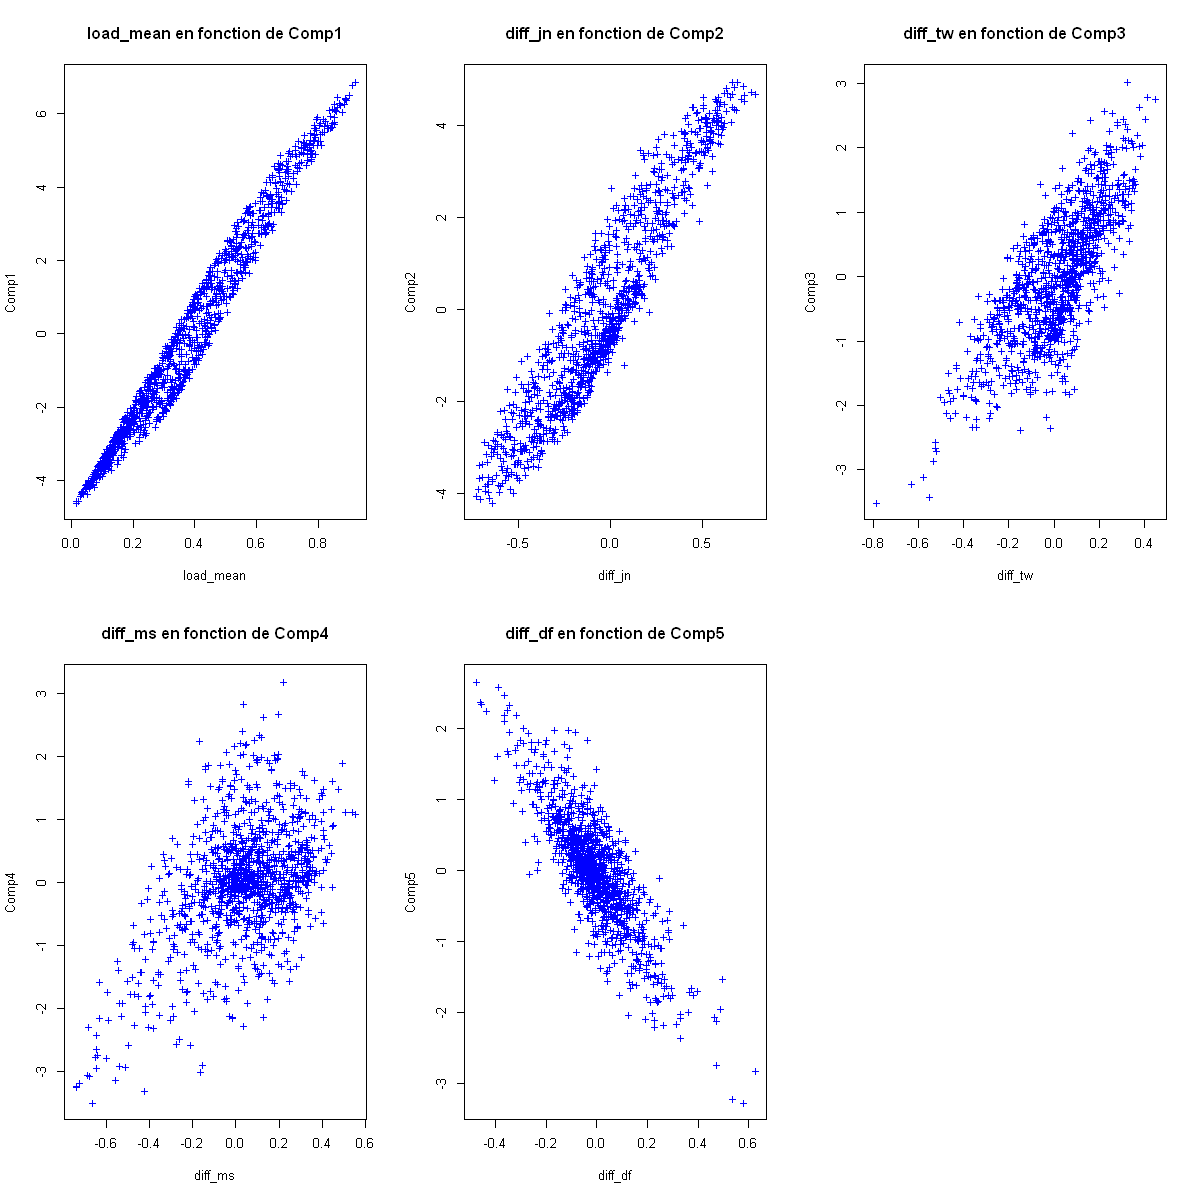

In [52]:
par(mfrow=c(2,3))

plot(load_mean, loading_pca$Dim1, pch='+', main="load_mean en fonction de Comp1", xlab="load_mean", ylab="Comp1", col="blue")
plot(diff_jn, loading_pca$Dim2, pch='+', main="diff_jn en fonction de Comp2", xlab="diff_jn", ylab="Comp2", col="blue")
plot(diff_tw, loading_pca$Dim3, pch='+', main="diff_tw en fonction de Comp3", xlab="diff_tw", ylab="Comp3", col="blue")
plot(diff_ms, loading_pca$Dim4, pch='+', main="diff_ms en fonction de Comp4", xlab="diff_ms", ylab="Comp4", col="blue")
plot(diff_df, loading_pca$Dim5, pch='+', main="diff_df en fonction de Comp5", xlab="diff_df", ylab="Comp5", col="blue")


Interprétation : 

Pour chacune des 3 premières variables inroduites, on observe une corrélation forte avec la dimension de l'ACP associée, qui se traduit par une tendance linéaire. Cette tendance est évidente pour les 2 premières composantes prinipales et est très marquée pour la troisième composante. De plus, plus la tendance linéaire est fine, plus la corrélation ets importante : c'est le cas pour les deux premières dimensions. On en déduit que chaque variable introduite est fortement corrélée avec la dimension associée. Nos hypothèses précédentes sont validées.

Pour les variables associées aux dimensions 4 et 5, les graphiquent ne montre pas vraiment de tendance linéaire idéale, mais on la devine quand même. La composante 4 reste la plus "brouillonne". 

### 2.5.2 - Etude des corrélations avec les nouvelles variables

On va maintenant calculer les corrélations et les représenter sous forme graphique. On va d'abord étudier les variables nouvellement crées, puis les jours et les heures de la semaine, pour vérifier les plages horaires choisies.

In [53]:
# On crée le dataframe data1
data1 = data.frame(load_mean, diff_jn, diff_tw, diff_ms, diff_df,
                    lag(loading_pca$Dim1), lag(loading_pca$Dim2),
                    lag(loading_pca$Dim3), lag(loading_pca$Dim4),
                    lag(loading_pca$Dim5))

# On renomme les colonnes
names(data1) = c("Load mean", "Diff jour-nuit", "Diff semaine-we", 
                  "Diff matin-soir", "Diff debut-fin semaine", 
                  "Dim1", "Dim2", "Dim3", "Dim4", "Dim5")
head(data1)

# On construit une matrice de corrélation avec des valeurs 
cormat1 = cor(data1)
round(cormat1, 2)


,Load mean,Diff jour-nuit,Diff semaine-we,Diff matin-soir,Diff debut-fin semaine,Dim1,Dim2,Dim3,Dim4,Dim5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2778601,-0.33782443,0.05806167,0.03654785,-0.179768375,-0.898351093,-2.323003,-0.4586635,-1.4785445,0.8986745
2,0.5062229,-0.67843640,-0.06786847,0.23657890,-0.086930825,2.549737302,-3.931784,-0.2423450,-1.0733374,0.4617664
3,0.4667578,0.03537069,-0.05643193,-0.20877305,-0.035684249,1.051733801,1.056763,-0.8571908,-0.9392326,0.9818443
4,0.4346044,0.52641600,-0.02381017,0.03660739,0.256467934,-0.083202891,3.523981,0.5852023,2.0534663,-1.5829101
5,0.5298986,0.19469870,0.18961745,-0.19103375,0.142351678,1.381803464,2.717041,0.6396883,-0.9403843,-0.5997428
6,0.3462484,-0.24785329,-0.10899178,0.02687718,0.004973319,-0.005452857,-1.795863,-0.7691141,-0.8822126,0.8534171


,Load mean,Diff jour-nuit,Diff semaine-we,Diff matin-soir,Diff debut-fin semaine,Dim1,Dim2,Dim3,Dim4,Dim5
Load mean,1.00,-0.14,-0.34,-0.12,0.04,0.99,0.16,0.06,0.00,0.01
Diff jour-nuit,-0.14,1.00,0.26,-0.60,0.23,-0.30,0.93,0.05,0.14,0.10
Diff semaine-we,-0.34,0.26,1.00,-0.02,0.05,-0.42,0.17,0.77,-0.44,-0.03
Diff matin-soir,-0.12,-0.60,-0.02,1.00,-0.25,-0.03,-0.75,0.42,0.48,0.05
Diff debut-fin semaine,0.04,0.23,0.05,-0.25,1.00,0.00,0.31,-0.02,0.02,-0.83
Dim1,0.99,-0.30,-0.42,-0.03,0.00,1.00,0.00,0.00,0.00,0.00
Dim2,0.16,0.93,0.17,-0.75,0.31,0.00,1.00,0.00,0.00,0.00
Dim3,0.06,0.05,0.77,0.42,-0.02,0.00,0.00,1.00,0.00,0.00
Dim4,0.00,0.14,-0.44,0.48,0.02,0.00,0.00,0.00,1.00,0.00
Dim5,0.01,0.10,-0.03,0.05,-0.83,0.00,0.00,0.00,0.00,1.00


On observe des corrélations assez importantes en accord avec ce qui a été vu précédemment. Il y a une corrélation très élevée entre 'Load mean' et la dimension 1 avec une valeur de 0.99. De la même manière, il y a une corrélation très prononcée entre 'Diff jour-nuit' et la deuxième dimension, avec une valeur de 0.93. On observe également une corrélation négative assez importante entre 'Diff semaine-we' et la troisième composante principale, qui confirme notre hypothèse. <span style="color:red">
PROBLEME J'AI UNE VALEUR POSITIVE CAR PAS MEME VECTEUR PROPRE. ON SUPPRIME LA PHRASE OU JE PRENDS UNE AUTRE DIMENSION ? </span>

On remarque aus des corrélations qui valent 0 entre les différentes composantes. Ce résultat est cohérent avec la construction des composnates qui sont orthogonales entre elles.


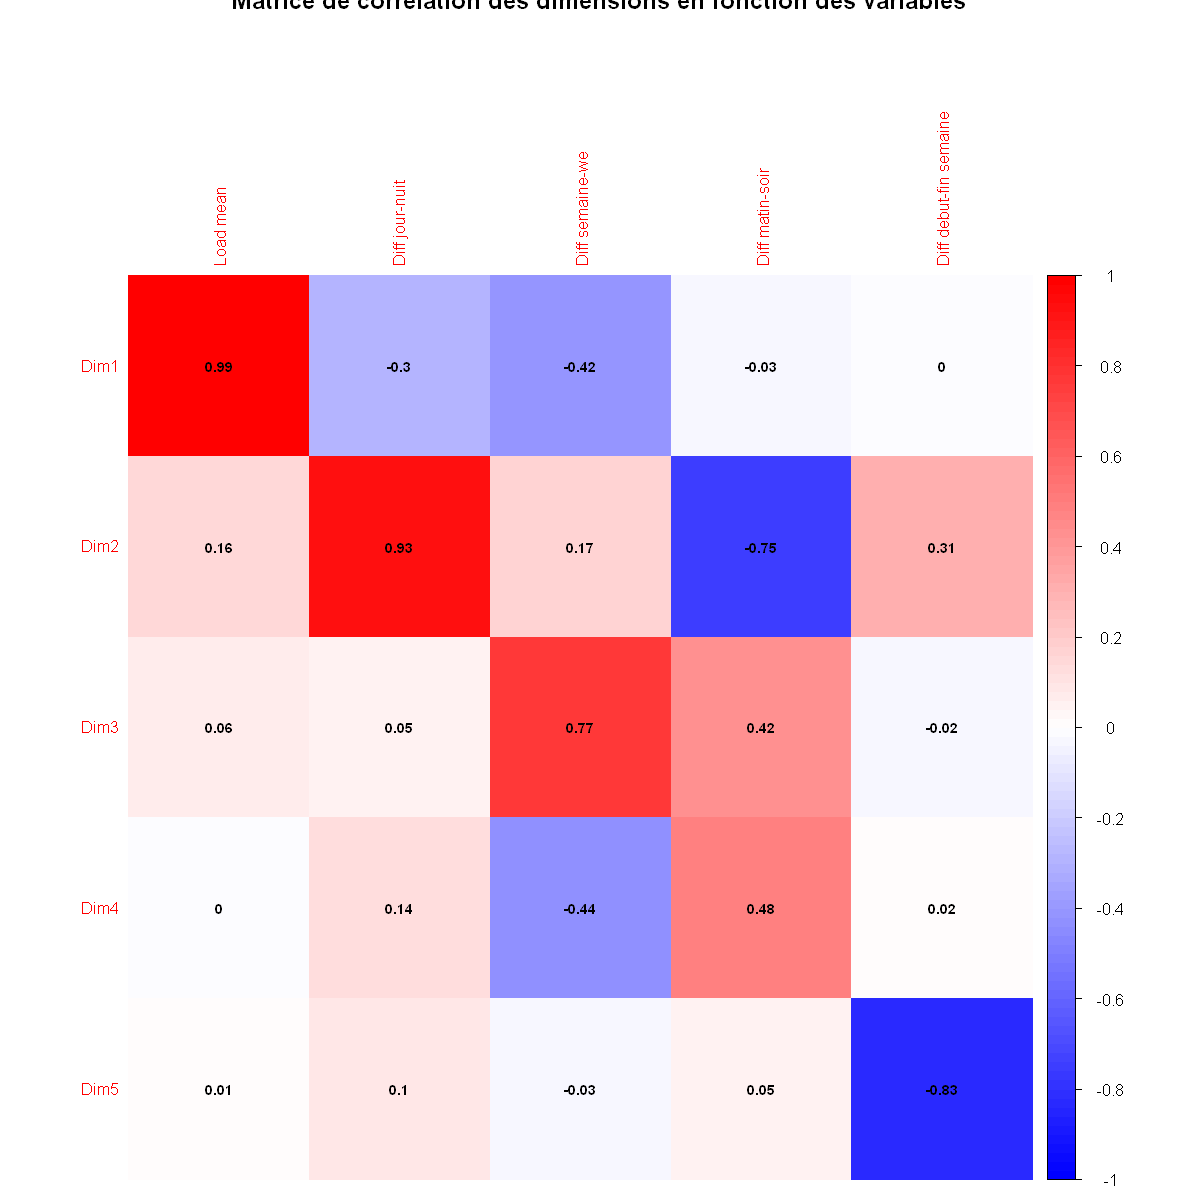

In [54]:
library(corrplot)

# Sélection des colonnes pertinentes
selected_columns <- c("Load mean", "Diff jour-nuit", "Diff semaine-we", 
                      "Diff matin-soir", "Diff debut-fin semaine",
                      "Dim1", "Dim2", "Dim3", "Dim4", "Dim5")

# Création d'un sous-dataframe avec les colonnes sélectionnées
data_subset <- data1[, selected_columns]

# Calcul de la matrice de corrélation
cor_matrix <- cor(data_subset)

# Affichage de la matrice de corrélation en couleur
corrplot(cor_matrix[6:10, 1:5], method = "color", 
         col = colorRampPalette(c("blue", "white", "red"))(100),
         addCoef.col = "black", number.cex = 0.7, tl.cex = 0.8,
         title = "Matrice de corrélation des dimensions en fonction des variables")

Interprétation : 
- Excellente corrélations pour dim 1 et 2 avec les variables, très élevées également pour dim 3 et 5, un peu plus faible pour dim 4 mais quand même significative. 
- Autres corrélations "élevées" : entre Dim 4 et diff semaine-weekend : peut-être un lien également entre la dim 4 et le chargement le weekend.
- Entre Diff mtin-soir et la dim 2 : logique, car la définition est assez proche de la répartition jour nuit


Les valeurs de corrélation vont de -1 à 1, où -1 indique une corrélation négative parfaite, 0 aucune corrélation et 1 une corrélation positive parfaite. Les couleurs allant du bleu au rouge indiquent la force et la direction de la corrélation (bleu pour les valeurs négatives et rouge pour les valeurs positives). Sur cette matrice, on observe que : 

- Load mean a une forte corrélation positive avec Dim1 (0.99), ce qui indique que cette dimension est principalement associée avec la moyenne de chargement des stations.
- De même, Diff jour-nuit est fortement corrélée avec Dim2 (0.95), ce qui suggère que cette dimension reflète les variations du taux de chargement entre le jour et la nuit.
- On voit que Diff semaine-we montre une forte corrélation négative avec Dim3 (-0.76), impliquant que cette dimension pourrait représenter la différence de chargement entre les jours de semaine et le weekend.
- Diff matin-soir est assez significativement corrélée négativement avec Dim2 (-0.65) et Dim4 (-0.57), ce qui laisse penser que ces dimensions pourraient être liées aux variations du taux de chargement entre le matin et le soir. Ce résultat est cohérent car on est très proche de l'alternance entre le jour et la nuit.
- Enfin, Diff début-fin semaine présente une forte corrélation positive avec Dim5 (0.84), ce qui nous laisse à penser que cette dimension pourrait capturer les variations entre le début et la fin de semaine.

Finalement, cette matrice confirme les observations sur le précédent graphique et permet la validation de nos hypothèses quant aux significations des composantes principales de l'ACP. Pour résumer, on a donc :

* Dim1 est fortement influencée par la moyenne de chargement des stations.
* Dim2 est principalement liée aux différences de chargement entre le jour et la nuit, et dans une moindre mesure, le matin et le soir.
* Dim3 est influencée négativement par la différence de chargement entre la semaine et le weekend.
* Dim4 semble avoir une relation négative plus modérée avec la variation matin-soir.
* Dim5 est principalement définie par la différence de chargement entre le début et la fin de semaine.
* <span style="color:red"> Revoir les interprétations si tout va bien sur les signes de ma matrice

### 2.5.3 - Etude des corrélations avec les heures et les jours de la semaine

In [55]:
loading_data = as.matrix(loading)
# Création du dataframe data2
data2 = data.frame(loading_pca$Dim1, loading_pca$Dim2, loading_pca$Dim3, loading_pca$Dim4, loading_pca$Dim5,
                    loading_pca$Dim6, loading_pca$Dim7)

# Renommer les colonnes
names(data2) = c("Dim1", "Dim2", "Dim3", "Dim4", "Dim5", "Dim6", "Dim7")

# Insérer les données d'heures et de jours
for (i in 1:168) {
  data2 =cbind(data2, loading_data[,i])
  names(data2)[ncol(data2)] <- as.character(i)
}

# Construction de la matrice de corrélation
cormat2 = cor(data2)
round(cormat2, 2)

,Dim1,Dim2,Dim3,Dim4,Dim5,Dim6,Dim7,1,2,3,⋯,159,160,161,162,163,164,165,166,167,168
Dim1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.74,0.73,0.70,⋯,0.71,0.65,0.59,0.58,0.62,0.67,0.72,0.75,0.76,0.77
Dim2,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,-0.06,⋯,0.29,0.36,0.43,0.44,0.41,0.32,0.21,0.12,0.06,-0.01
Dim3,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.05,0.12,0.19,⋯,-0.28,-0.30,-0.28,-0.27,-0.26,-0.22,-0.18,-0.15,-0.13,-0.10
Dim4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.05,0.07,0.09,⋯,0.26,0.23,0.16,0.13,0.12,0.12,0.14,0.12,0.14,0.18
Dim5,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.45,-0.47,-0.49,⋯,-0.06,-0.06,-0.08,-0.08,-0.11,-0.15,-0.17,-0.20,-0.21,-0.19
Dim6,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.20,0.22,0.23,⋯,-0.26,-0.27,-0.29,-0.26,-0.22,-0.16,-0.07,-0.02,0.03,0.05
Dim7,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.10,-0.15,-0.20,⋯,-0.06,-0.11,-0.14,-0.15,-0.18,-0.10,-0.06,0.00,0.03,0.07
1,0.74,0.07,0.05,0.05,-0.45,0.20,-0.10,1.00,0.94,0.88,⋯,0.51,0.48,0.44,0.44,0.48,0.55,0.61,0.64,0.66,0.67
2,0.73,0.00,0.12,0.07,-0.47,0.22,-0.15,0.94,1.00,0.94,⋯,0.47,0.44,0.40,0.39,0.44,0.50,0.56,0.60,0.63,0.64
3,0.70,-0.06,0.19,0.09,-0.49,0.23,-0.20,0.88,0.94,1.00,⋯,0.43,0.39,0.35,0.34,0.40,0.46,0.53,0.56,0.59,0.61


<span style="color:red">Pour moi c'est la même matrice que vous mais pas affiché pareil 

Interprétation :

Ce DataFrame n'est pas très lisible, nous décidons de représenter graphiquement chaque dimension au cours du temps. Sur le graphique ci-dessous, les lignes verticales oranges sont présentes toutes les 24 heures et marquent l'alternance entre les jours de la semaine.

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


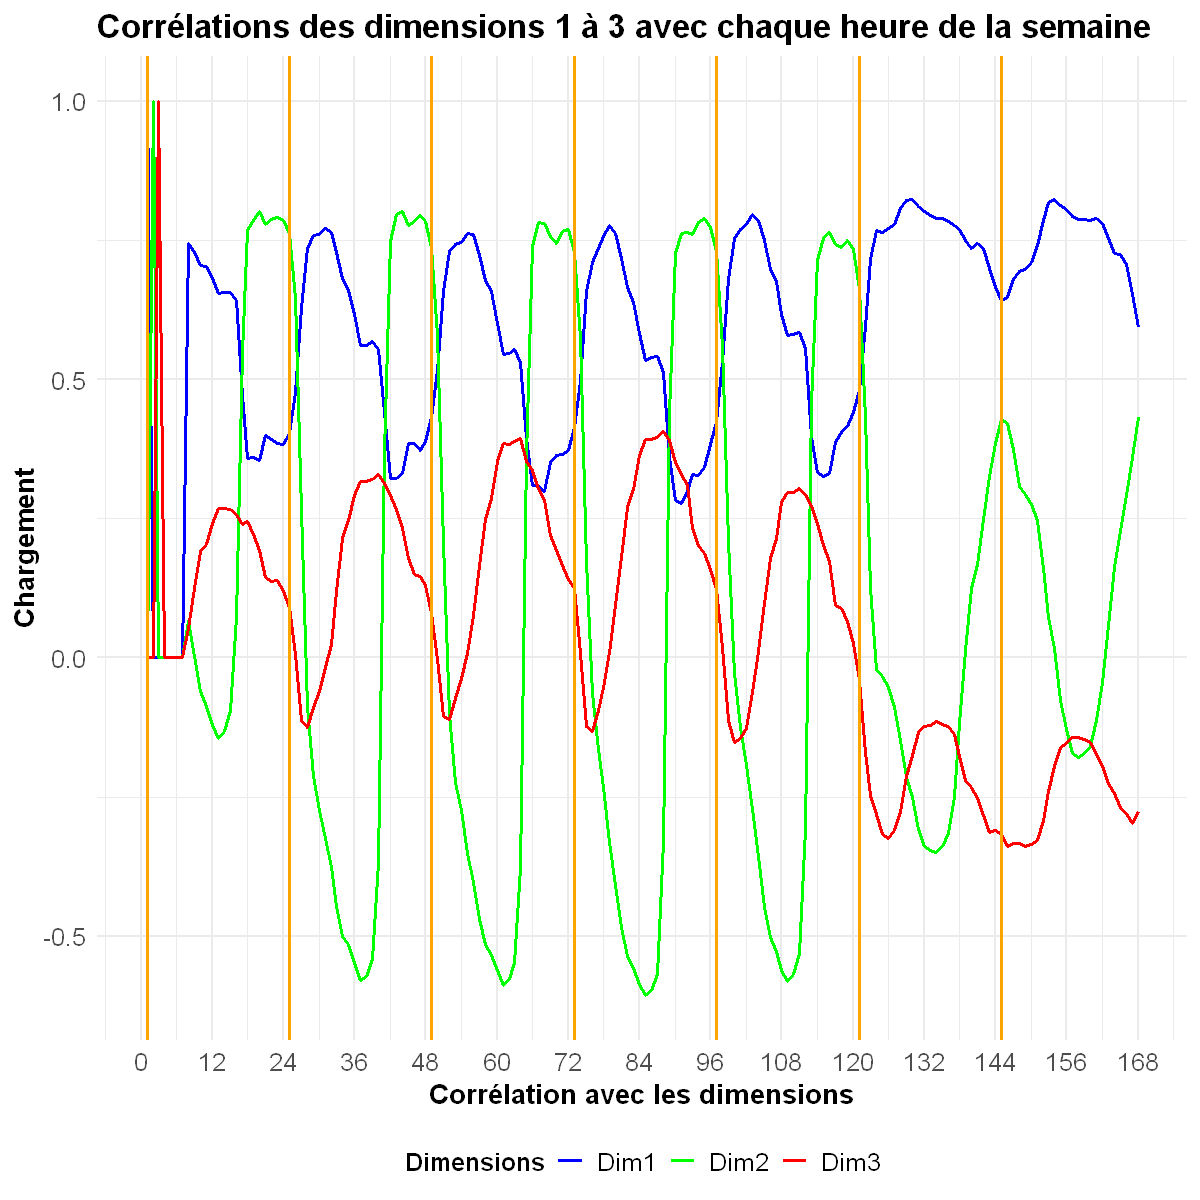

In [56]:
timeTick = 1 + 24*(0:6) 

library(ggplot2)

# Définir les dimensions à tracer
dims <- c("Dim1", "Dim2", "Dim3")

# Tracer les courbes pour chaque dimension
p <- ggplot() +
  geom_line(data = cormat2[1:168, dims], aes(x = 1:168, y = Dim1, color = "Dim1"), size = 1) +
  geom_line(data = cormat2[1:168, dims], aes(x = 1:168, y = Dim2, color = "Dim2"), size = 1) +
  geom_line(data = cormat2[1:168, dims], aes(x = 1:168, y = Dim3, color = "Dim3"), size = 1) +
  
  # Ajouter des lignes verticales pour les jours
  geom_vline(xintercept = timeTick, color = "Orange", size = 1) +
  
  # Personnalisation des axes et des titres
  labs(x = "Corrélation avec les dimensions", y = "Chargement",
       title = "Corrélations des dimensions 1 à 3 avec chaque heure de la semaine") +
  scale_x_continuous(breaks = seq(0, 168, by = 12), labels = seq(0, 168, by = 12)) +
  theme_minimal(base_size = 15) +
  
  # Légende
  scale_color_manual(values = c("Dim1" = "blue", "Dim2" = "green", "Dim3" = "red"),
                     labels = c("Dim1", "Dim2", "Dim3")) +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = "Dimensions")) +
  theme(legend.title = element_text(size = 15, face = "bold"),
        legend.text = element_text(size = 15)) +
  
  # Ajustement de la disposition
  theme(plot.title = element_text(size = 20, face = "bold")) +
  theme(axis.text = element_text(size = 15),
        axis.title = element_text(size = 16, face = "bold"))

print(p)

# Sauvegarder le graphique
ggsave("plot.png", plot = p, width = 20, height = 8, dpi = 300)



Interprétation : 

Ce graphique représente la corrélation entre les trois premières dimensions de votre ACP (Dim1, Dim2, Dim3) et chaque heure de la semaine.

Sur la Dim1 (en bleu), les variations importantes pourraient indiquer des moments spécifiques où la moyenne de chargement est très différente. Les pics positifs indiquent les heures où la moyenne de chargement est la plus élevée, tandis que les creux négatifs indiquent les heures les plus faibles. On y observe un cycle régulier, ce qui pourrait correspondre à des motifs récurrents comme les heures de pointe. Cela consolide l'hypothèse d'utilisation cyclique pendualire des vélos.

Sur la Dim2 (en orange), la nature cyclique de cette courbe suggère qu'elle capture bien les variations entre le jour et la nuit. Les pics de corrélation positive pourraient correspondre aux heures diurnes, où les stations Vélib sont plus fréquentées, et les cureux de corrélation négative aux heures nocturnes. Les pics du motifs permettent de valider le choix de la plage horaire faite lors de la définition de la variable associée.

Sur la Dim3 (en vert), les variations sont moins marquées de cette courbe. Cela pourrait signifier que les différences de chargement entre les jours de semaine et le weekend ne sont pas aussi tranchées que celles du jour et de la nuit ou que la moyenne générale de chargement. Cependant, on observe des changements dans la corrélation qui pourraient indiquer les périodes de transition entre les jours de semaine et le weekend.

Aussi, nous pouvons rajouter que pour chacune des courbes, les amplitudes entre les creux et les pics sont importantes et la tendance cyclique est marquée. 

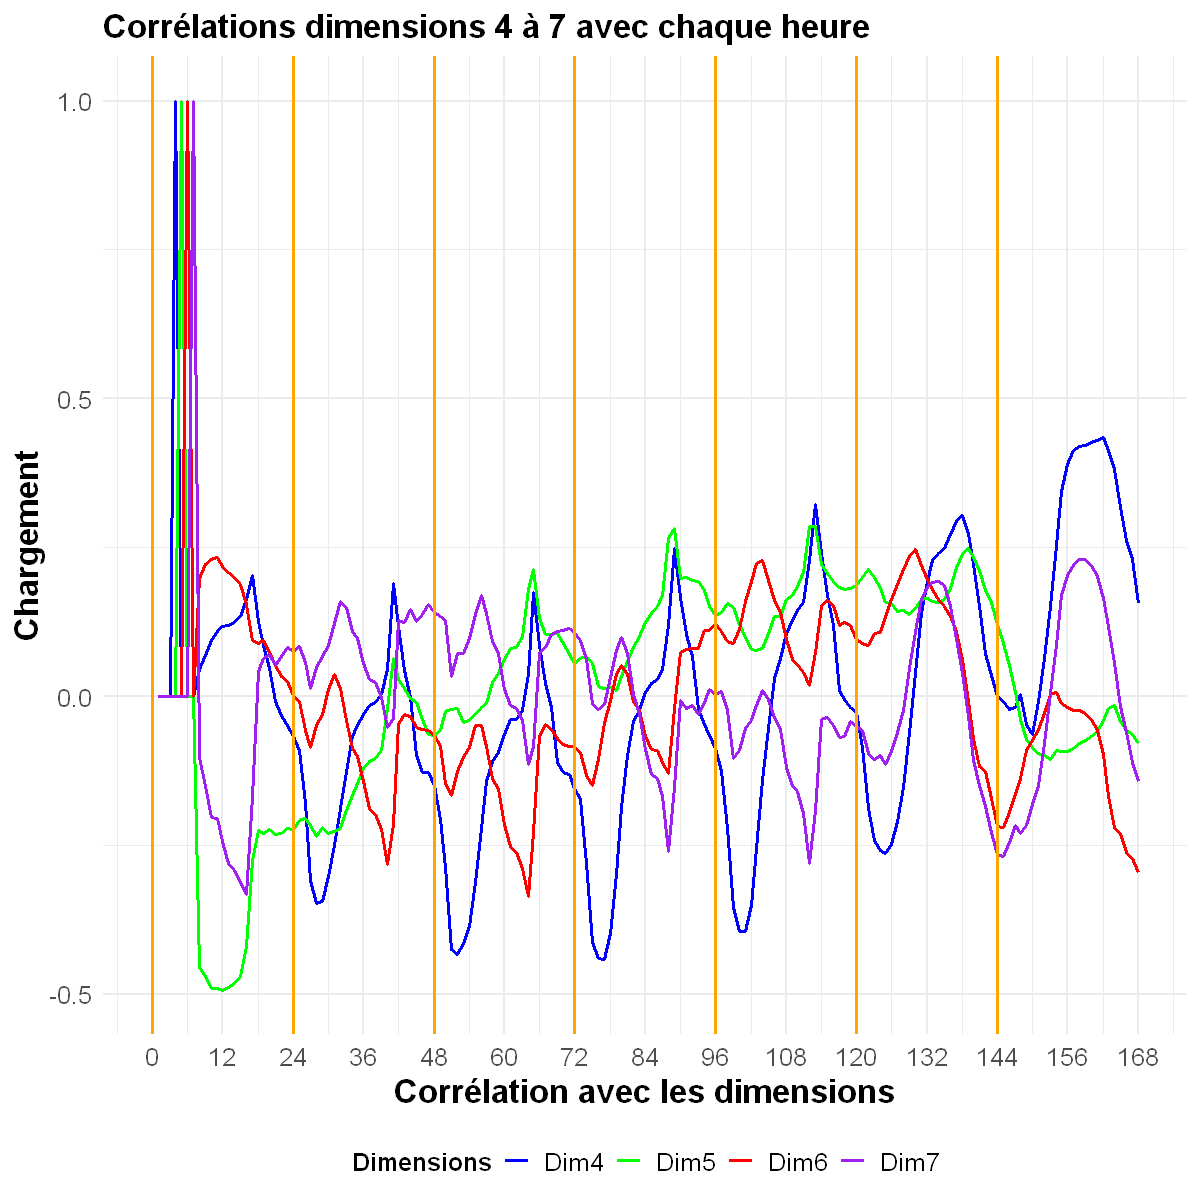

In [57]:
library(ggplot2)

# Tracer les courbes pour chaque dimension
p <- ggplot() +
  geom_line(data = cormat2[1:168, c("Dim4", "Dim5", "Dim6", "Dim7")], aes(x = 1:168, y = Dim4, color = "Dim4"), size = 1) +
  geom_line(data = cormat2[1:168, c("Dim4", "Dim5", "Dim6", "Dim7")], aes(x = 1:168, y = Dim5, color = "Dim5"), size = 1) +
  geom_line(data = cormat2[1:168, c("Dim4", "Dim5", "Dim6", "Dim7")], aes(x = 1:168, y = Dim6, color = "Dim6"), size = 1) +
  geom_line(data = cormat2[1:168, c("Dim4", "Dim5", "Dim6", "Dim7")], aes(x = 1:168, y = Dim7, color = "Dim7"), size = 1) +
  
  # Ajouter des lignes verticales pour les jours
  geom_vline(xintercept = timeTick - 1, color = "Orange", size = 1) +
  
  # Personnalisation des axes et des titres
  labs(x = "Corrélation avec les dimensions", y = "Chargement",
       title = "Corrélations dimensions 4 à 7 avec chaque heure") +
  scale_x_continuous(breaks = seq(0, 168, by = 12), labels = seq(0, 168, by = 12)) +
  theme_minimal(base_size = 15) +
  
  # Légende
  scale_color_manual(values = c("Dim4" = "blue", "Dim5" = "green", "Dim6" = "red", "Dim7" = "purple"),
                     labels = c("Dim4", "Dim5", "Dim6", "Dim7")) +
  theme(legend.position = "bottom") +
  guides(color = guide_legend(title = "Dimensions")) +
  theme(legend.title = element_text(size = 15, face = "bold"),
        legend.text = element_text(size = 15)) +
  
  # Ajustement de la disposition
  theme(plot.title = element_text(size = 20, face = "bold"),
        axis.text = element_text(size = 15),
        axis.title = element_text(size = 20, face = "bold"))

print(p)

# Sauvegarder le graphique
ggsave("plot.png", plot = p, width = 20, height = 8, dpi = 300)


Interprétation : 

Ce graphique représente la corrélation entre quatre dimensions supplémentaires de notre ACP (Dim4, Dim5, Dim6, Dim7) et chaque heure de la semaine. En référence à la matrice de corrélation que nous avons analysée précédemment :

Dim4 et Dim5 pourraient être associées aux variations de chargement à différents moments de la semaine, comme indiqué par la corrélation avec les variables Diff matin-soir et Diff début-fin semaine. Leur comportement ondulatoire montre des motifs récurrents sur lesquels elles ont un impact significatif. Les pics positifs et négatifs alternés pourraient représenter des périodes comme les heures de pointe du matin et du soir, ou des variations entre le début et la fin de semaine.

Dim6 et Dim7 ne correspondaient pas à des variables spécifiques de la matrice de corrélation que nous avons vue précédemment, ce qui suggère qu'elles pourraient capter des aspects plus subtils ou complexes du comportement de chargement qui ne sont pas directement liés aux moyennes ou aux différences jour/nuit, semaine/weekend ou matin/soir. Les courbes montrent des schémas moins prévisibles et des fluctuations qui pourraient correspondre à des facteurs moins évidents ou à des interactions entre différents types de comportements d'usage, comme par exemple des variations entre la période de samedi soir à mardi midi et de mercredi soir à samedi après-midi. Mais ces composantes restent difficilement interprétables.

Enfin, on observe de manière générale que les amplitudes des quatre courbes sont moins importantes que sur le graphique précédent. Cela le rend plus difficilement interprétable, particulièrement pour les deux dernières composantes principales.

En conclusion, l'analyse en composantes principales a permis de réduire efficacement la dimension de notre jeu de données, en passant de 168 variables horaires à seulement 7 dimensions principales. Cette réduction significative a facilité l'interprétation des données tout en conservant les aspects les plus significatifs du comportement des utilisateurs.

Les premières dimensions (Dim1 à Dim3) ont révélé des schémas distincts de chargement des stations : Dim1 est fortement liée à la moyenne de chargement global, Dim2 capture les variations entre le jour et la nuit, et Dim3 présente les différences entre les jours de semaine et le weekend. Ces résultats confirment l'intuition que l'activité des stations Vélib est influencée par des facteurs temporels précis et qu'elle montre des variations significatives selon ces périodes.

Les dimensions suivantes (Dim4 à Dim7) ont également montré des corrélations intéressantes, même si plus nuancées, indiquant des variations plus légères qui pourraient correspondre à des périodes de transition ou à des interactions entre les habitudes des utilisateurs. L'analyse de ces dimensions supplémentaires pourrait révéler des informations pertinentes sur des motifs moins évidents, tels que les variations de l'utilisation des stations Vélib au cours d'une journée typique ou entre le début et la fin de semaine.

Nous allons maintenant nous intéresser aux différentes possibilités de classifications des différentes stations de notre jeu de données.

# 3 - Classification

Dans cette partie, nous allons étudier les différentes possibilités de classifications. La classification des stations Vélib dans notre jeu de données pourrait servir plusieurs objectifs intéressants et pratiques, tels que :
* L'optimisation de la gestion des stations
* L'amélioration de la répartition des vélos
* L'identification des comportements d'utilisateurs

In [58]:
# Importation des packages pour cette partie
library(cluster)
library(ggplot2)

## 3.1 - Classification sur les données issues de l'ACP par K-means

K-Means est un algorithme simple d’apprentissage non supervisé utilisé pour résoudre les problèmes de clustering. Il suit une procédure simple consistant à classer un ensemble de données dans un nombre de clusters, défini par la lettre "k", qui est fixé au préalable.

### 3.1.1 - Détermination du nombre optimal de clusters pour la méthode du K-means

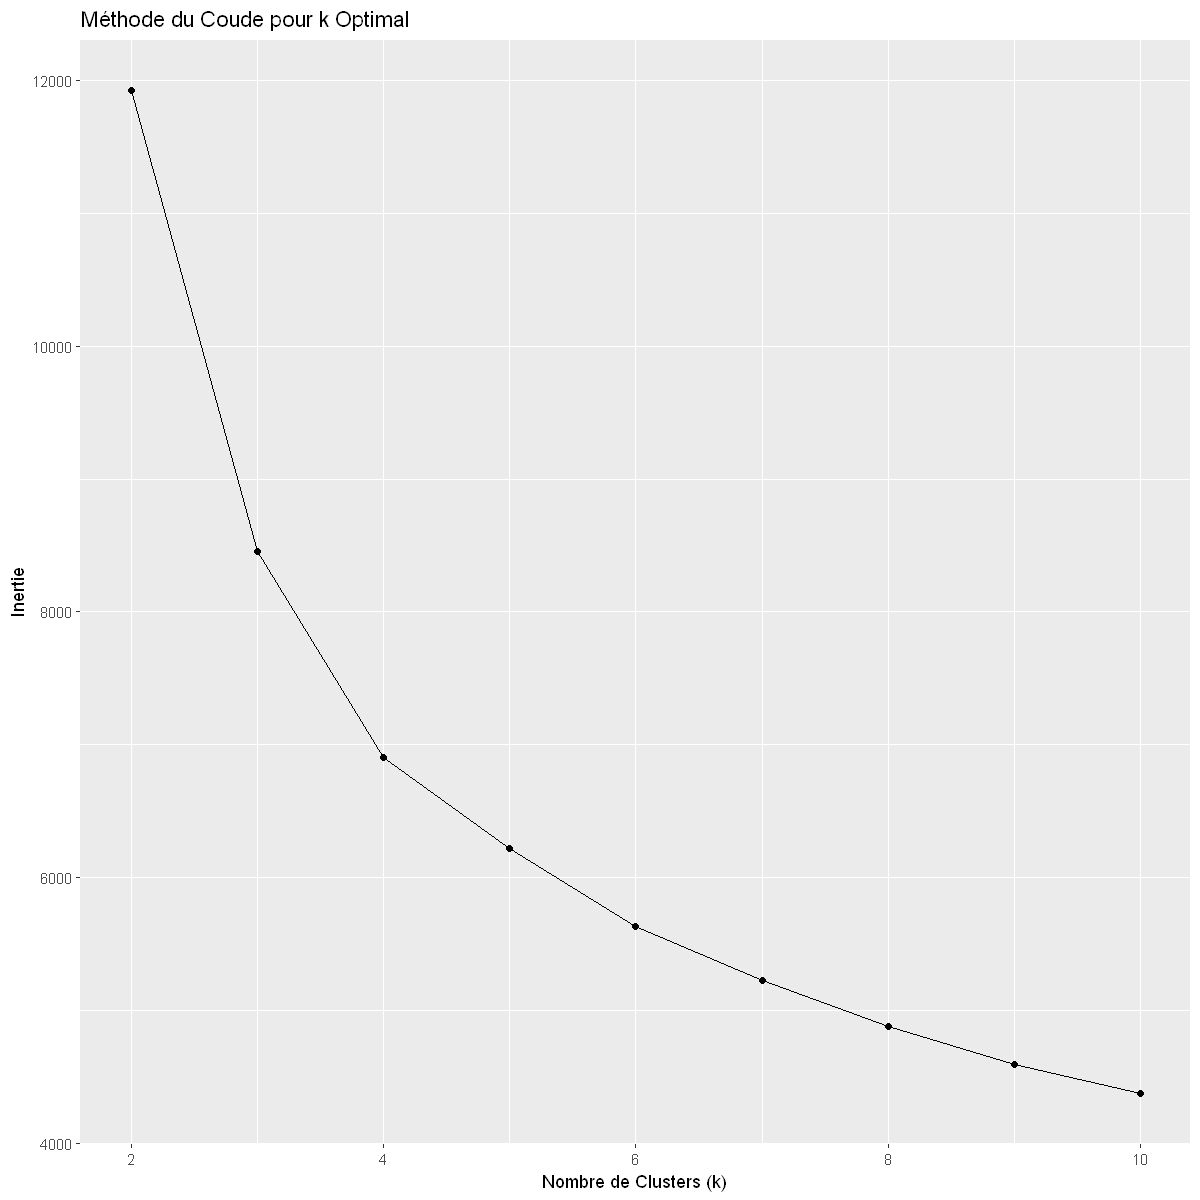

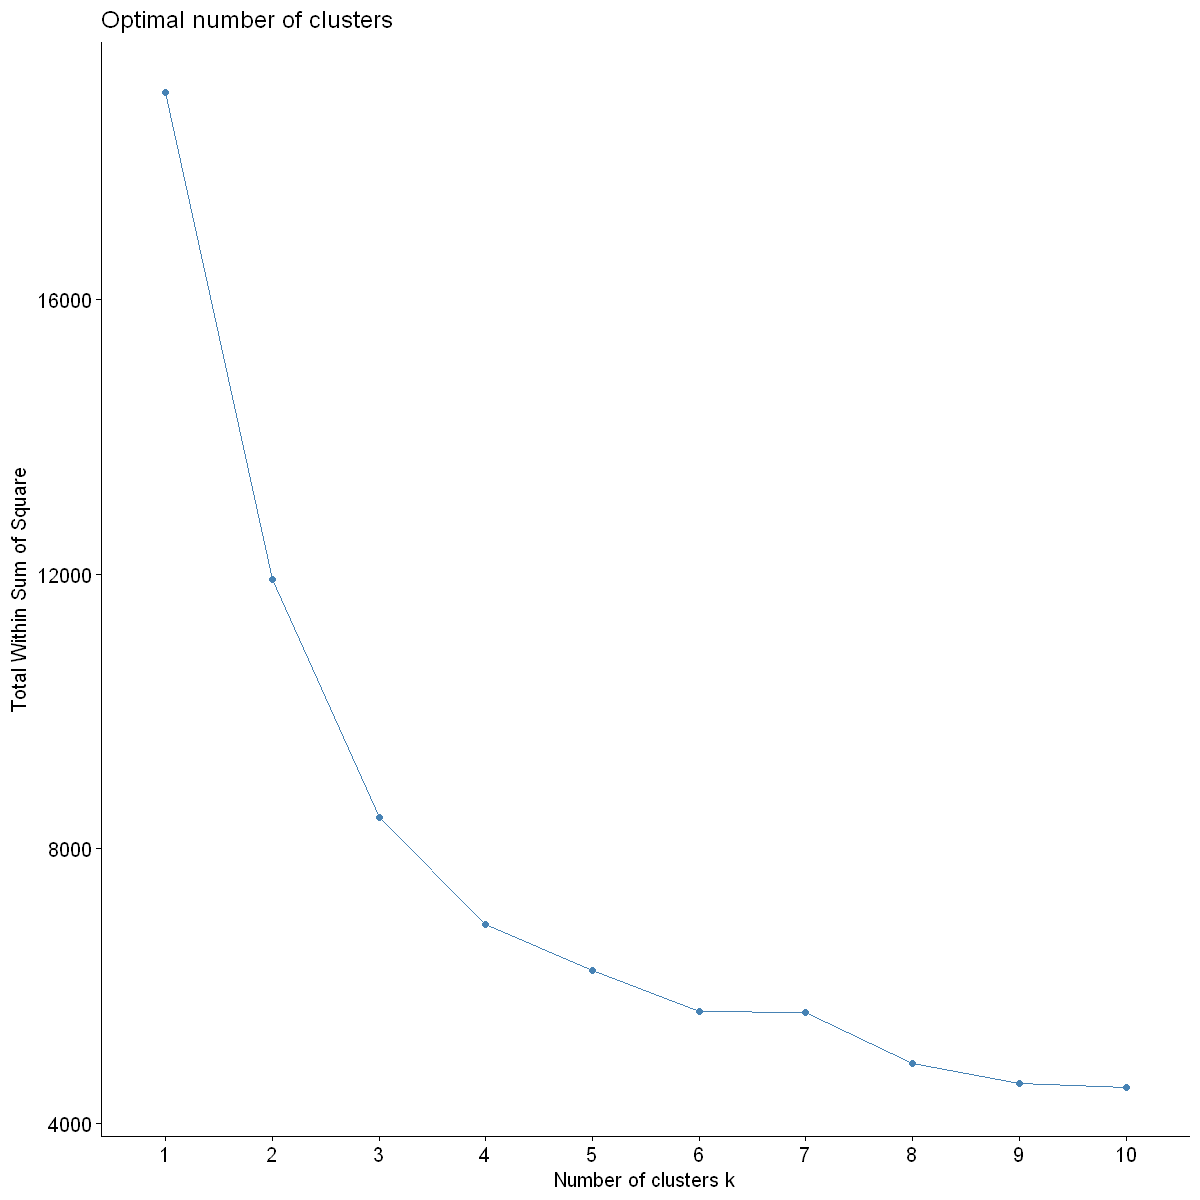

In [59]:
# En supposant que vos données sont chargées et prétraitées, procédez au clustering
# Clustering K-means
set.seed(42)  # Pour la reproductibilité
km <- kmeans(loading_pca, centers = 10, nstart = 10)  # Similaire à n_init en Python

# Calculer la somme totale des carrés intra-cluster
inertia <- numeric(10)
for (k in 1:10) {
  km_temp <- kmeans(loading_pca, centers = k, nstart = 10)
  inertia[k] <- km_temp$tot.withinss
}

# Tracer l'inertie
ggplot(data = data.frame(k = 2:10, inertia = inertia[-1]), aes(x = k, y = inertia)) +
  geom_point() +
  labs(x = "Nombre de Clusters (k)", y = "Inertie") +
  geom_line() +
  ggtitle("Méthode du Coude pour k Optimal")

# Utilisation de factoextra pour l'équivalent de KElbowVisualizer
fviz_nbclust(loading_pca, kmeans, method = "wss")  # wss: somme des carrés intra-cluster


Interprétation : 

Le graphique montre que le nombre optimal de clusters pour la méthode du K-Means de notre jeu de données est de 7, comme déterminé par la méthode du coude. Ce choix équilibre bien la compacité des clusters et la complexité computationnelle, ce qui devrait permettre une bonne segmentation des stations Vélib. Cela peut également se confirmer par les observations sur la mise en place de la méthode "à la main".

Nombre optimal de clusters selon le score silhouette : 2 


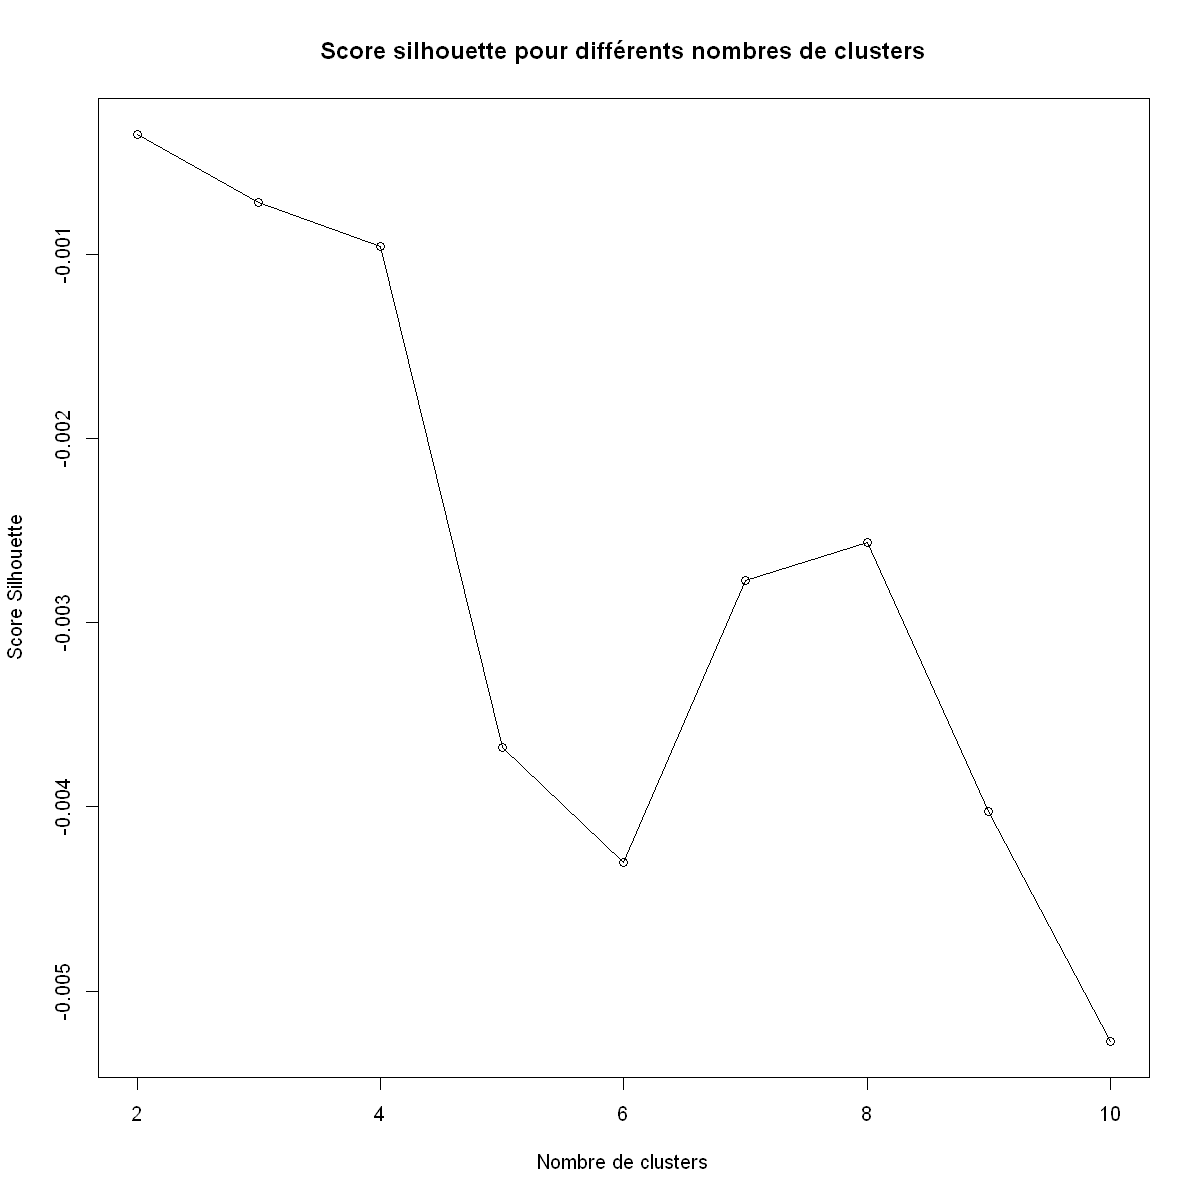

In [60]:
#Version chat 
# Vecteur pour stocker les scores de silhouette
silhouette_scores <- c()

# Plage de nombre de clusters à tester
k_range <- 2:10

# Calcul des scores de silhouette pour chaque nombre de clusters
for (k in k_range) {
  kmeans_model <- kmeans(loading_pca, centers=k, nstart=10)
  cluster_labels <- kmeans_model$cluster
  
  # Calcul des distances euclidiennes carrées entre les points
  distances <- dist(loading_pca)^2
  
  # Calcul des distances moyennes à chaque cluster
  mean_distances <- sapply(unique(cluster_labels), function(clust) {
    mean(distances[cluster_labels == clust])
  })
  
  # Calcul des distances moyennes au cluster le plus proche pour chaque point
  a <- sapply(cluster_labels, function(clust) {
    mean_distances[clust]
  })
  
  # Calcul des distances moyennes au cluster le plus proche différent de celui du point
  b <- sapply(seq_along(cluster_labels), function(i) {
    min(mean_distances[-cluster_labels[i]])
  })
  
  # Calcul des scores de silhouette pour chaque point
  silhouette_vals <- (b - a) / pmax(a, b)
  
  # Calcul de la moyenne des scores de silhouette pour ce cluster
  silhouette_avg <- mean(silhouette_vals)
  
  # Stockage du score de silhouette moyen
  silhouette_scores <- c(silhouette_scores, silhouette_avg)
}

# Tracer les scores de silhouette en fonction du nombre de clusters
plot(k_range, silhouette_scores, type='o', xlab='Nombre de clusters', ylab='Score Silhouette',
     main='Score silhouette pour différents nombres de clusters')

# Trouver le nombre optimal de clusters
optimal_num_clusters <- k_range[which.max(silhouette_scores)]
cat("Nombre optimal de clusters selon le score silhouette :", optimal_num_clusters, "\n")


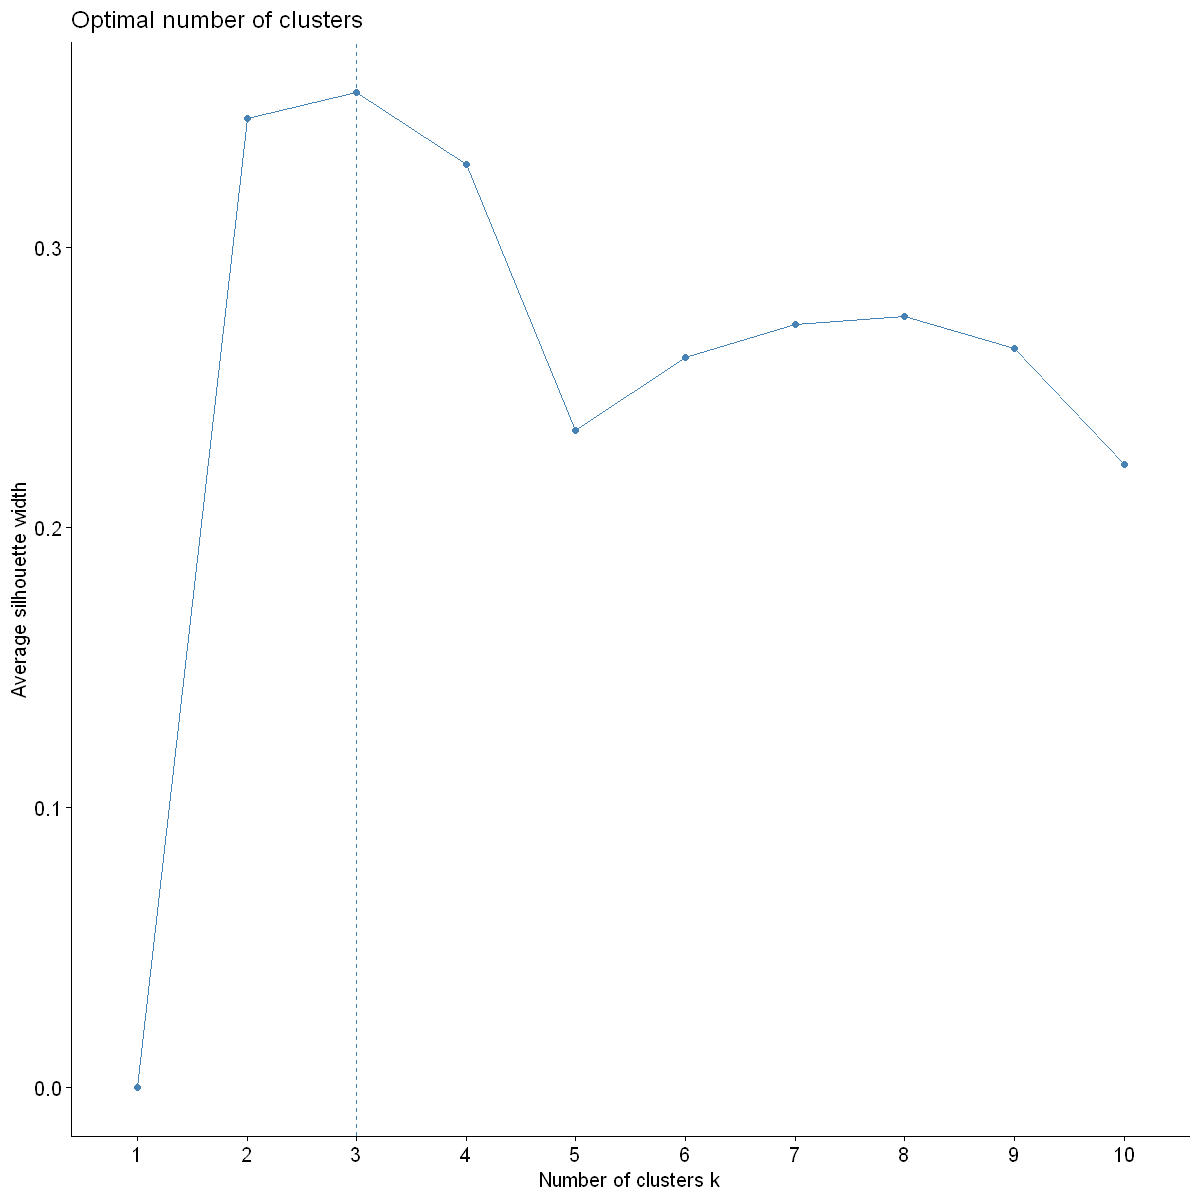

In [61]:
#Version du cours vu en TP
nbclust_result=fviz_nbclust(loading_pca, kmeans, method= "silhouette")
print(nbclust_result)

Comme nous pouvons le voir, le nombre de clusters optimal d'après le score silhouette est de 3. <span style="color:red">Je n'ai pas réussi à afficher directement le nombre optimal via un print, est-ce important (ce n'est pas les mêmes fonctions qu'en python c'est pour ca)

Interprétation : 


Le graphique présente le score de silhouette pour différents nombres de clusters allant de 2 à 10. Le score de silhouette mesure la qualité du clustering en calculant combien point est similaire à son propre cluster comparé aux autres clusters. Dans ce cas, le score de silhouette le plus élevé est obtenu avec 3 clusters, et il diminue généralement à mesure que le nombre de clusters augmente.

Le résultat obtenu par cette méthode n'est pas le même que celui donné par la méthode du coude. En effet, le score de silhouette et la méthode du coude sont deux approches différentes pour évaluer le nombre optimal de clusters :

* La méthode du coude se concentre sur la minimisation de la variance au sein des clusters. Elle cherche le point où l'ajout de clusters supplémentaires n'entraîne pas une amélioration significative de la somme totale des carrés au sein des clusters.

* Le score de silhouette, évalue à la fois la cohésion (à quel point les points sont proches les uns des autres au sein du même cluster) et la séparation (à quel point les clusters sont loin les uns des autres).


Le graphique présente le score de silhouette pour différents nombres de clusters allant de 2 à 10. Le score de silhouette mesure la qualité du clustering en calculant à quel point chaque point est similaire à son propre cluster comparé aux autres clusters. Le score est compris entre -1 et 1, où un score élevé indique que les points sont bien adaptés à leur propre cluster et mal adaptés aux clusters voisins.

Dans ce cas, le score de silhouette le plus élevé est obtenu avec 3 clusters, et il diminue généralement à mesure que le nombre de clusters augmente.

- Le score de silhouette et la méthode du coude sont deux approches différentes pour évaluer le nombre optimal de clusters.

- La méthode du coude se concentre sur la minimisation de la variance au sein des clusters. Elle cherche le point où l'ajout de clusters supplémentaires n'entraîne pas une amélioration significative de la somme totale des carrés au sein des clusters.

Le score de silhouette, en revanche, évalue à la fois la cohésion (à quel point les points sont proches les uns des autres au sein du même cluster) et la séparation (à quel point les clusters sont loin les uns des autres).

La différence entre les résultats de ces deux méthodes peut survenir parce qu'ils mesurent des aspects légèrement différents de la structure des données. Alors que la méthode du coude peut indiquer que 7 clusters minimisent la variance intra-cluster sans considération significative pour la séparation entre les clusters, le score de silhouette indique que 3 clusters offrent la meilleure combinaison de séparation et de cohésion.

Pour la classification des stations Vélib, cela signifie que l'utilisation de 3 clusters pourrait conduire à des groupes plus définis et clairement séparés, tandis que 7 clusters pourraient capturer plus de nuances dans les données. <span style="color:red">Revoir l'interprétation si vous validez mes codes

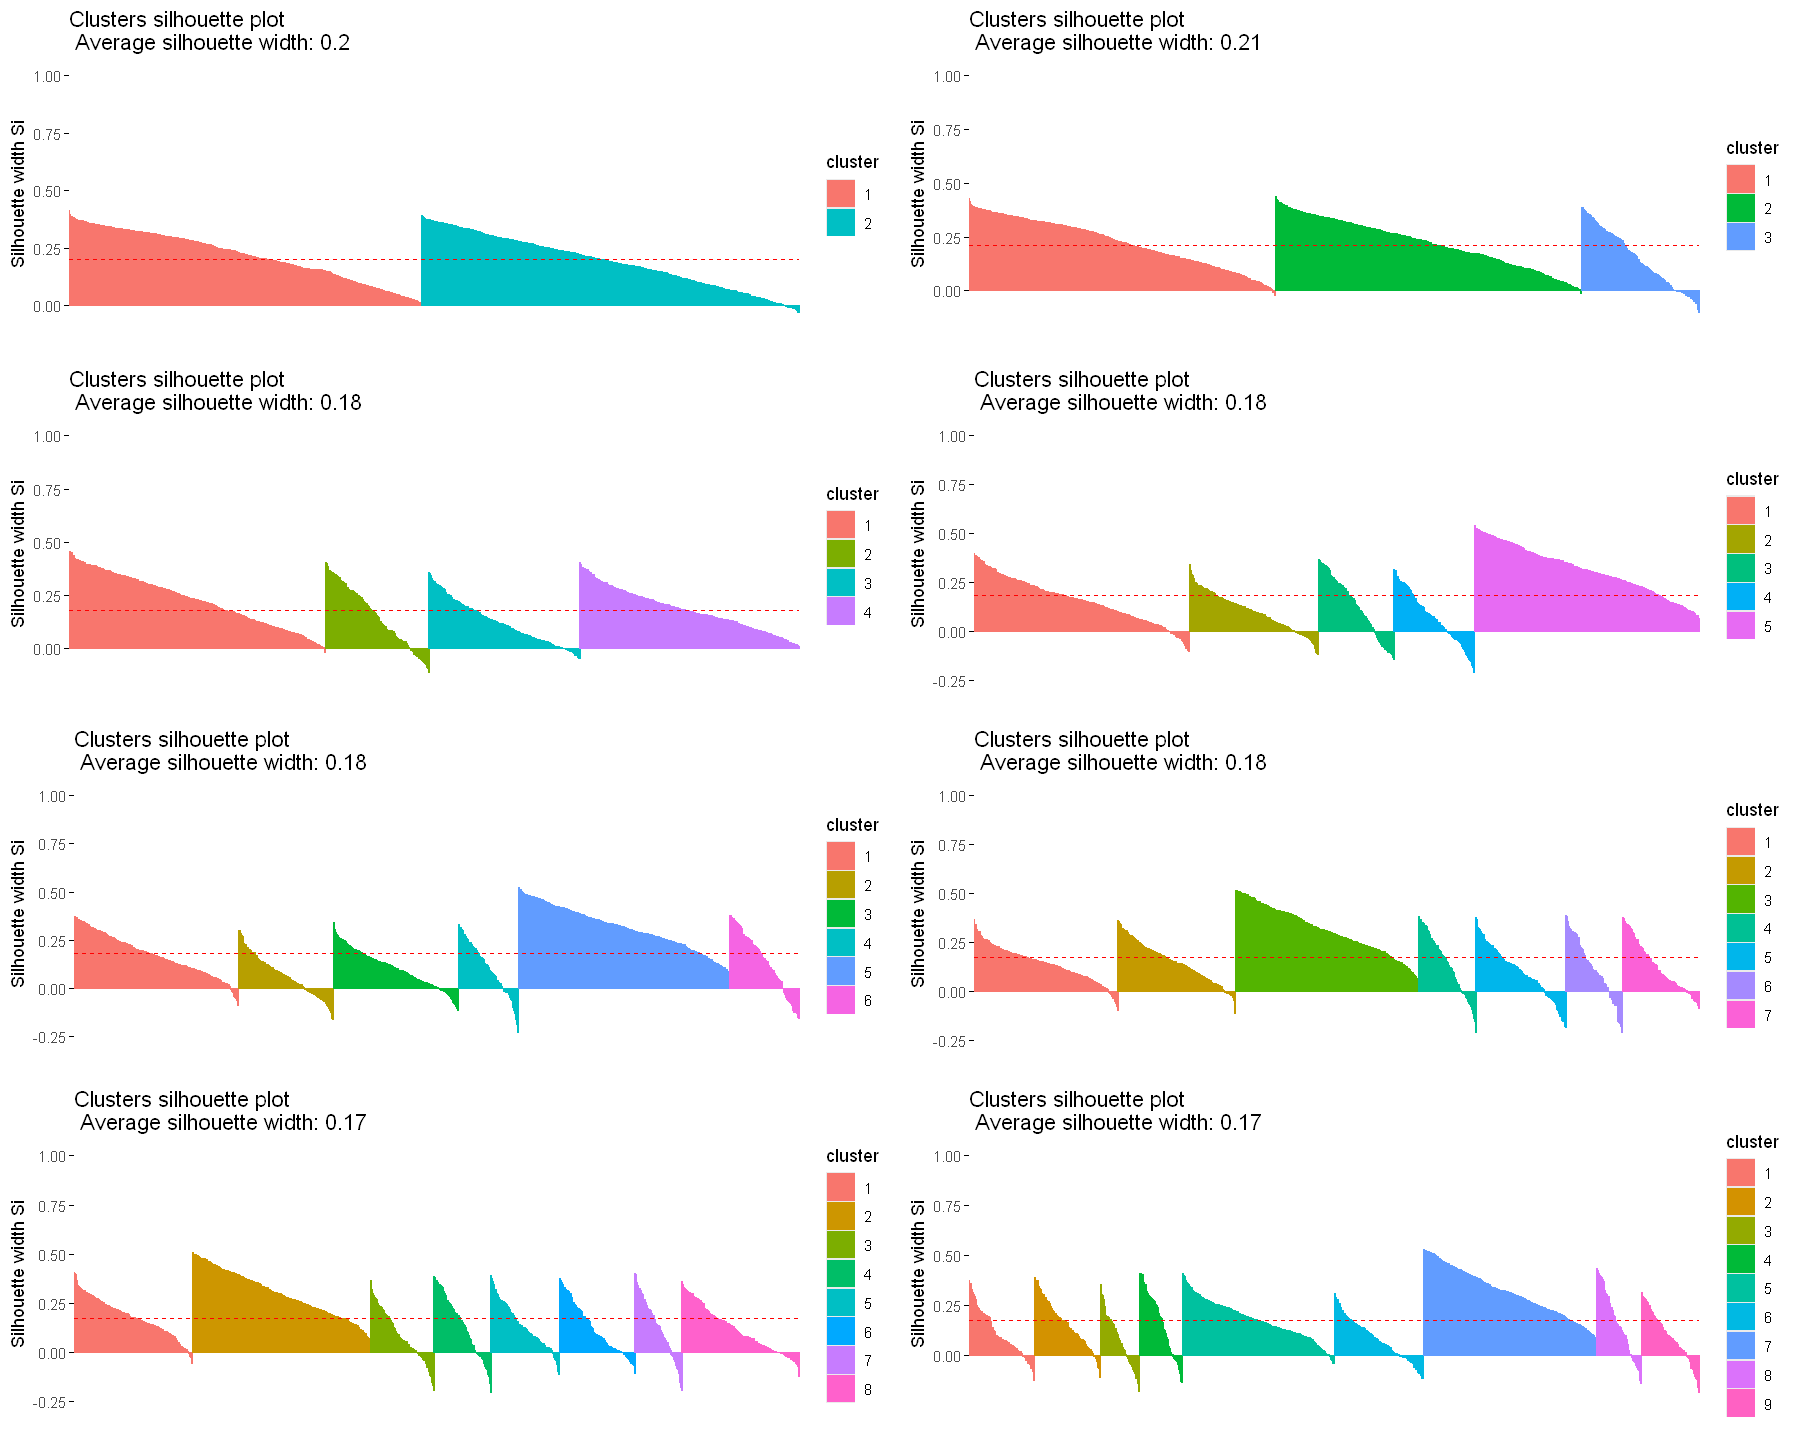

In [62]:
options(repr.plot.width = 15, repr.plot.height = 12)

# Définir le nombre de clusters à explorer
num_clusters <- 2:9

# Créer une liste pour stocker les tracés de silhouette
silhouette_plots <- list()

# Parcourir chaque nombre de clusters
for (k in num_clusters) {
  # Effectuer le clustering avec k clusters
  reskmeans <- kmeans(loading_pca[,-c(1,2)], centers=k) 
  
  # Calculer les valeurs de silhouette
  sil <- silhouette(reskmeans$cluster, dist(loading_pca[, -c(1:2)]))
  
  # Créer un tracé de silhouette
  silhouette_plot <- fviz_silhouette(sil, print.summary = FALSE)
  
  # Stocker le tracé dans la liste
  silhouette_plots[[as.character(k)]] <- silhouette_plot
}

# Afficher les tracés en une seule grille
do.call(grid.arrange, c(silhouette_plots, ncol=2))


Interprétation : 

Largeur des silhouettes : La largeur des formes pour chaque cluster indique le score de silhouette des points dans ce cluster. Un score proche de 1 signifie que les points sont bien adaptés à leur cluster et mal adaptés aux clusters voisins. Un score proche de 0 indique que les points sont à la frontière de la décision entre deux clusters adjacents. Un score négatif suggère que les points ont été attribués au mauvais cluster.

Cohérence des tailles de clusters : La hauteur des formes indique le nombre de points dans chaque cluster. Des clusters de tailles équivalentes peuvent être le signe d'un bon clustering, alors que des différences importantes de tailles peuvent indiquer une mauvaise répartition des points.

Analyse par valeur de k :

* k=2 : Il semble y avoir une distinction raisonnable entre les deux clusters, même si l'un des clusters a une gamme plus large de scores, ce qui indique une variabilité interne.

* k=3 : Les scores de silhouette pour les trois clusters semblent bons, avec des scores pour la plupart positifs, suggérant un bon ajustement des points à leurs clusters respectifs. Cela est cohérent avec le graphique précédent sur le score de la maximisation du score de la silhouette.

* k=4 à k=9 : À mesure que le nombre de clusters augmente, nous commençons à voir plus de variabilité dans les scores de silhouette, avec certains clusters présentant des scores de silhouette bas ou même négatifs, ce qui indique une moins bonne adéquation des points à ces clusters.

La ligne rouge en pointillés dans chaque sous-graphique représente la moyenne du score de silhouette pour cette valeur spécifique de k. Plus cette moyenne est élevée, mieux c'est.

### 3.1.2 - Classification par K-Means

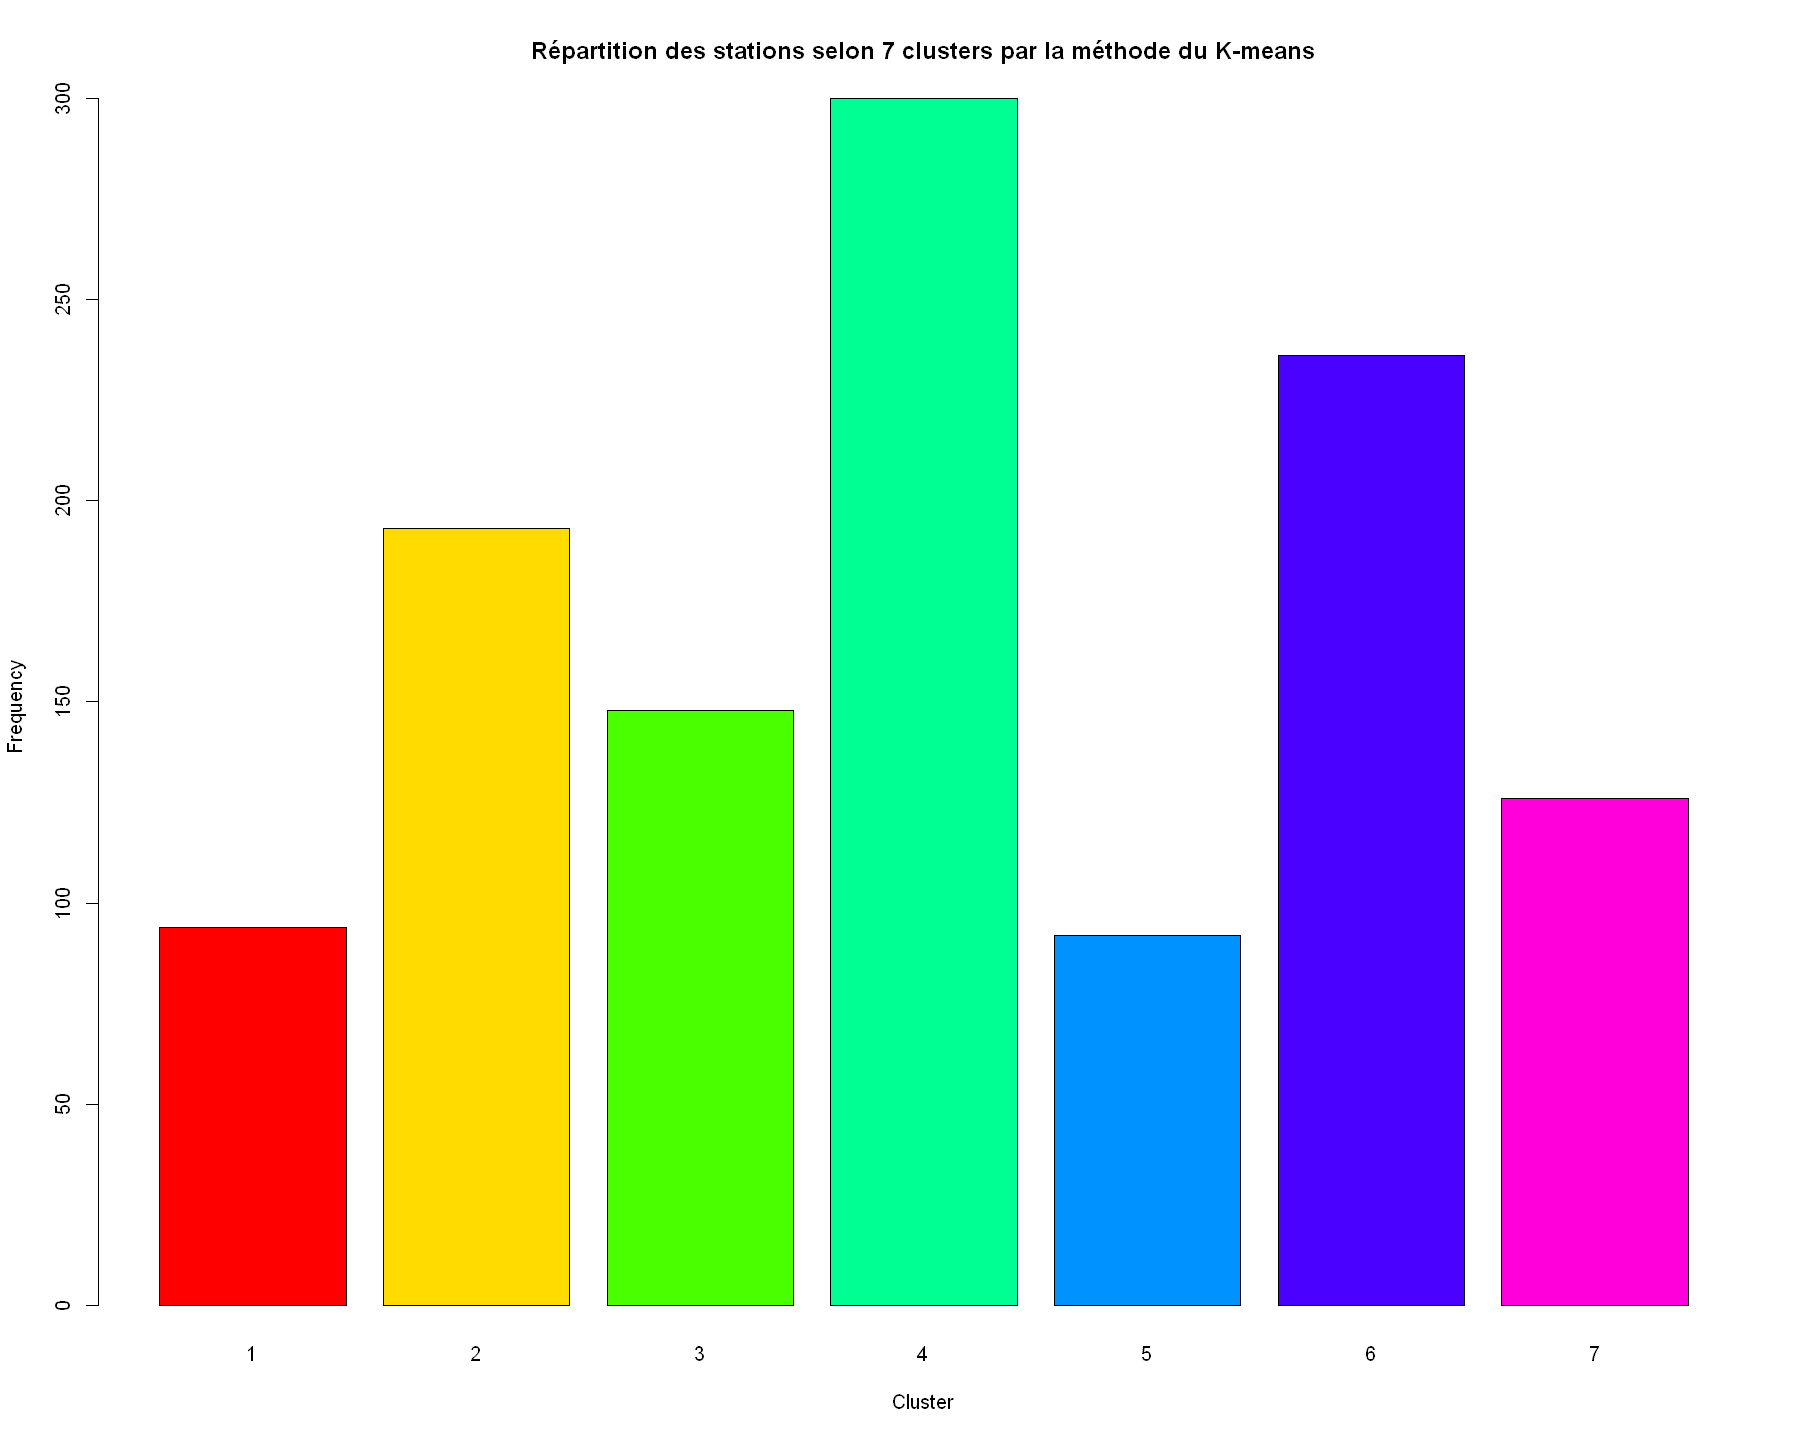

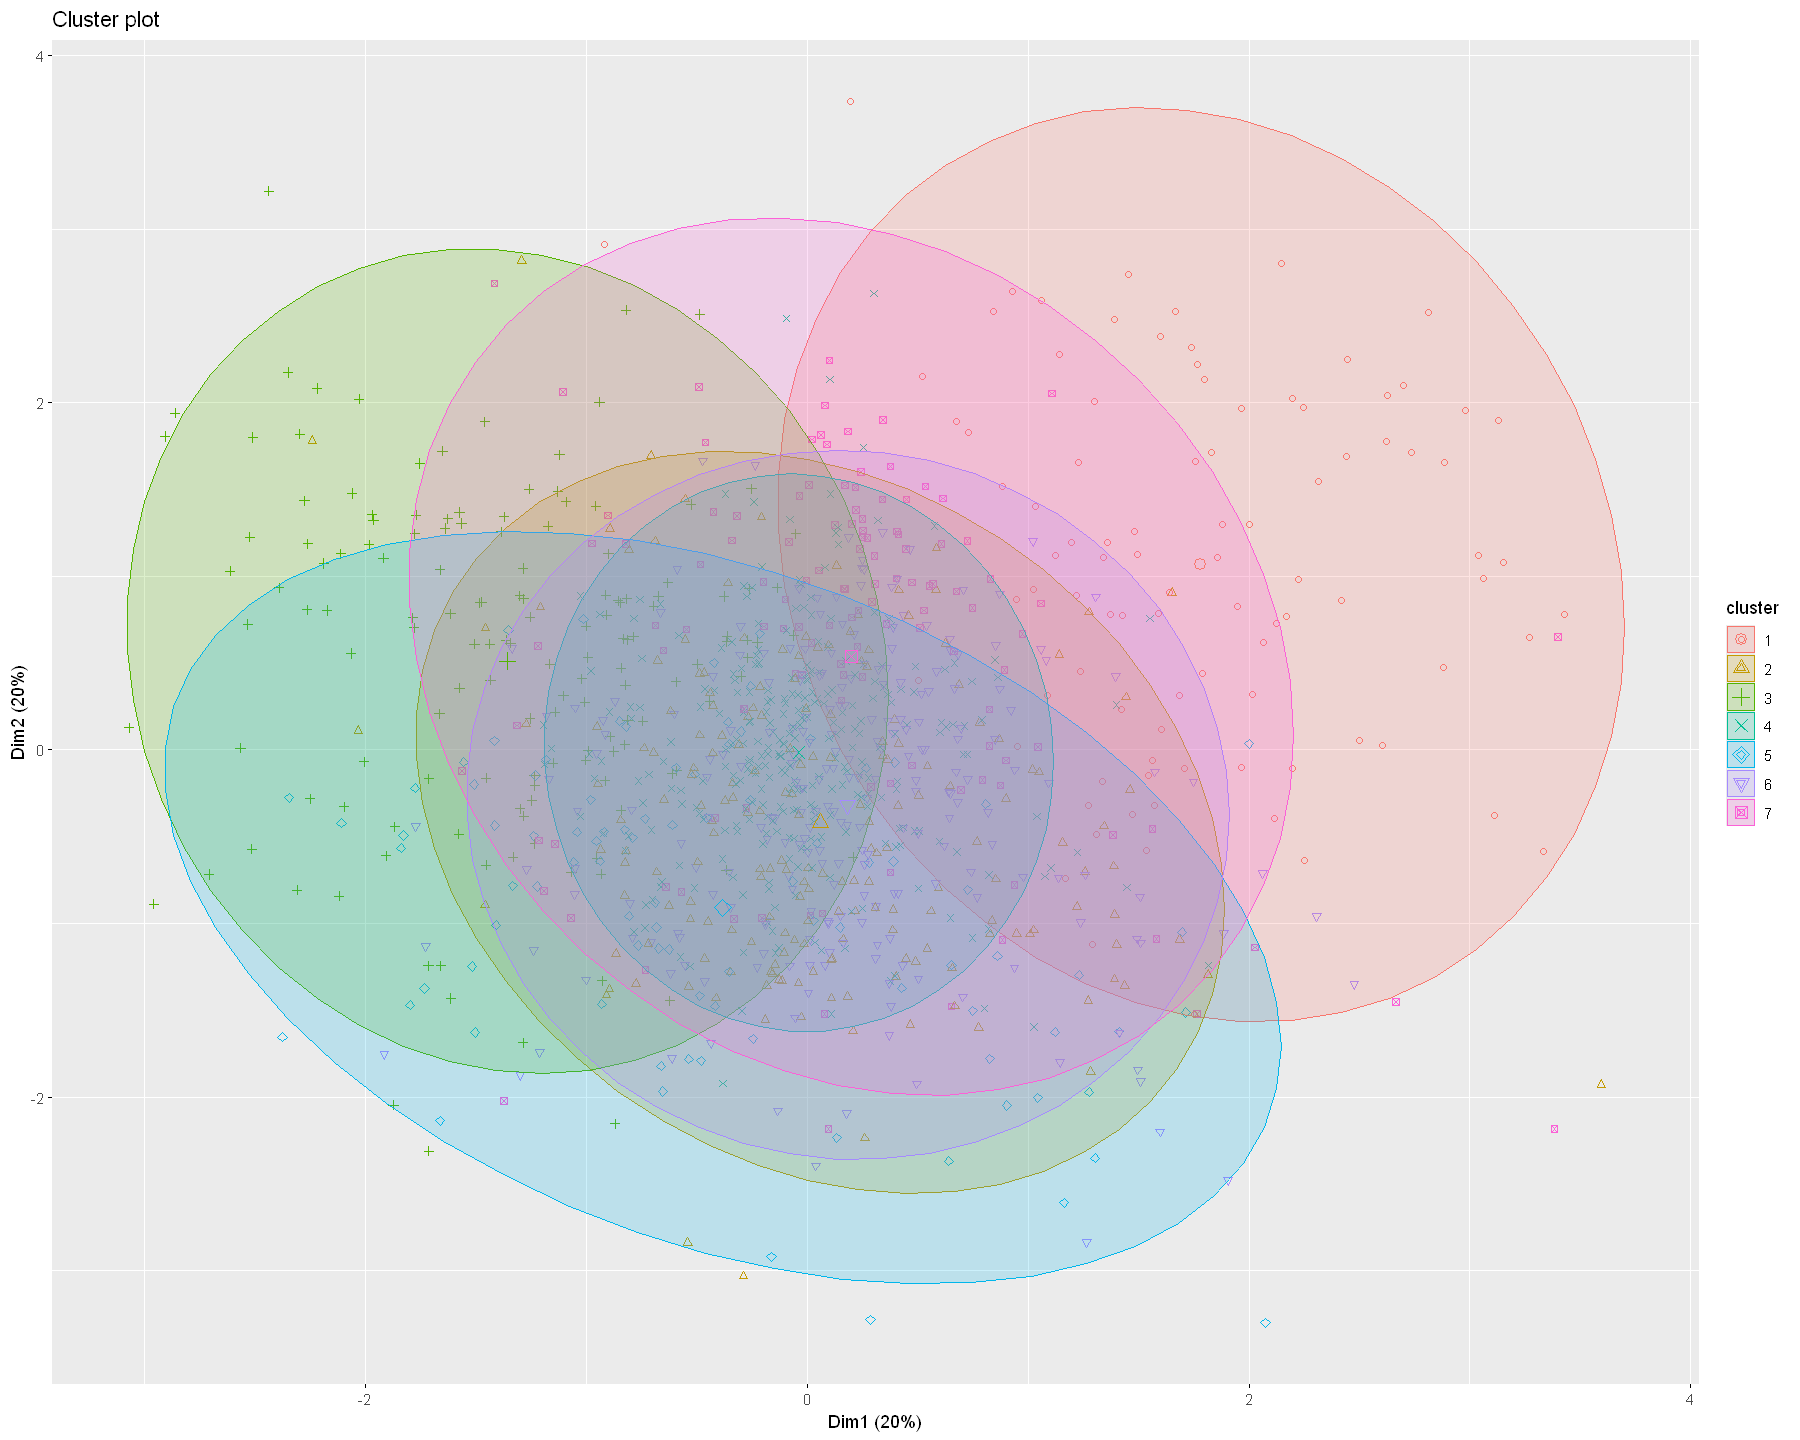

In [80]:
K = 7  # Selon la méthode du coude

kmeans_pca7 = kmeans(loading_pca[, -c(1, 2)], centers = K)
clusters_pca7 = kmeans_pca7$cluster

barplot(table(clusters_pca7), col = rainbow(K), xlab = "Cluster", ylab = "Frequency",
        main = paste("Répartition des stations selon", K, "clusters par la méthode du K-means"))

fviz_cluster(kmeans_pca7, data=loading_pca[,-c(1,2)], ellipse.type="norm", labelsize=8, geom=c("point"))


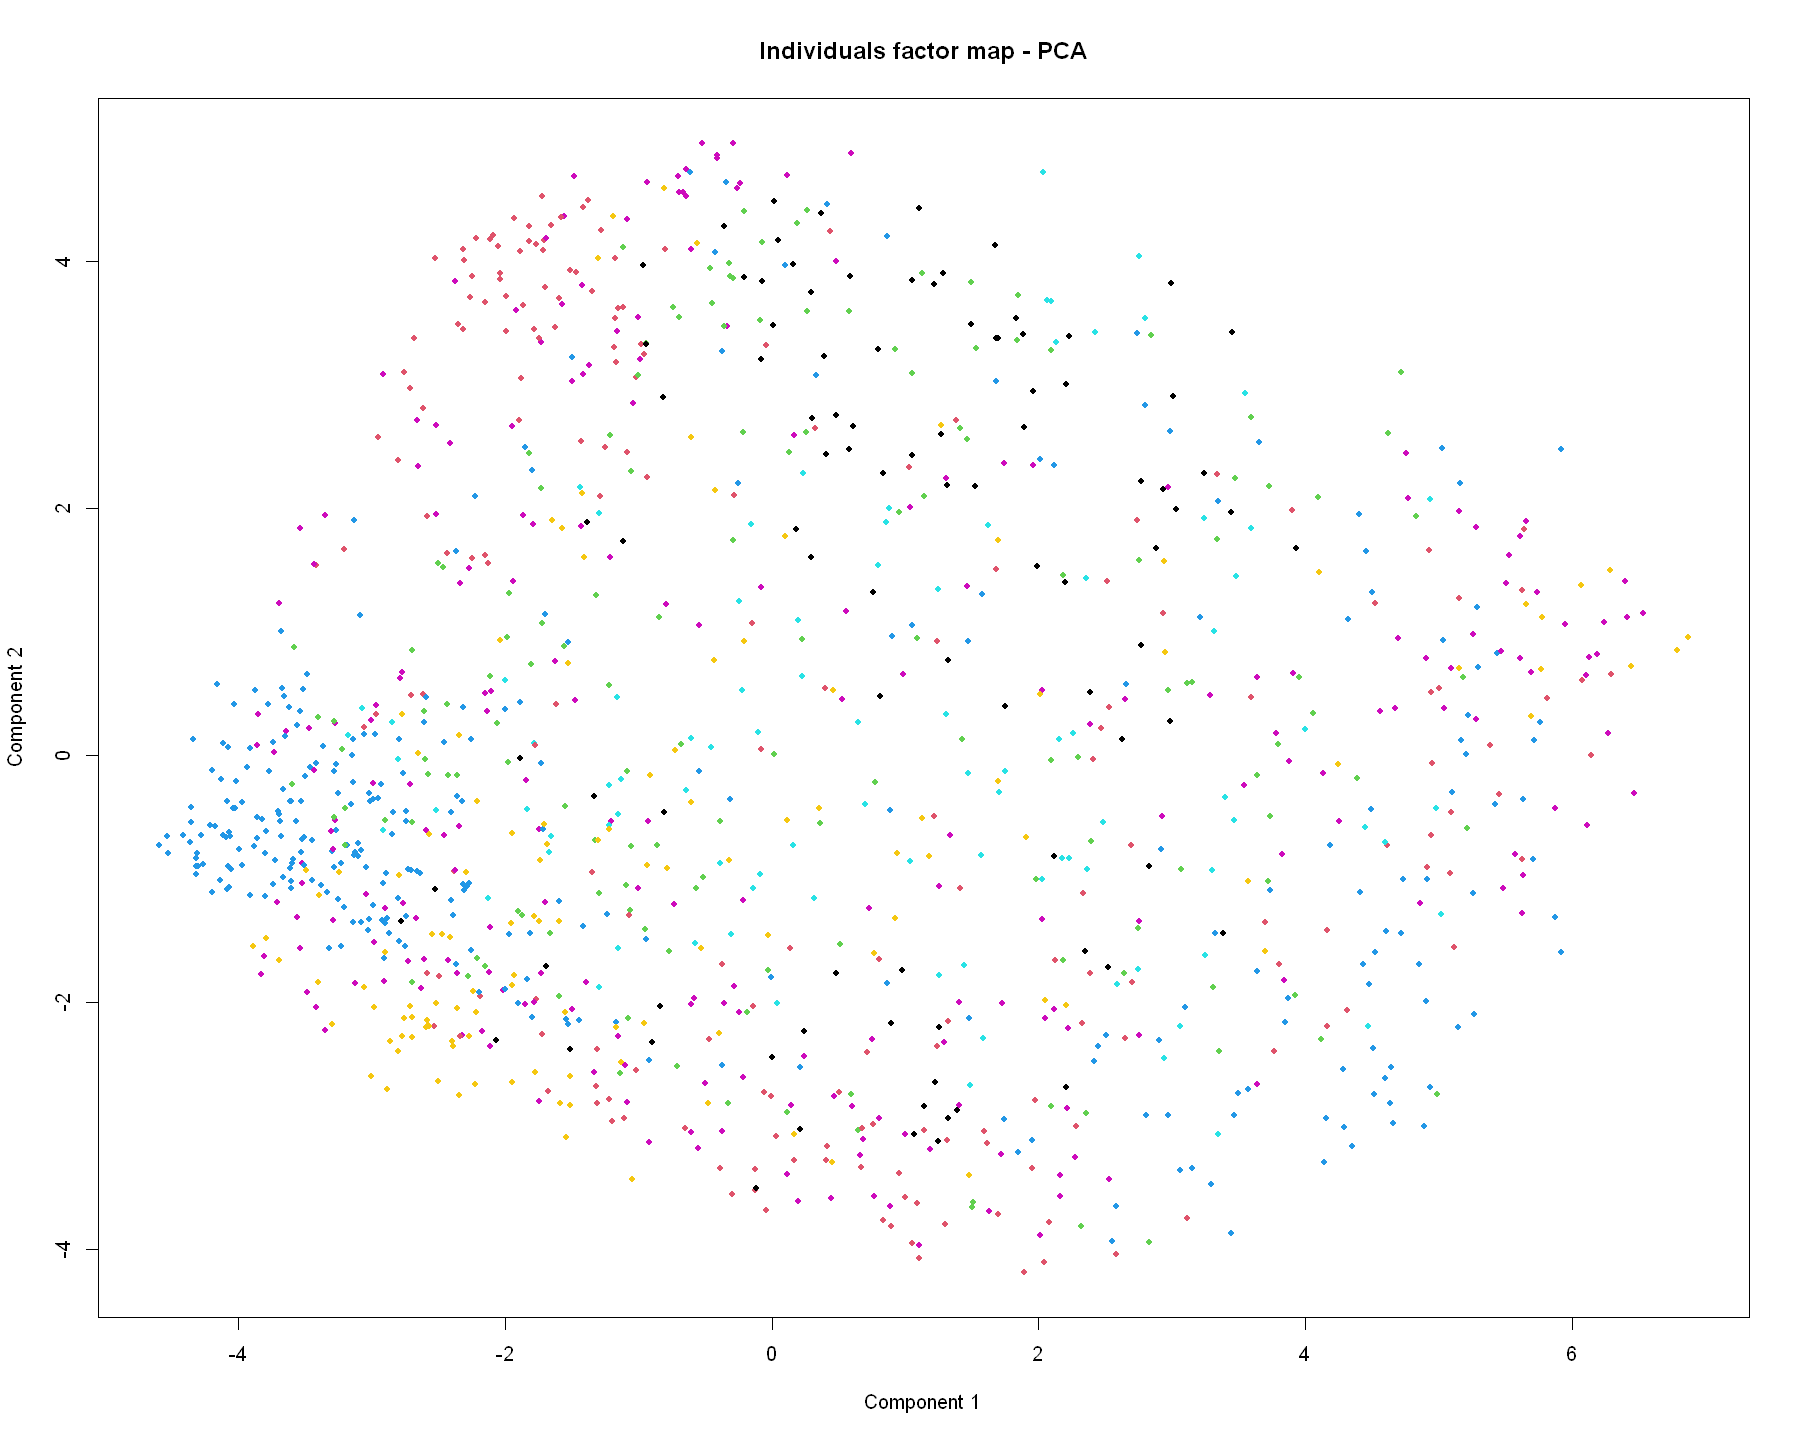

In [81]:
# Visualisation sur le plan factoriel
plot(loading_pca[, 1], loading_pca[, 2], col = clusters_pca7, pch = 19, cex = 0.7,
     main = "Individuals factor map - PCA", xlab = "Component 1", ylab = "Component 2")
#Autre technique pour visualiser avec chat gpt masi c'est pas non plus terrible

Interprétation : 

Ce graphique est un histogramme qui montre la répartition des stations Vélib selon 7 clusters déterminés par la méthode K-means. Chaque barre représente la fréquence des stations dans chacun des clusters (de 0 à 6). On remarque que le cluster 2 contient le plus grand nombre de stations, tandis que les clusters 5 et 6 en contient un peu moins. Les autres clusters sont assez bien répartis. <span style="color:red">J'ai à chaque compilation de la cellule des résultats différents, je ne sais pas si je peux donc appliquer cette interprétation.

Interprétation : 

Ce graphe est une map des facteurs individuels issus de l'ACP. Chaque point représente une station Vélib, et les couleurs correspondent aux 7 clusters identifiés par la méthode du K-means. Les deux axes représentent les deux premières composantes principales qui capturent la plus grande partie de la variance dans les données (64% comme vu dans la partie ACP). On eput voir comment les stations sont distribuées dans l'espace réduit des composantes principales, et il semble qu'il y ait une séparation assez claire entre les clusters, à part pour les deux clusters centrés. 

Nous allons maintenant étudier le cas de 6 clusters pour voir si les 2 clusters mélangés au centre du premier plan fatoriel seraient mieux classifiés.<span style="color:red"> A REVOIR LA PARTIE QUI SUIT CAR MES RESULTATS NE SONT PAS INTERPRETABLES 

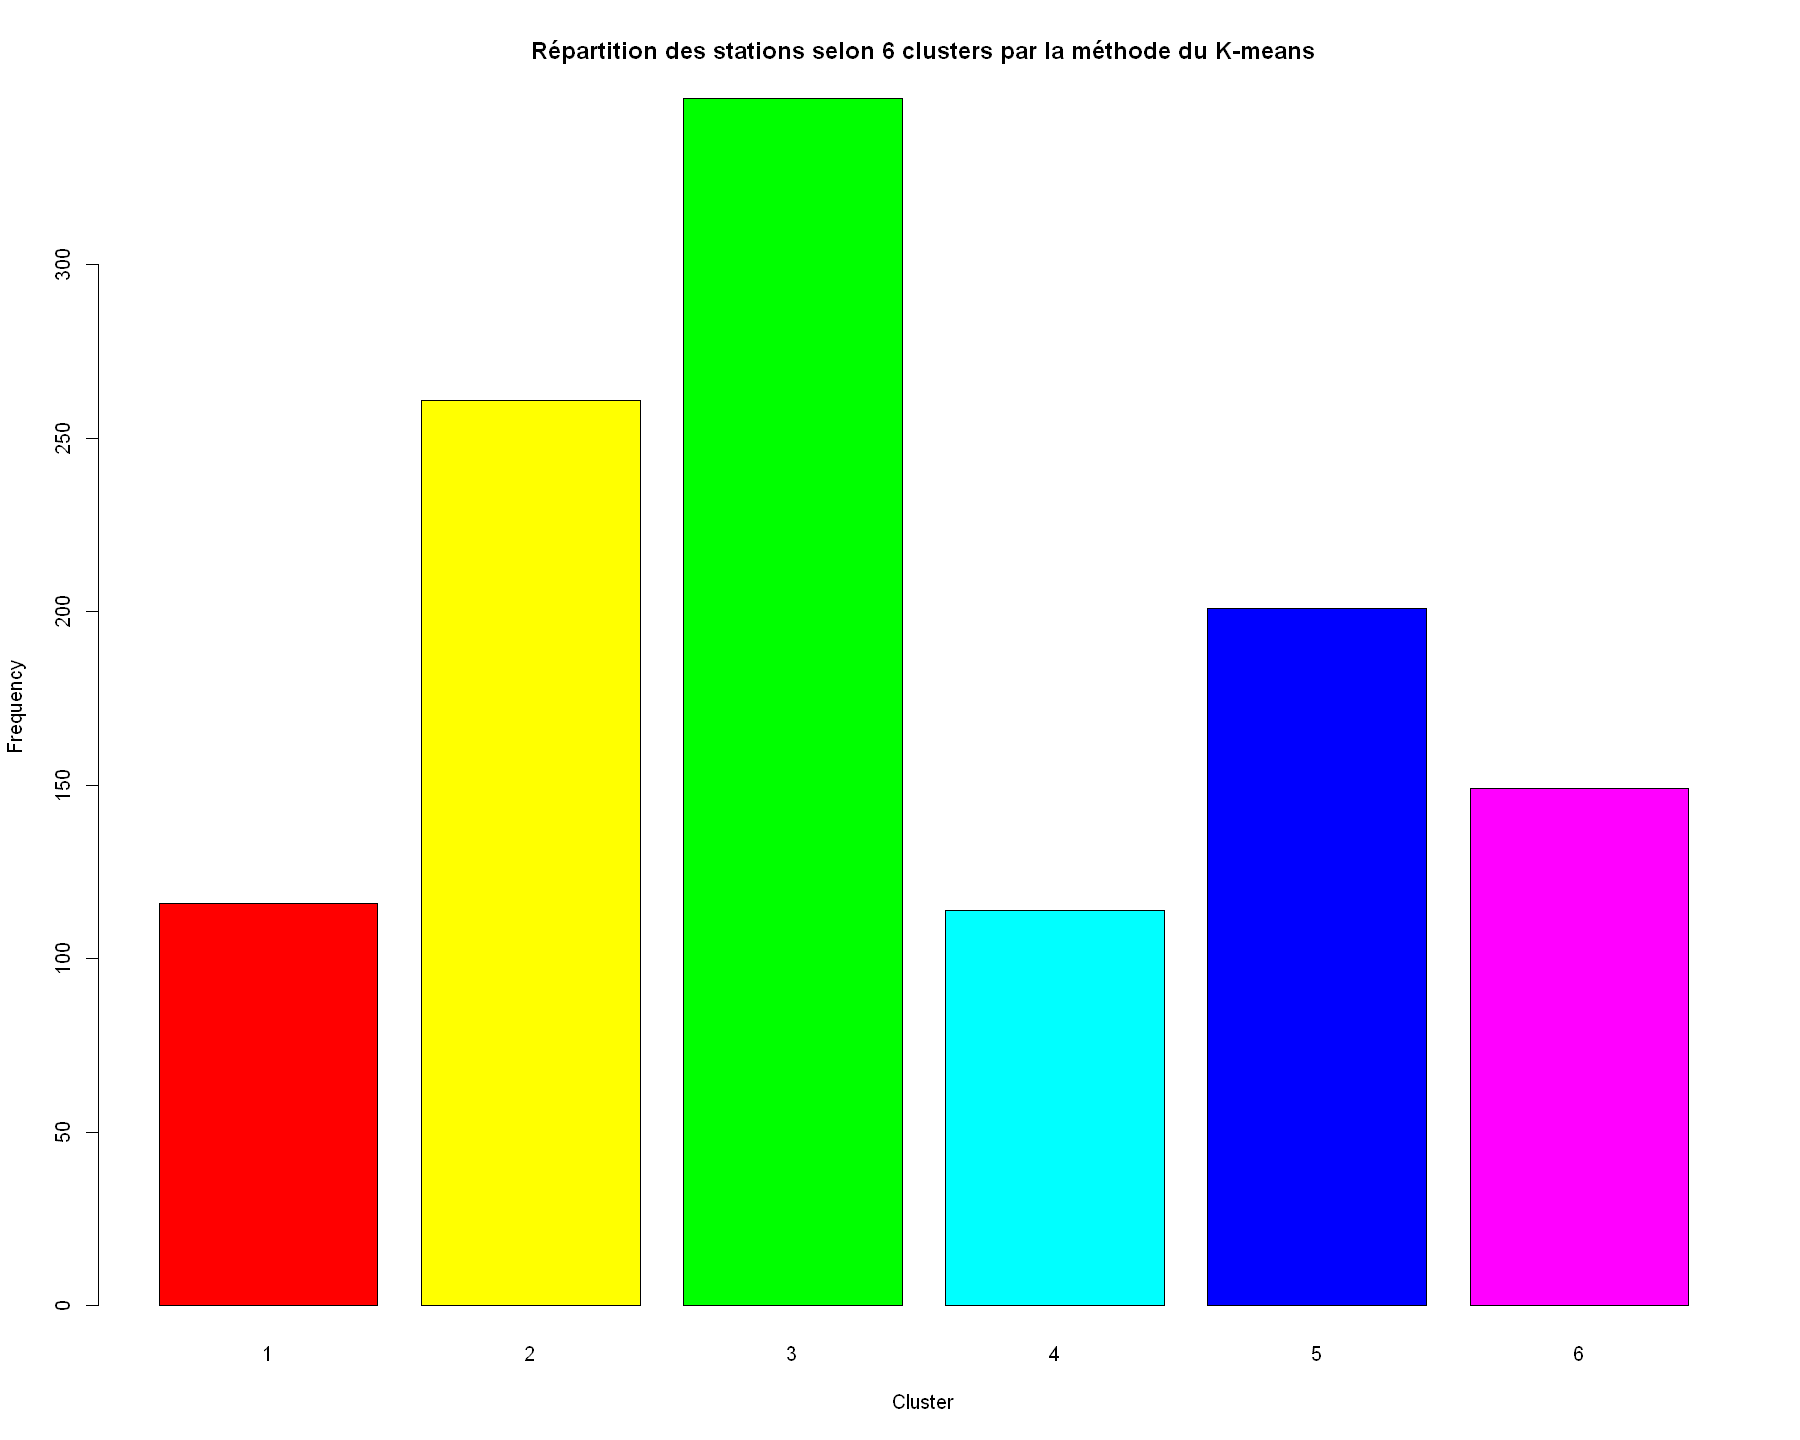

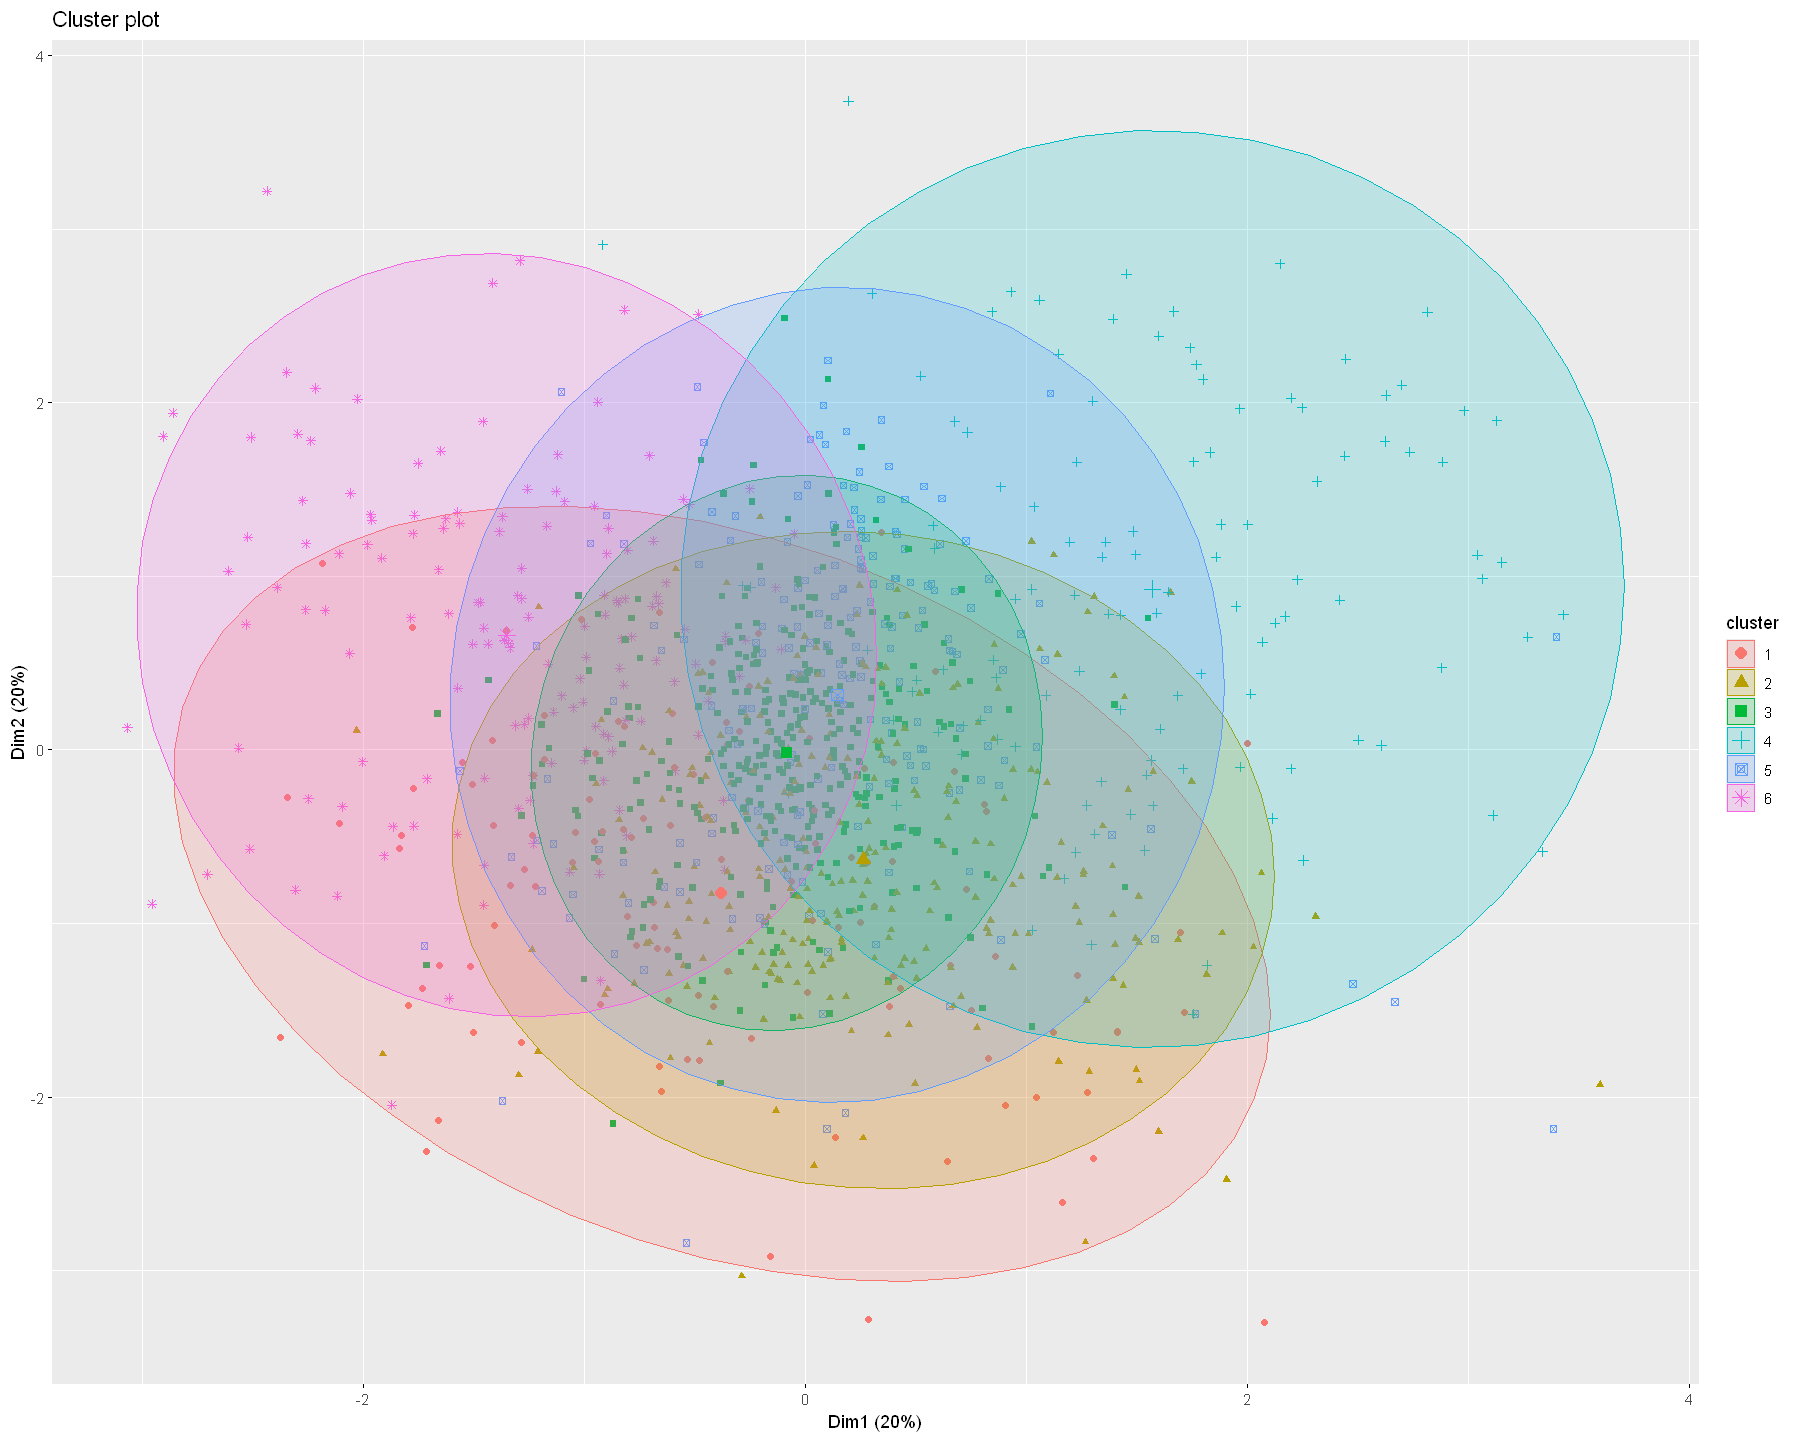

In [82]:
# Nombre de clusters
K =6  

# Classification par K-means avec 6 clusters
kmeans_pca6 = kmeans(loading_pca[, -c(1, 2)], centers = K, nstart = 10)
clusters_pca6 = kmeans_pca6$cluster

# Créer un graphique à barres pour la répartition des clusters
barplot(table(clusters_pca6), col = rainbow(K), xlab = "Cluster", ylab = "Frequency",
        main = paste("Répartition des stations selon", K, "clusters par la méthode du K-means"))

# Visualisation des clusters avec fviz_cluster
fviz_cluster(kmeans_pca6, data = loading_pca[, -c(1, 2)], ellipse.type = "norm", labelsize = 8, geom = "point")


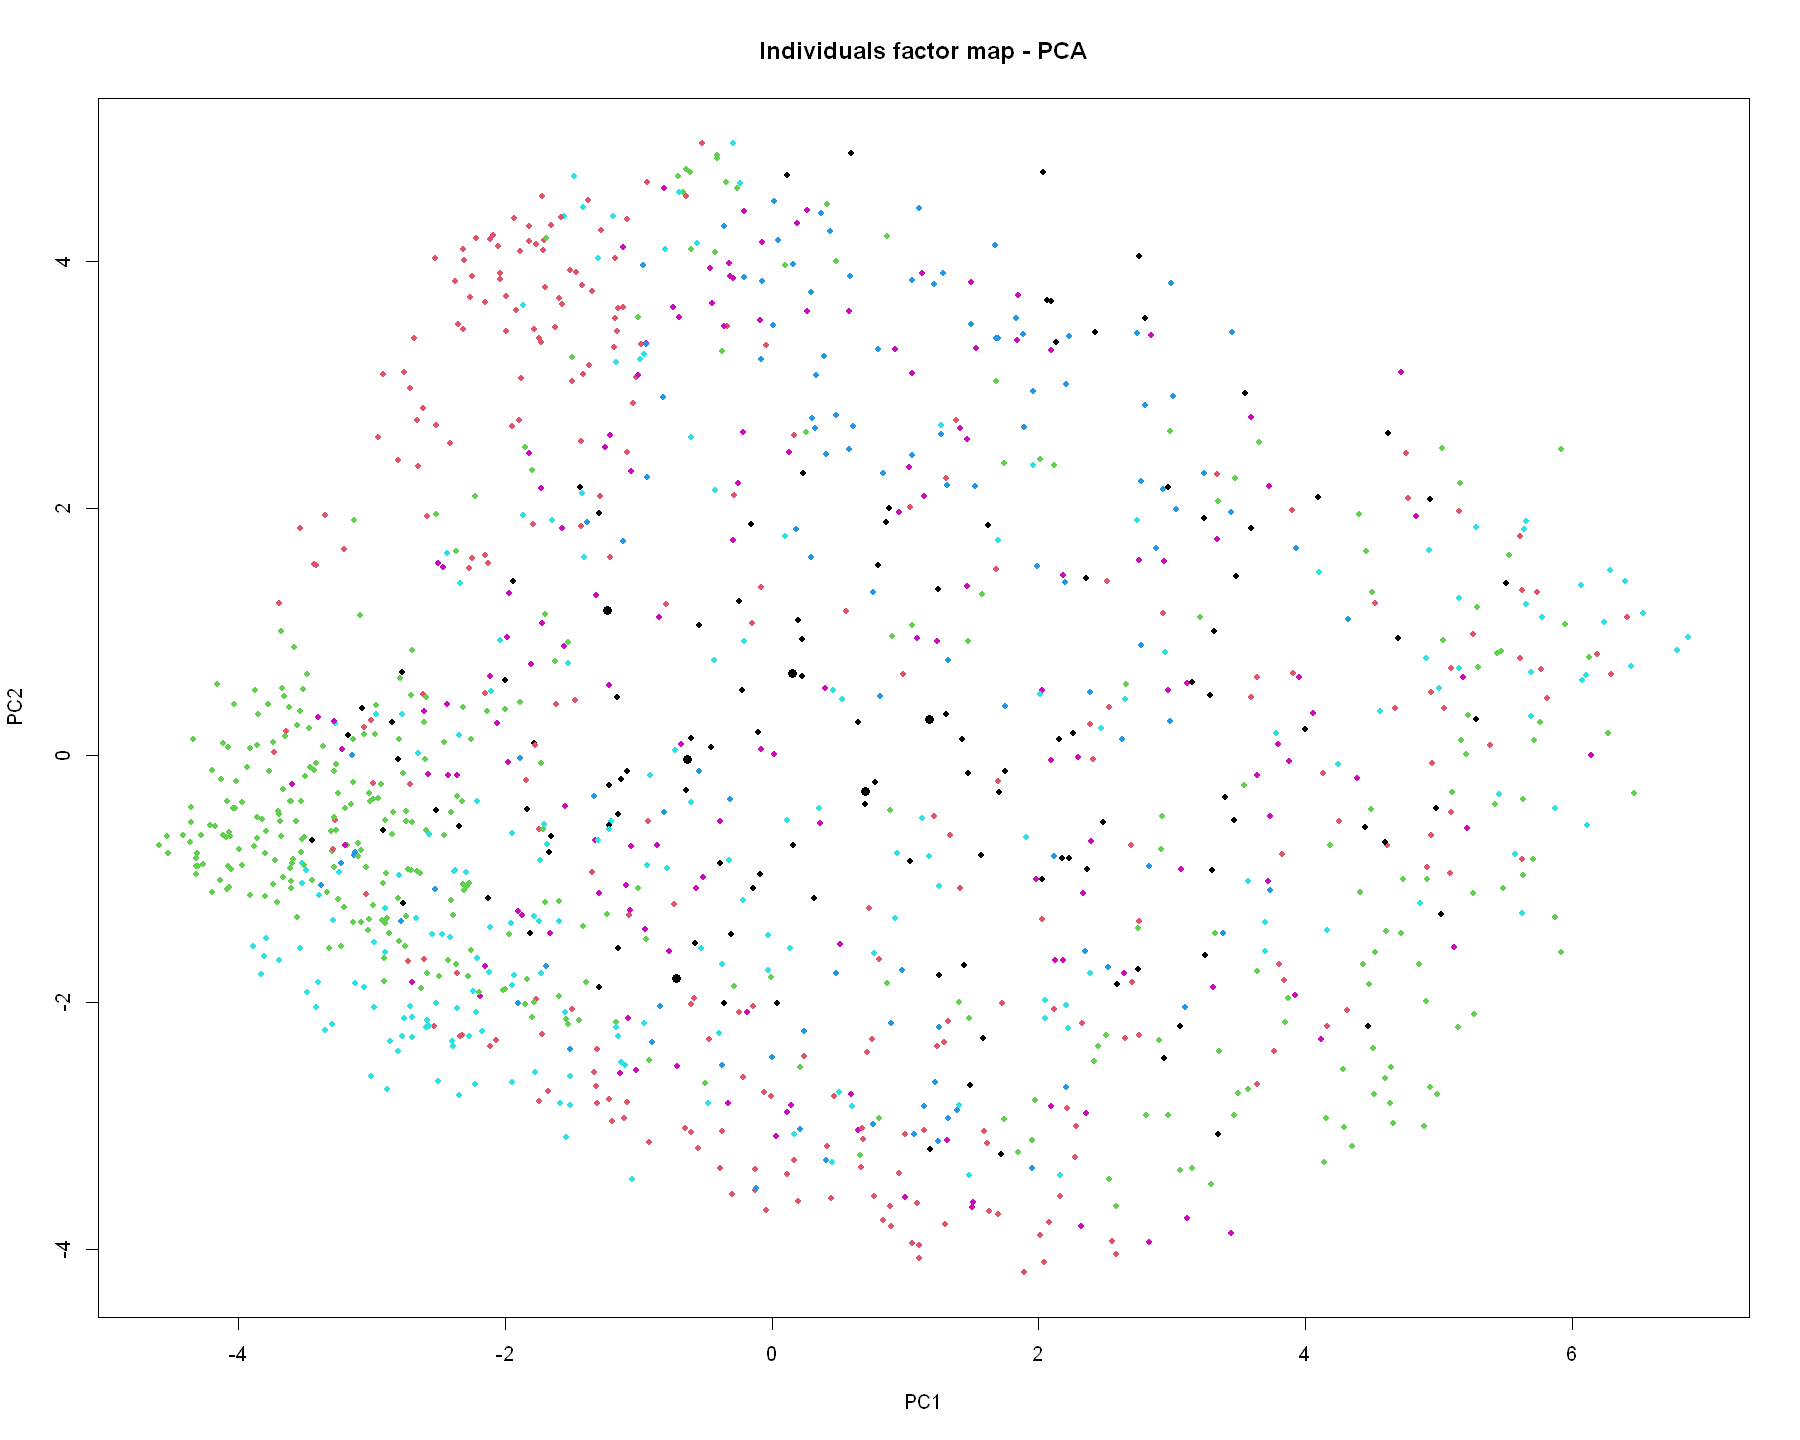

In [83]:
# Créer un objet KMeans avec 6 clusters
kmeans <- kmeans(loading_pca[, -c(1, 2)], centers = 6, nstart = 10)

# Coordonnées des centroïdes
centroids <- kmeans$centers

# Carte des facteurs individuels
plot(loading_pca[, 1], loading_pca[, 2], col = clusters_pca6, pch = 19, cex = 0.7,
     main = "Individuals factor map - PCA", xlab = "PC1", ylab = "PC2")
     
# Ajouter les centroïdes sur le graphique
points(centroids[, 1], centroids[, 2], pch = 20, cex = 1.5, col = "black")


Interprétation : 

De manière analogue à la méthode K-Means avec 7 clusters, on observe la répartition des stations de Vélib dans chaque cluster. On voit que la classe 2 contient plus de stations que les autres classes qui sont assez homogènes. Sur la visualisation sur le premier plan factoriel, les clusters sont bien distincts les uns des autres, plus qu'aavez 7 clusters. Les centroïdes de chaque clusters sont matérialisés par les points noires sur le dernier graphique qui permet de les visualiser, même si les couleurs des clusters ne correspondent pas à l'histogramme.

Même si cela n'est pas en accord avec la méthode du coude, choisir 6 clusters paraît visuellement plus pertinent. Il est important de noter que la pertinence de ce choix de classification est valable uniquement sur le premier plan factoriel. Il se peut que le choix de 7 clusters soit plus approprié sur un autre plan factoriel. 

Conformément au score de la silhouette, nous allons tester cette même méthode avec 3 clusters.

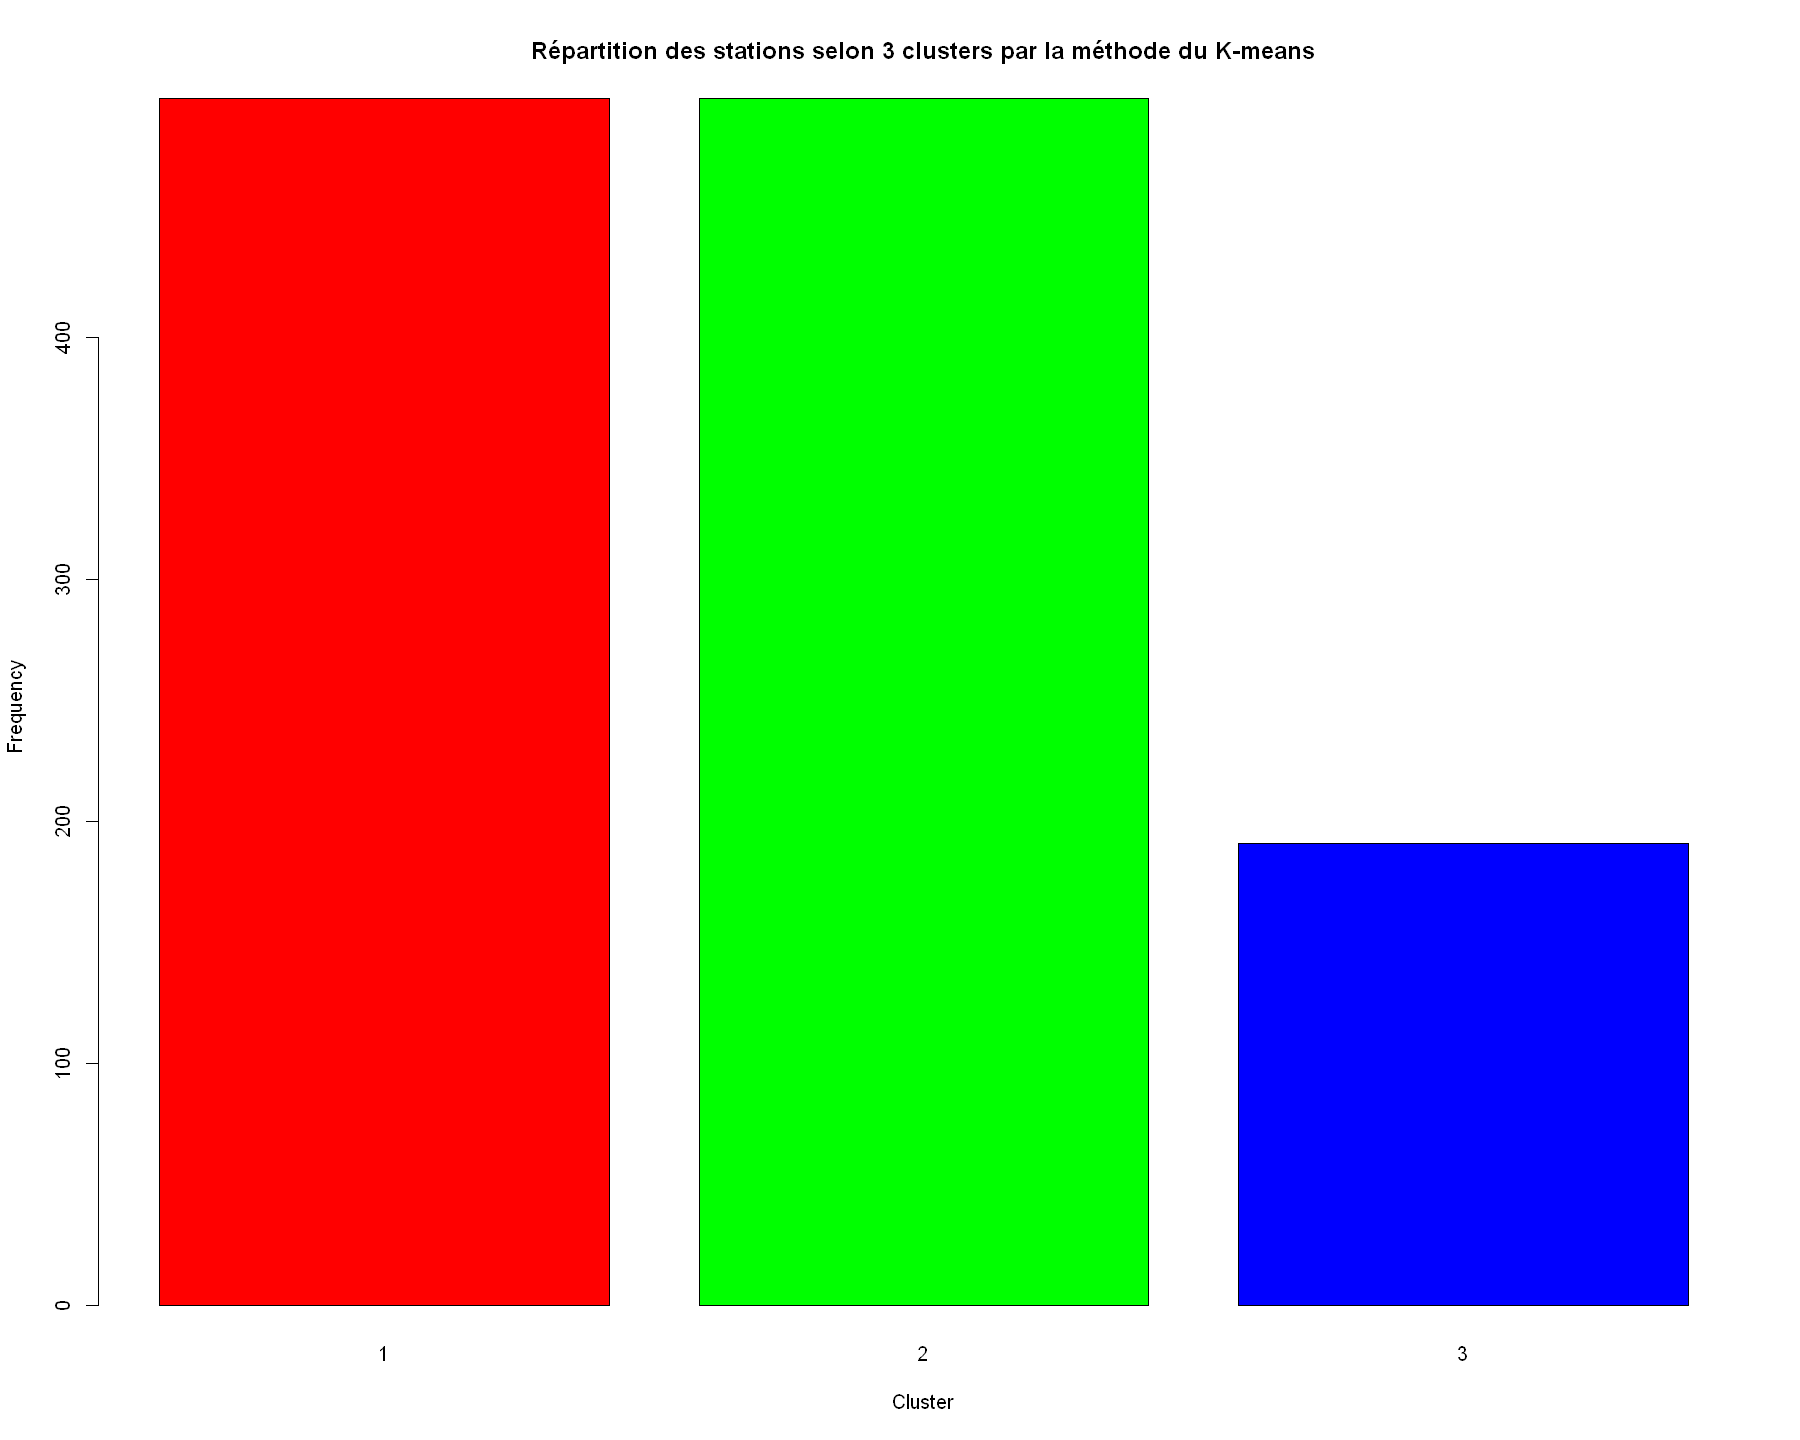

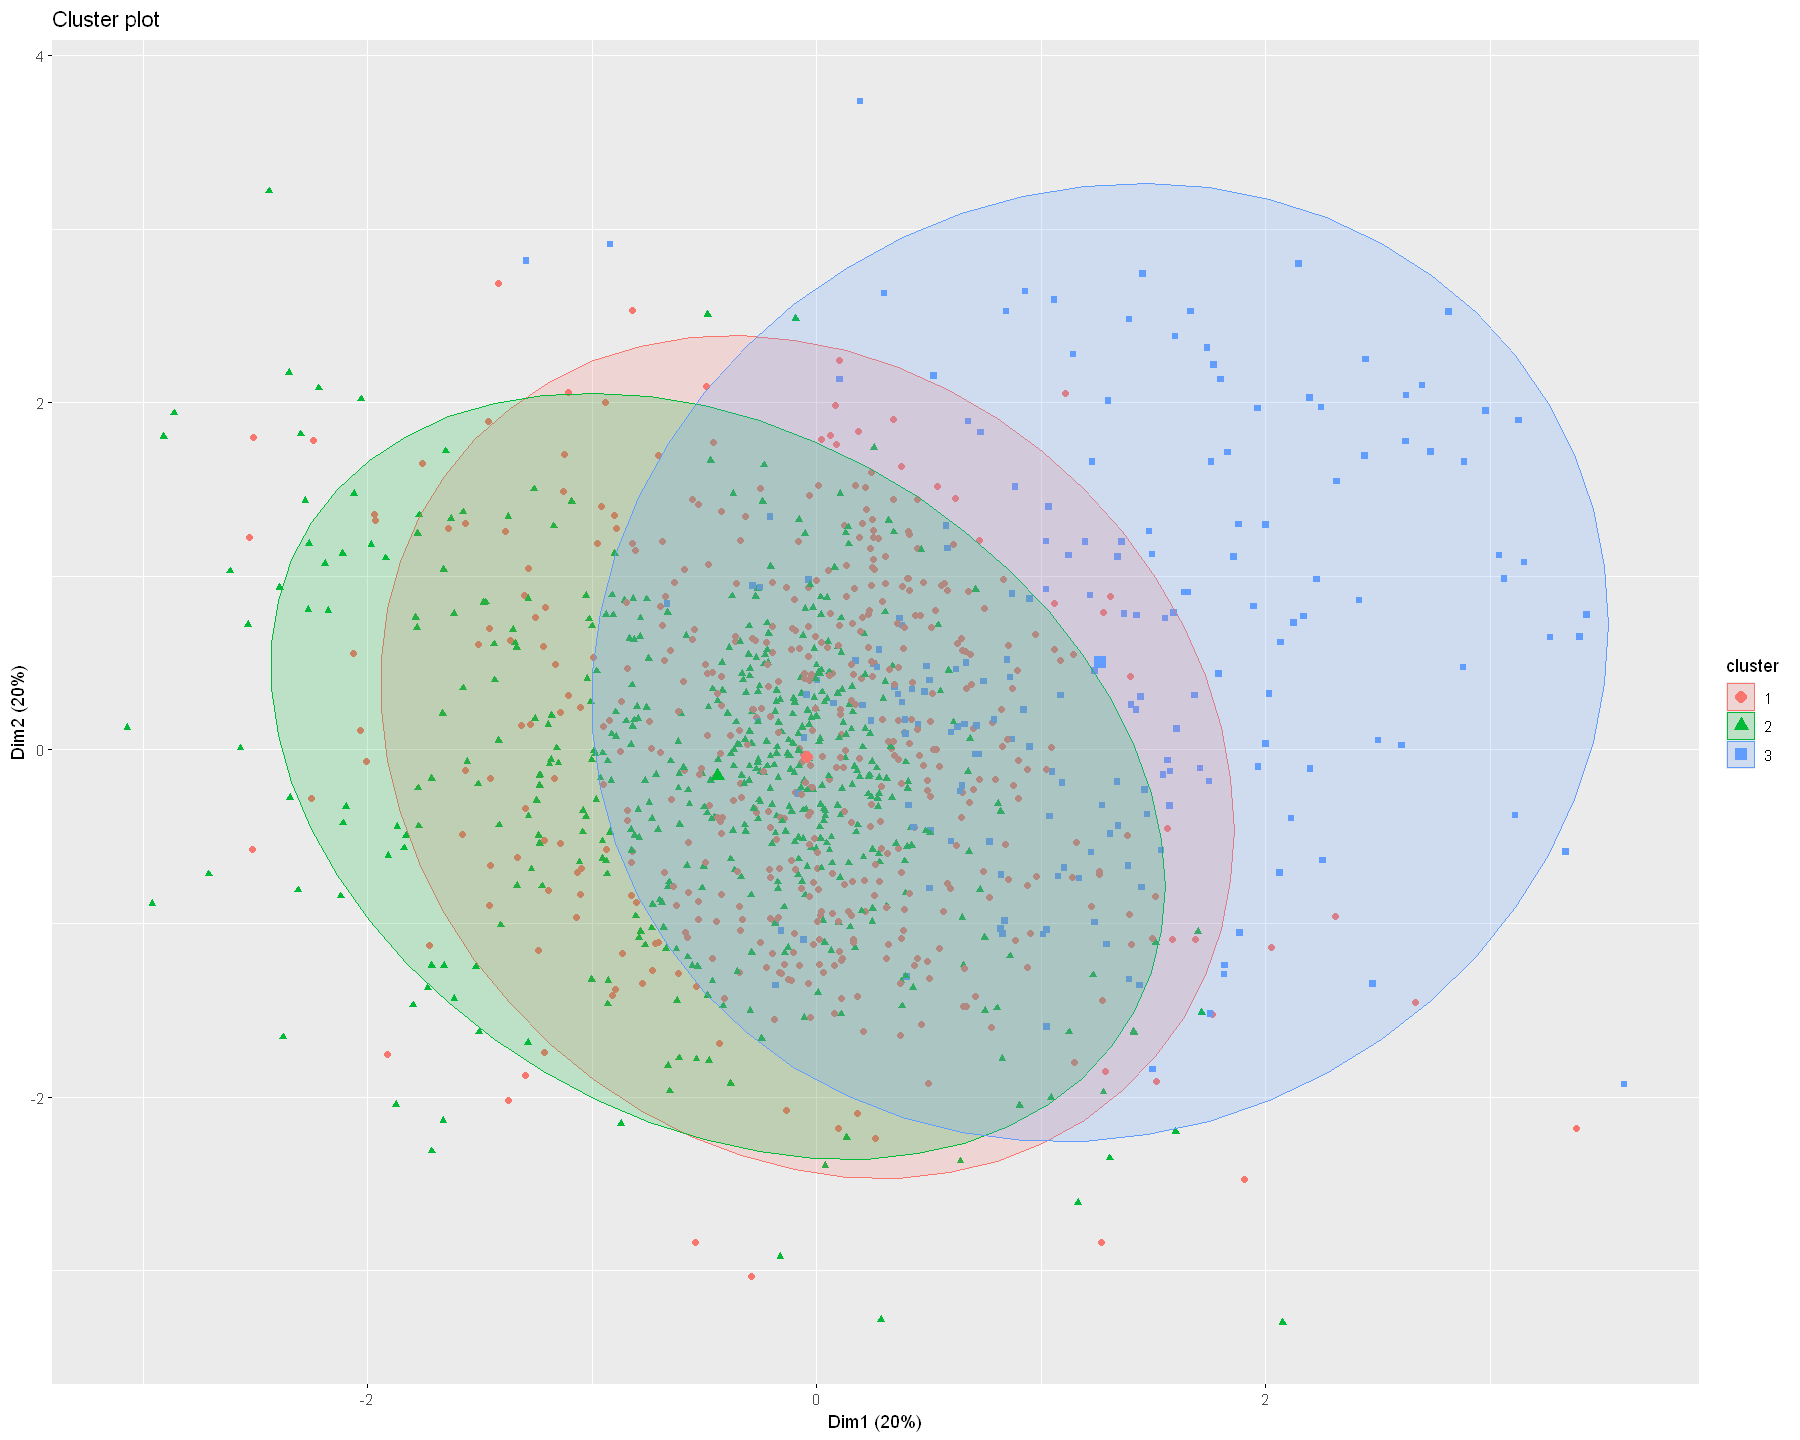

In [84]:
# Nombre de clusters
K <- 3

# Classification par K-means avec 3 clusters
kmeans_pca3 <- kmeans(loading_pca[, -c(1, 2)], centers = K, nstart = 10)
clusters_pca3 <- kmeans_pca3$cluster

# Créer un graphique à barres pour la répartition des clusters
barplot(table(clusters_pca3), col = rainbow(K), xlab = "Cluster", ylab = "Frequency",
        main = paste("Répartition des stations selon", K, "clusters par la méthode du K-means"))

# Visualisation des clusters avec fviz_cluster
fviz_cluster(kmeans_pca3, data = loading_pca[, -c(1, 2)], ellipse.type = "norm", labelsize = 8, geom = "point")


Interprétation :

A l'image de la classification en 6 clusters, avec 3 clusters nous constatons des séparations bien distinctes entre les classes, ce qui est recherché. Le résultat confirme bien le résultat du score silhouette qui recommandait de construire 3 classes.

### 3.1.3 - Comparaison des résultats de la classification par K-means

* Avec une inspection visuelle :

On regarde comment les points sont dispersés dans les graphiques des plans factoriels de l'ACP. Idéalement, les points appartenant au même cluster devraient être proches les uns des autres, et les différents clusters devraient être séparés clairement. Plus la séparation entre les clusters est nette, meilleure est la classification. En se basant sur ce critère, les classifications avec 6 ou 3 clusters semblent plus pertinentes, en se basant sur la visualisation sur le premier plan factoriel.

* Silhouette : 

La silhouette est une mesure de la cohésion et de la séparation des clusters dans un ensemble de données. Pour chaque point de données, la silhouette mesure à quel point il est similaire à son propre cluster par rapport aux autres clusters. La valeur de la silhouette varie de -1 à 1, où une valeur élevée indique que le point est bien assorti à son propre cluster et mal assorti aux clusters voisins. Une silhouette proche de 1 indique une bonne séparation entre les clusters, tandis qu'une silhouette proche de -1 indique une mauvaise séparation et que le point pourrait être attribué à un cluster voisin.

* R-Square (RSQ) : 

Dans le contexte de la classification, le coefficient de détermination (R-squared) mesure la proportion de l'inertie inter-classe. Plus le R-squared est proche de 1, meilleure est la classification.


* Calcul de l'inertie (SSE) :
Pour cette métrique, on mesure la somme des carrés des distances euclidiennes entre chaque point de données et le centroïde de son cluster attribué. L'objectif principal du K-means est de minimiser cette inertie SSE, ce qui revient à minimiser la dispersion intra-cluster, assurant ainsi que les points à l'intérieur de chaque cluster sont similaires les uns aux autres tout en étant différents des points dans les autres clusters.

* Calinski-Harabasz (CH) :

Nous allons utiliser le score Calinski-Harabasz. Il s'agit d'un ratio de la dispersion entre les clusters sur la dispersion au sein des clusters. Plus le score est élevé, meilleure est la séparation entre les clusters.

Nous allons créer une fonction qui va nous peremettre de mesurer la performance et la pertinence de nos classifications selon les critères énoncés ci-dessus. Puisque le calcul de l'inertie inter-clusters et intra_clusters n'est pas une fonction automatique des modèles suivant les classifications utilisées, nous allons également définir ces fonctions manuellement.

In [99]:
calculate_inertia <- function(data, clusters) {
  # Calculer les centroïdes de chaque cluster
  centroids <- sapply(unique(clusters), function(i) colMeans(data[clusters == i, , drop = FALSE]))

  inertia <- 0
  for (i in 1:ncol(centroids)) {
    # Sélectionner les points appartenant au cluster i
    cluster_points <- data[clusters == i, , drop = FALSE]
    # Calculer la distance euclidienne entre chaque point et son centroïde
    distances <- apply(cluster_points, 1, function(x) sqrt(sum((x - centroids[, i])^2)))
    # Ajouter la somme des carrés de ces distances à l'inertie totale
    inertia <- inertia + sum(distances^2)
  }
  return(inertia)
}


calculate_centroid_distances <- function(data, clusters) {
  # Trouver les indices des points pour chaque cluster
  cluster_indices <- lapply(unique(clusters), function(i) which(clusters == i))
  
  # Calculer les centroïdes pour chaque cluster
  centroids <- lapply(cluster_indices, function(indices) colMeans(data[indices, ], na.rm = TRUE))
  
  # Initialiser une matrice pour stocker les distances des points aux centroïdes
  centroid_distances <- matrix(0, nrow = nrow(data), ncol = length(centroids))
  
  # Calculer les distances des points aux centroïdes pour chaque point
  for (i in 1:nrow(data)) {
    for (j in 1:length(centroids)) {
      centroid_distances[i, j] <- sqrt(sum((data[i, ] - centroids[[j]])^2))
    }
  }
  
  return(centroid_distances)
}

performance <- function(data, clusters) {
  # Calcul des performances d'un clustering
  # data: Les données d'entrée
  # clusters: Les étiquettes de cluster assignées à chaque point dans les données
  
  # Calcul de l'inertie totale
  total_inertia <- calculate_inertia(data, clusters)
  
  # Calcul de l'inertie interclasse
  centroid_distances <- calculate_centroid_distances(data, clusters)
  interclass_inertia <- sum(apply(centroid_distances, 1, min))
  
  # Calcul du R-squared
  r_squared <- interclass_inertia / total_inertia
  
  # Calcul du SSE
  sse <- total_inertia - interclass_inertia
  
  # Calcul du silhouette
  silhouette <- silhouette(data, clusters)$avg.width
  
  # Calcul du score Calinski-Harabasz
  ch_score <- calinski_harabasz(data, clusters)
  
  # Impression des résultats
  cat("Silhouette Score :", silhouette, "\n")
  cat("R-squared Score :", r_squared, "\n")
  cat("SSE :", sse, "\n")
  cat("Calinski-Harabasz Score :", ch_score, "\n")
}


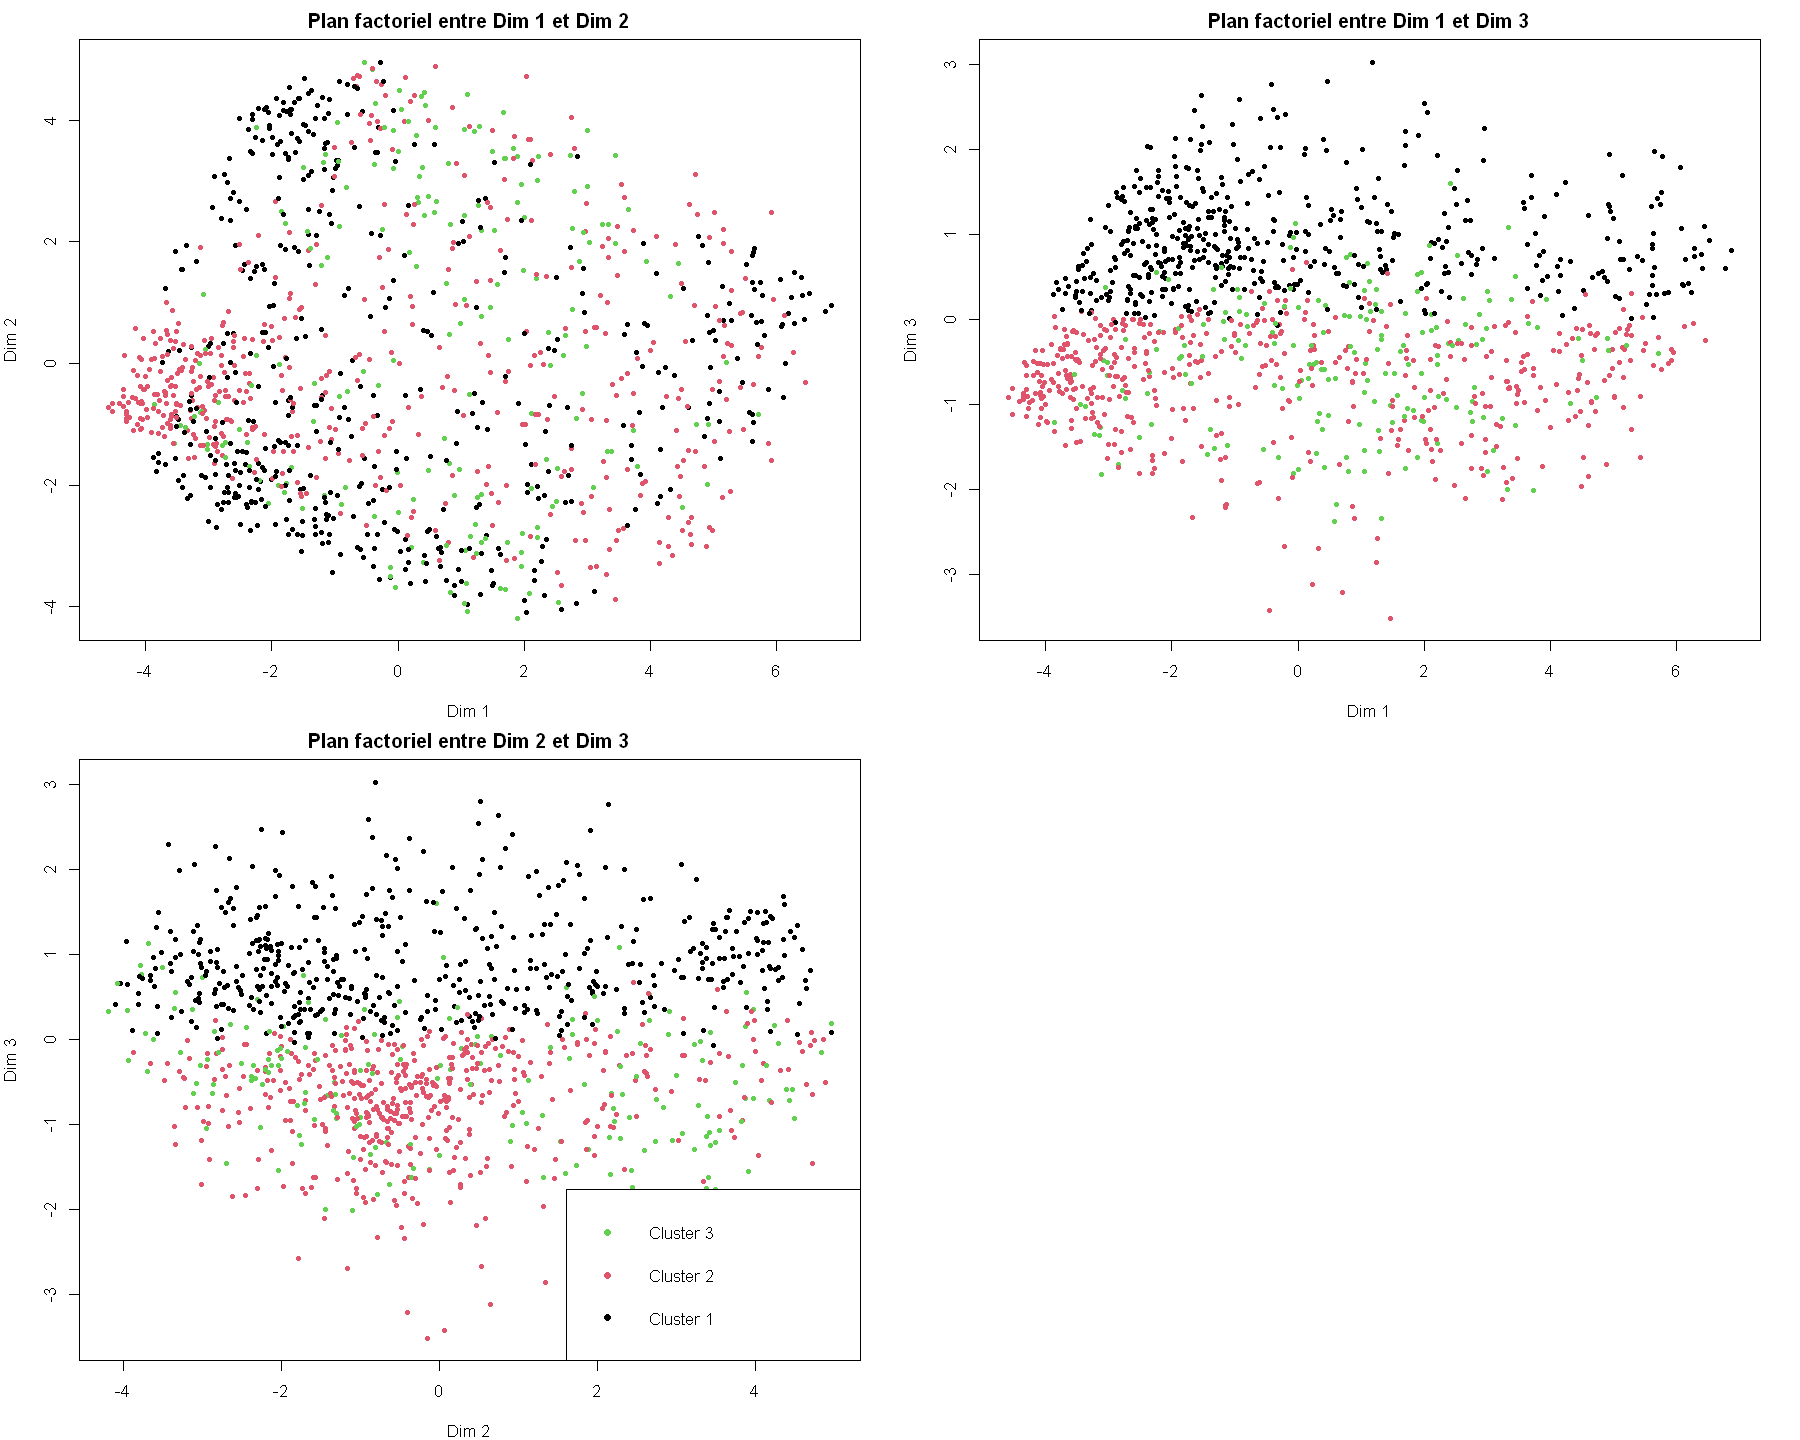

In [100]:
# Nombre de dimensions
f <- 3

# Liste pour stocker les étiquettes des clusters
labels <- vector()

# Créer une disposition de sous-graphiques
par(mfrow = c(2, 2), mar = c(4, 4, 2, 2))

# Tracer le plan factoriel entre les dimensions 1 et 2
plot(loading_pca[, 1], loading_pca[, 2], col = clusters_pca3, pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 2", xlab = "Dim 1", ylab = "Dim 2")

# Tracer le plan factoriel entre les dimensions 1 et 3
plot(loading_pca[, 1], loading_pca[, 3], col = clusters_pca3, pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 3", xlab = "Dim 1", ylab = "Dim 3")

# Tracer le plan factoriel entre les dimensions 2 et 3
plot(loading_pca[, 2], loading_pca[, 3], col = clusters_pca3, pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 2 et Dim 3", xlab = "Dim 2", ylab = "Dim 3")

# Créer une légende pour les clusters
legend("bottomright", legend = paste("Cluster", unique(clusters_pca3)), col = unique(clusters_pca3), pch = 19)

# Réinitialiser la disposition des sous-graphiques
par(mfrow = c(1, 1))


<span style="color:red"> Je pense que mon code est bon mais que j'ai un problème avec les noms de mes dimensions (la 1 ne correspond pas à votre 1 par exemple )

Interprétation : 

* Premier graphique (Dim1 et Dim2) :

Les stations sont divisées en trois groupes assez distincts sur les axes des première et deuxième composantes principales. Les 3 clusters sont bien séparés le long de l'axe de Dim1, mais ils se chevauchent très légèrement le long de l'axe de Dim2. Ce plan est le plus important car il est le premier plan factoriel qui permet de représenter 64% de la variance. C'est le plus gros poucentage, les analyses de ce graphique sont les plus importantes et représentatives.

* Deuxième graphique (Dim1 et Dim3) :

Ce plan montre les clusters le long de la première et de la troisième composante principale. Les clusters semblent moins séparés que dans le premier graphique, avec une distribution plus mélangée, indiquant que la troisième composante principale ne distingue pas aussi efficacement les clusters que la deuxième.

* Troisième graphique (Dim2 et Dim3) :

Dans cette vue, les clusters sont affichés le long de la deuxième et de la troisième composante principale. Les groupes semblent plus mélangés que dans le premier graphique, ce qui suggère que Dim1 pourrait être le principal contributeur à la séparation des clusters. Cela confirme également l'analyse de l'ACP.

* Interprétation globale :

La classification K-means montre qu'un regroupement en 3 clusters est pertinent et apporte visuallement des distincitions nettes entre les clusters, surtout selon le premier plan factoriel de l'ACP. Cependant, certains chevauchements entre les clusters indiquent des similitudes les projections sur les dimensions de l'ACP entre certaines stations. Pour une interprétation plus précise, il serait utile d'examiner les caractéristiques spécifiques et la signification des clusters. Nous pourrions comparer les clusters obtenus aux sens et significations apportés aux dimensions de l'ACP, réalisés dans la partie précédente.

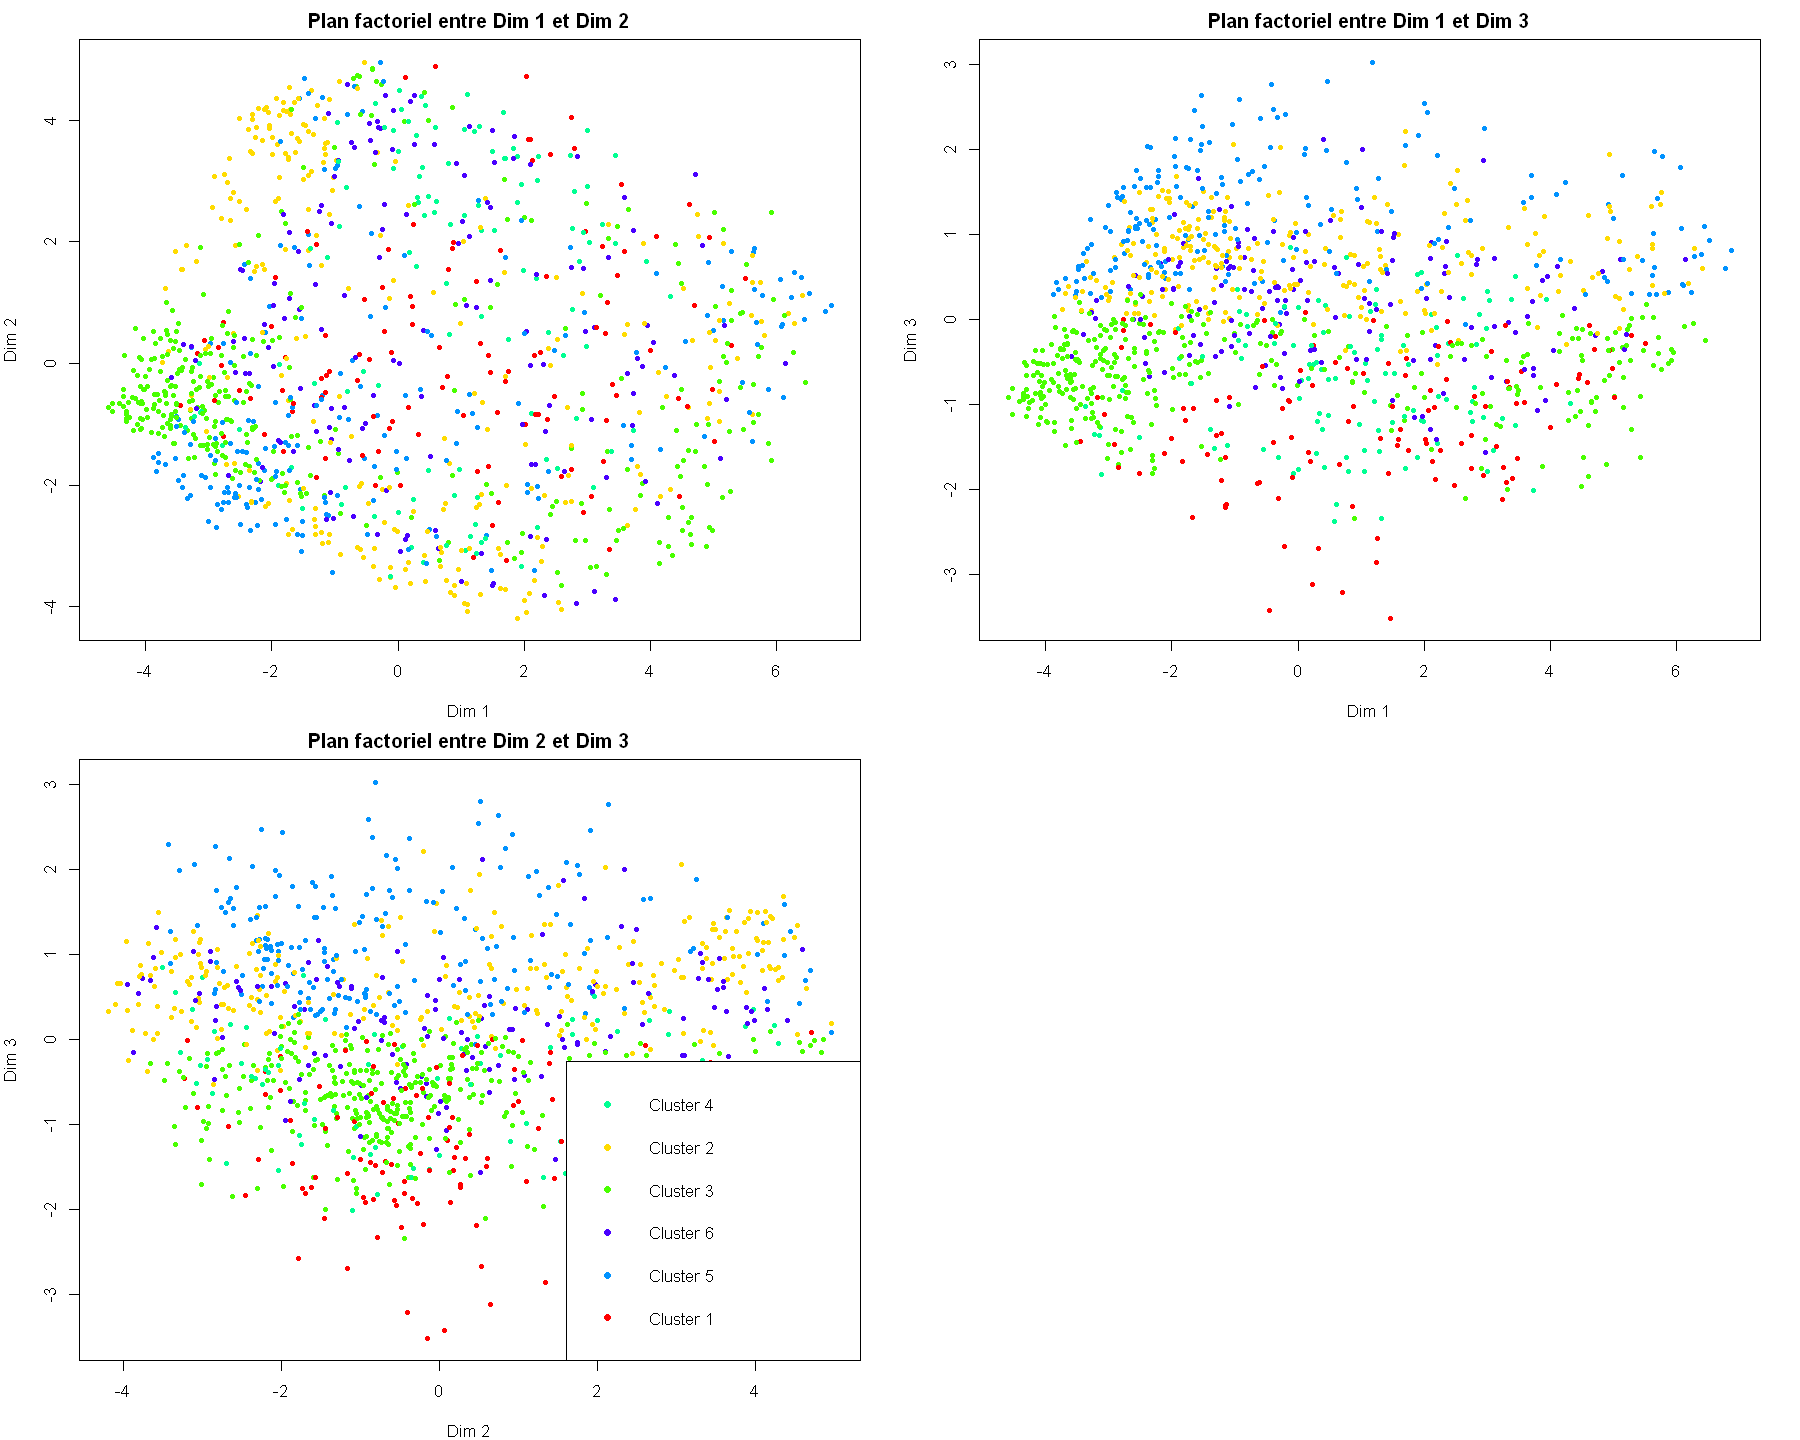

In [101]:
# Créer une disposition de sous-graphiques
par(mfrow = c(2, 2), mar = c(4, 4, 2, 2))  # 2 lignes, 2 colonnes

# Tracer le plan factoriel entre les dimensions 1 et 2
plot(loading_pca[, 1], loading_pca[, 2], col = cmap[clusters_pca6], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 2", xlab = "Dim 1", ylab = "Dim 2")

# Tracer le plan factoriel entre les dimensions 1 et 3
plot(loading_pca[, 1], loading_pca[, 3], col = cmap[clusters_pca6], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 3", xlab = "Dim 1", ylab = "Dim 3")

# Tracer le plan factoriel entre les dimensions 2 et 3
plot(loading_pca[, 2], loading_pca[, 3], col = cmap[clusters_pca6], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 2 et Dim 3", xlab = "Dim 2", ylab = "Dim 3")

# Ajouter une légende pour les clusters
legend("bottomright", legend = paste("Cluster", unique(clusters_pca6)), col = cmap[unique(clusters_pca6)], pch = 19)

# Réinitialiser la disposition des sous-graphiques
par(mfrow = c(1, 1))



Interprétation : 

* Premier graphique (Dim1 et Dim2) :

Les stations sont représentées sur le premier plan factoriel, qui combine les deux premières composantes principales. Il semble y avoir une bonne séparation entre les clusters, en particulier le long de la première dimension principale (Dim1), qui est la plus significative en termes de variance expliquée.

* Deuxième graphique (Dim1 et Dim3) :

Ce plan factoriel montre les clusters selon la première et la troisième dimension principale. Les clusters semblent moins distincts que sur le premier plan factoriel, ce qui peut indiquer que Dim3 contribue moins à la séparation des clusters que Dim2.

* Troisième graphique (Dim2 et Dim3) :

Les données sont projetées sur le deuxième et le troisième axe principal. Les clusters semblent se chevaucher plus sur ce plan que sur le premier plan factoriel. Cela peut suggérer que les deuxième et troisième composantes principales partagent certaines informations sur les stations ou que les différences entre les clusters sont moins prononcées selon ces axes.

* Interprétation générale :

La classification en six clusters a permis d'identifier des groupes de stations avec des profils de chargement similaires sur la semaine analysée. La dispersion des clusters sur ces graphiques reflète la variabilité des taux de chargement capturée par les composantes principales de l'ACP. Le chevauchement des clusters sur les plans factoriels suggère que, si certains clusters peuvent être facilement distingués en fonction de leurs profils de chargement, d'autres partagent des caractéristiques plus subtiles ou des variations similaires dans les taux de chargement, rendant leur séparation moins évidente.

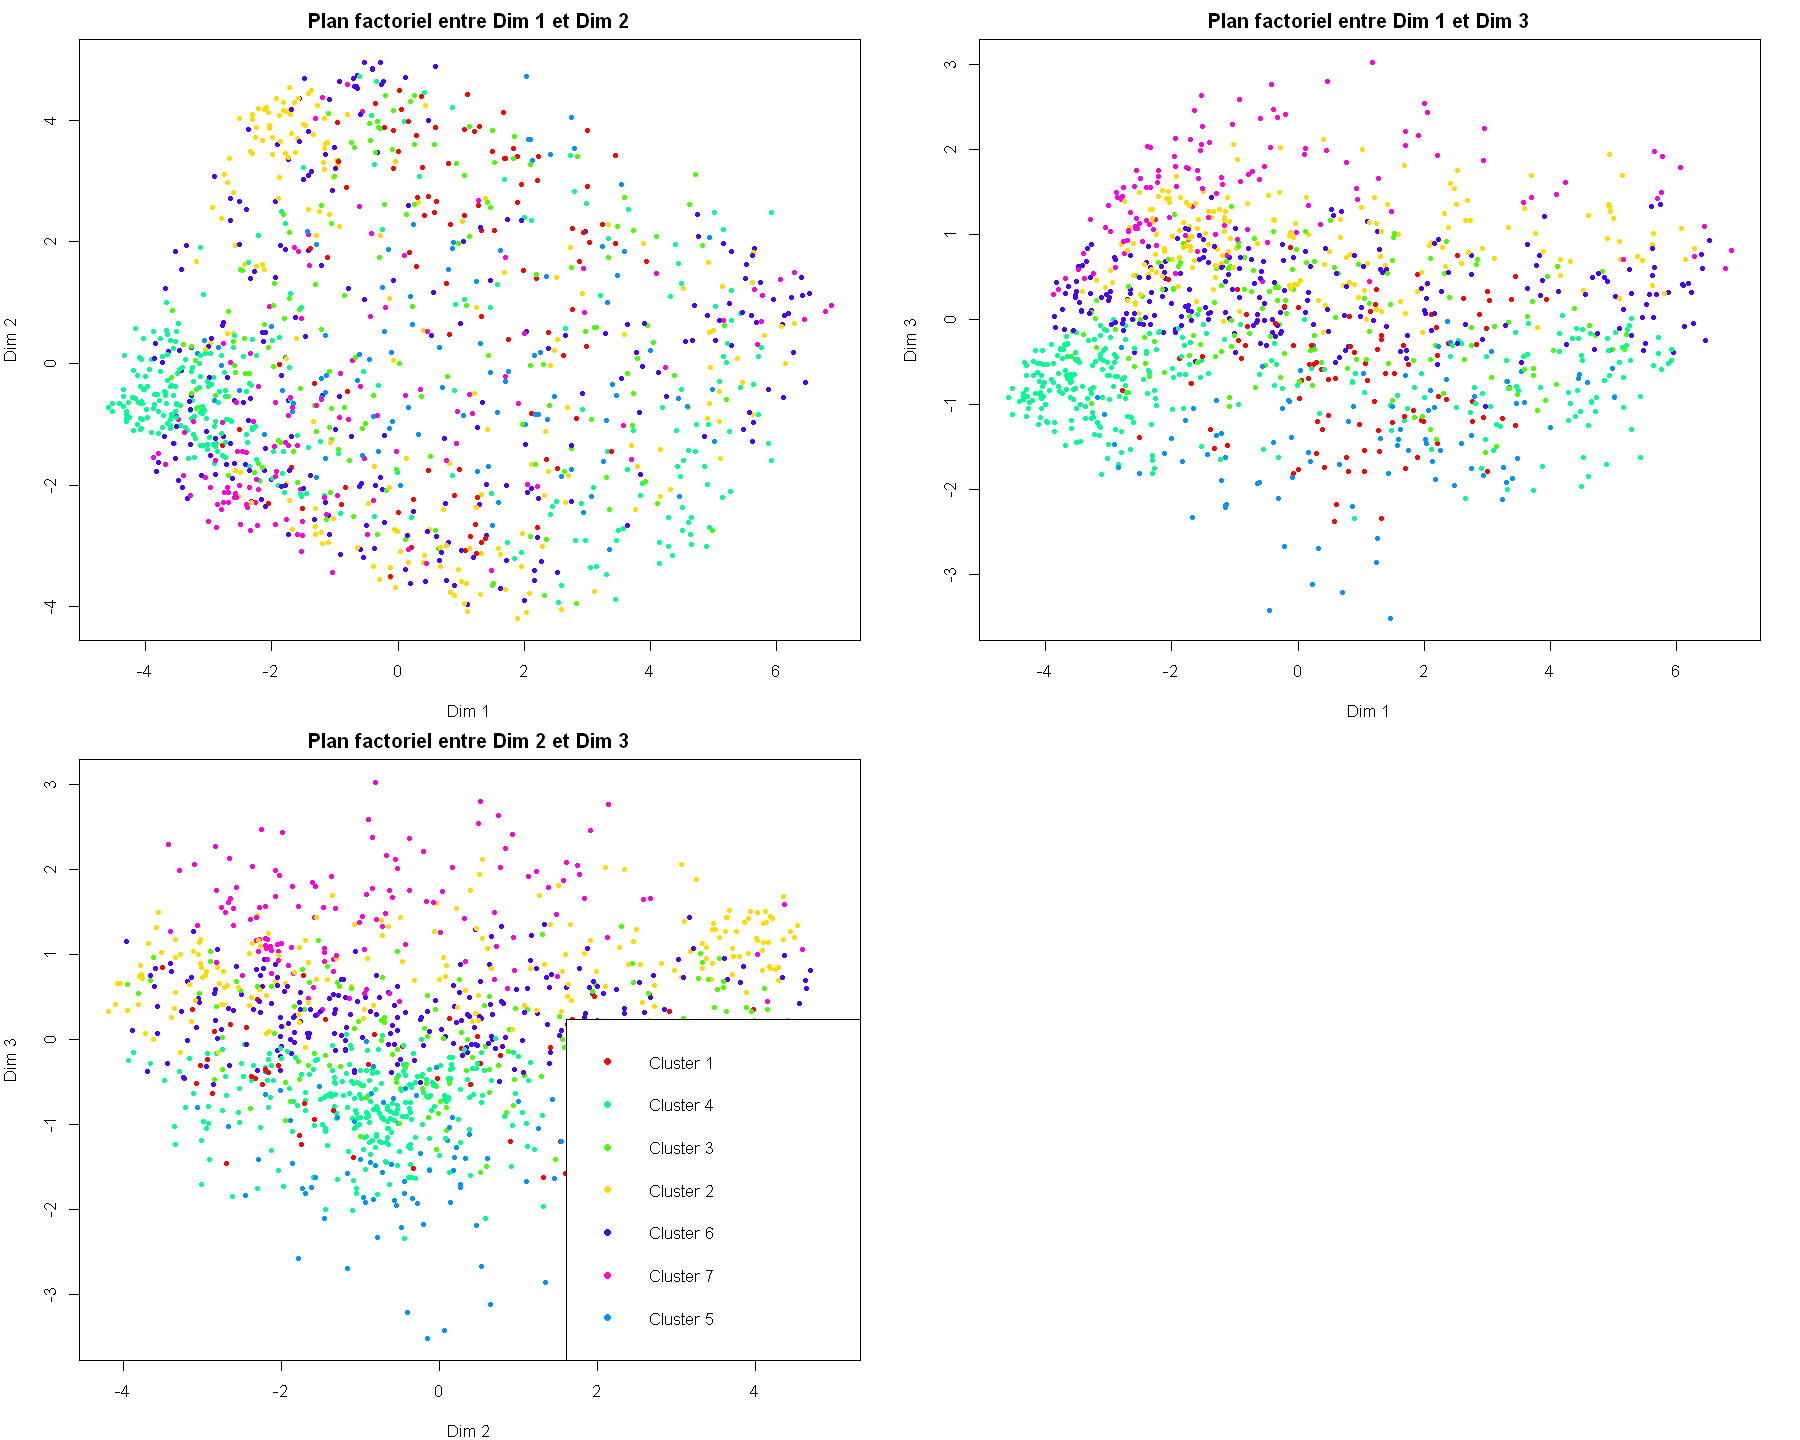

In [102]:
# Nombre de dimensions
f <- 3

# Créer une palette de couleurs pour les clusters
cmap <- rainbow(7)

# Créer une disposition de sous-graphiques
par(mfrow = c(2, 2), mar = c(4, 4, 2, 2))  # 2 lignes, 2 colonnes

# Tracer le plan factoriel entre les dimensions 1 et 2
plot(loading_pca[, 1], loading_pca[, 2], col = cmap[clusters_pca7], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 2", xlab = "Dim 1", ylab = "Dim 2")

# Tracer le plan factoriel entre les dimensions 1 et 3
plot(loading_pca[, 1], loading_pca[, 3], col = cmap[clusters_pca7], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 1 et Dim 3", xlab = "Dim 1", ylab = "Dim 3")

# Tracer le plan factoriel entre les dimensions 2 et 3
plot(loading_pca[, 2], loading_pca[, 3], col = cmap[clusters_pca7], pch = 19, cex = 0.7,
     main = "Plan factoriel entre Dim 2 et Dim 3", xlab = "Dim 2", ylab = "Dim 3")

# Ajouter une légende pour les clusters
legend("bottomright", legend = paste("Cluster", unique(clusters_pca7)), col = cmap[unique(clusters_pca7)], pch = 19)

# Réinitialiser la disposition des sous-graphiques
par(mfrow = c(1, 1))


Interprétation : 

On aurait tout d'abord une analyse analogue avec la classification selon 6 clusters en terme de représentation sur les axes des dimensions. En rajoutant un cluster supplémentaire, on pourrait s'attendre à obtenir une meilleure classification et une information aditionnelle. Cependant, on observe que les clusters 6 et 7 ne sont pas distincts sur aucun des trois plans factoriels. On pourrait se questionner sur la pertinence de ce cluster supplémentaire, même s'il correspond au nombre optimal de clusters selon la méthode du coude.

In [103]:
# Comparaison pour K-means avec 3 clusters
cat("K-means avec 3 clusters\n\n")
performance(loading_pca, clusters_pca3)
cat("\n------------------------\n\n")

# Comparaison pour K-means avec 6 clusters
cat("K-means avec 6 clusters\n\n")
performance(loading_pca, clusters_pca6)
cat("\n------------------------\n\n")

# Comparaison pour K-means avec 7 clusters
cat("K-means avec 7 clusters\n\n")
performance(loading_pca, clusters_pca7)


K-means avec 3 clusters



ERROR: Error in silhouette.default(data, clusters): 'x' ne doit avoir que des codes entiers


Interprétation : 

Nous utilisons ici les métriques définies précédemment pour comparer les classifications selon des critères identiques. Pour cette première comparaison selon ce critère, nous allons détailler notre analyse, puis dans la suite, nous serons plus succins.

* Pour K-Means avec 3 clusters :

Silhouette Score (0.356) : Ce score est relativement élevé, indiquant que les clusters sont bien définis et séparés les uns des autres.

R-squared Score (0.357) : Ce score modéré suggère que les clusters expliquent une proportion raisonnable de la variance dans les données. Une évolution de cette valeur est attendue pour être satisfait de notre classification.

SSE (5437.37) : Le Sum of Squared Errors (SSE) est assez élevé, ce qui implique que les points sont relativement éloignés de leurs centroïdes de cluster. Cela s'explique par le choix de 3 clusters qui regroupent forcéments plus de points au sein de chaque cluster.

Calinski-Harabasz Score (740.58) : Ce score est le plus élevé parmi les trois configurations, indiquant une bonne séparation et cohésion des clusters, et confirmant l'analyse du score silhouette.


* Pour K-Means avec 6 clusters :

Silhouette Score (0.262) : Le score a diminué par rapport à 3 clusters, ce qui suggère que la séparation des clusters est moins claire, comme observé sur les différents pans factoriels.
 
R-squared Score (0.431) : Ce score est meilleur qu'avec 3 clusters, ce qui signifie que les clusters expliquent une plus grande part de la variance totale des données.

SSE (3213.26) : La baisse du SSE indique que les points sont plus proches de leurs centroïdes, signalant un ajustement plus serré. Cela est également dû à l'augmentation du nombre de clusters.

Calinski-Harabasz Score (560.36) : Ce score est inférieur à celui pour 3 clusters, ce qui peut indiquer que la qualité du clustering a diminué en termes de séparation et de cohésion, en adéquation avec le score silhouette.

* Pour K-Means avec 7 clusters :

Silhouette Score (0.271) : Ce score est légèrement supérieur à celui pour 6 clusters, indiquant une petite amélioration dans la définition des clusters. Cela confirme le choix de 7 clusters par la méthode du coude, même si nous n'avons pas eu de validation visuelle sur les plans factoriels.

R-squared Score (0.450) : Ce score est le plus élevé des trois, indiquant que cette configuration de cluster explique le mieux la variance des données.

SSE (2881.31) : La poursuite de la baisse du SSE indique une amélioration de la proximité des points à leurs centroïdes.

Calinski-Harabasz Score (518.38) : La diminution de ce score par rapport à 6 clusters suggère que la séparation des clusters pourrait ne pas être aussi bonne avec un cluster supplémentaire.


Interprétation globale :

Si l'objectif est de maximiser la séparation et la cohésion des clusters, le K-Means avec 3 clusters semble être le meilleur choix en fonction du score de silhouette et du score de Calinski-Harabasz. Cependant, si l'objectif est de minimiser la distance totale des points à leurs centroïdes de cluster (SSE) ou d'expliquer le plus de variance possible dans les données (R-squared), le K-Means avec 7 clusters serait préférable. 